## MSDS696 Data Science Practicum II
### Clustering and Linear Regression with Real Estate Data
### Part 1c - Douglas County Assessors Data PCA and Clustering

The data I am using for this project comes from the Douglas County Assessors Website.

  -  https://www.douglas.co.us/assessor/data-downloads/
  
Part 1b Collected, Cleaned and performed EDA on the data.

There are 4 Dataframes that resulted:

    1) df_properties_onehot_imputed
    
    2) df_properties_onehot_imputed_stan
    
    3) df_prop_analy_prim_imputed
    
    4) df_prop_analy_prim_imputed_stan
 

### Libraries and Settings

In [1]:
# import the libraries needed

import pandas as pd # library for data analysis and manipulation
import numpy as np # library for working with arrays
import seaborn as sns; sns.set() # data visualization library based on matplotlib used for plot styling
import matplotlib.pyplot as plt # data visualization library
from sklearn.cluster import AgglomerativeClustering # Library for hierarchical clustering
from sklearn.cluster import DBSCAN # DBSCAN for clustering
from sklearn.cluster import KMeans # library for k-means clustering
from sklearn.decomposition import PCA # library for principle component analysis
from sklearn.neighbors import NearestNeighbors # used for dbscan tuning
from sklearn.datasets import make_blobs # used to make dataset
from sklearn import metrics # for cluster algorithm evaluation
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score # score for clustering 
from sklearn.metrics import pairwise_distances  # for cluster algorithm evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler # scale data
from sklearn.preprocessing import LabelEncoder # encode data
from sklearn.pipeline import Pipeline # Create a pipline
from sklearn.linear_model import LassoCV # Feature Selection
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage # for Hierarchical Clustering
from kneed import KneeLocator # used for clustering to find optimal # of clusters
import requests
import json
import urllib
#import geopandas # geocode location
#import geopy # geocode location
from sklearn.impute import KNNImputer # used to impute Nan values
# line magic function, display the plot directly below code that produces it
%matplotlib inline 

In [2]:
# Set the option in pandas to display up to 150 columns and rows
pd.set_option('display.max_columns', 150) 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_colwidth', None)

### Read in Cleaned Data Files

In [3]:
# read the text file into a pandas dataframe
#A
df_OH = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_onehot_imputed.csv')

#B
df_OH_ST = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_properties_onehot_imputed_stan.csv')

#C
df_PR = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_prop_analy_prim_imputed.csv')

#D
df_PR_ST = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_prop_analy_prim_imputed_stan.csv')

In [4]:
#read the text file into a pandas dataframe - location information
df_LOC = pd.read_csv('C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/df_property_location.csv')

#### Review Shape and Description of dataframes

In [5]:
# View the shape of the dataframe
df_OH.shape

(101817, 789)

In [6]:
# Use Describe to view properties of the df_OH dataframe
df_OH.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0          index  Built_As_code  Improvement_Type_Code  \
count  101817.000000  101817.000000  101817.000000          101817.000000   
mean    50908.000000   50942.697771       6.364144            2392.292004   
std     29392.180516   29407.270087       3.275409             811.988155   
min         0.000000       0.000000       1.000000               0.000000   
25%     25454.000000   25478.000000       7.000000            1810.000000   
50%     50908.000000   50941.000000       8.000000            2285.000000   
75%     76362.000000   76411.000000       8.000000            2844.000000   
max    101816.000000  101875.000000      40.000000           16807.000000   

       Completion_Percent  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count       101817.000000    101817.000000    101817.000000   101817.000000   
mean            99.989540         0.990954       603.949488      450.603445   
std              0.920196         0.555714       263.940571      461.937046   
min              0.000000         0.000000         0.000000        0.000000   
25%            100.000000         1.000000       440.000000      192.000000   
50%            100.000000         1.000000       580.000000      337.000000   
75%            100.000000         1.000000       687.000000      553.000000   
max            100.000000         8.000000      7745.000000    16444.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
count               101817.000000                 101817.000000   
mean                   530.143728                    681.654478   
std                    692.231012                    637.264989   
min                      0.000000                   -639.000000   
25%                      0.000000                    124.000000   
50%                      0.000000                    513.000000   
75%                    986.000000                   1094.000000   
max                  22450.000000                   6964.000000   

         Built_as_SF    No_of_Story  No_of_Bedrooms  No_of_Bathrooms  \
count  101817.000000  101817.000000   101817.000000    101817.000000   
mean     2392.174401       1.692055        3.320943         2.992902   
std       812.112239       0.475232        0.833819         0.779570   
min         0.000000       0.000000        0.000000         0.000000   
25%      1810.000000       1.000000        3.000000         3.000000   
50%      2284.000000       2.000000        3.000000         3.000000   
75%      2844.000000       2.000000        4.000000         3.000000   
max     16807.000000      10.000000        8.000000        18.000000   

          Built_Year  Remodeled_Year  Average_Story_Height     No_Of_Unit  \
count  101817.000000   101817.000000         101817.000000  101817.000000   
mean     1999.121709      136.259416              8.909497       0.999794   
std        12.833823      504.921806              1.001807       0.030222   
min      1867.000000        0.000000             -1.000000       0.000000   
25%      1993.000000        0.000000              8.000000       1.000000   
50%      1999.000000        0.000000              9.000000       1.000000   
75%      2006.000000        0.000000             10.000000       1.000000   
max      2021.000000     2020.000000            100.000000       4.000000   

       Sprinkler_Coverage_SF  Total_Net_Acres  Tax_District_No  Actual_Value  \
count               101817.0    101817.000000    101817.000000  1.018170e+05   
mean                     0.0         0.786283      2309.761985  4.280444e+05   
std                      0.0         3.284403      1335.304228  1.863206e+05   
min                      0.0         0.000000        35.000000  0.000000e+00   
25%                      0.0         0.137994       991.000000  3.271030e+05   
50%                      0.0         0.178994      3063.000000  3.866640e+05   
75%                      0.0         0.259000      3602.000000  4.694280e+05   
max              

In [7]:
# View the first few records of the df
df_OH.head()

Unnamed: 0  index  Built_As_code  Improvement_Type_Code  \
0           0    0.0            1.0                  969.0   
1           1    1.0            1.0                 1080.0   
2           2    2.0            5.0                 1938.0   
3           3    3.0            1.0                 2964.0   
4           4    4.0            1.0                  840.0   

   Completion_Percent  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0               100.0              0.0              0.0            98.0   
1               100.0              0.0            379.0           388.0   
2               100.0              0.0            900.0           463.0   
3               100.0              1.0            768.0           598.0   
4               100.0              0.0              0.0             0.0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                         0.0                           0.0        969.0   
1                         0.0                           0.0       1080.0   
2                       456.0                          34.0       1938.0   
3                         0.0                           0.0       2964.0   
4                         0.0                           0.0        840.0   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0          1.0             2.0              1.0      1957.0             0.0   
1          1.0             3.0              1.0      1947.0          1960.0   
2          2.0             3.0              2.0      1935.0          1950.0   
3          1.0             3.0              2.0      1969.0             0.0   
4          1.0             2.0              1.0      1969.0             0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0                   8.0         1.0                    0.0         0.289991   
1                   8.0         1.0                    0.0         0.230005   
2                   8.0         1.0                    0.0         0.358999   
3                   8.0         1.0                    0.0        44.000000   
4                   8.0         1.0                    0.0        44.000000   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0           3470.0      167167.0         11950.0          1.0         49000.0   
1           3470.0      210908.0         15080.0          4.0             0.0   
2           3470.0      307327.0         21970.0          1.0         85000.0   
3           3468.0      418158.0         29900.0          3.0             0.0   
4           3468.0      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0       1.0          2.0   
1         67200.0           62000.0           37500.0       1.0          3.0   
2         85000.0           85000.0           85000.0       1.0          3.0   
3       1350000.0          100000.0         1350000.0       1.0          4.0   
4       1350000.0          100000.0         1350000.0       1.0          3.0   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0               0.0            5.0            0.0                   1.0   
1               0.0            5.0            0.0                   1.0   
2               0.0            5.0            0.0                   1.0   
3               0.0            5.0            0.0                   1.0   
4               0.0            5.0            0.0                   1.0   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0               0.0                          0.0   
1               0.0                          0.0   
2               0.0                          0.0   
3               0.0                          0.0   
4               0.0                          0.0   

   Roof_Construction_Type_Gable  Roof_Co

In [8]:
# View the shape of the dataframe
df_OH_ST.shape

(101817, 788)

In [9]:
# Use Describe to view properties of the df_OH dataframe
df_OH_ST.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0  Built_As_code  Improvement_Type_Code  \
count  101817.000000   1.018170e+05           1.018170e+05   
mean    50908.000000   8.879334e-14           1.947597e-15   
std     29392.180516   1.000005e+00           1.000005e+00   
min         0.000000  -1.637710e+00          -2.946230e+00   
25%     25454.000000   1.941314e-01          -7.171224e-01   
50%     50908.000000   4.994382e-01          -1.321356e-01   
75%     76362.000000   4.994382e-01           5.563015e-01   
max    101816.000000   1.026926e+01           1.775245e+01   

       Completion_Percent  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count        1.018170e+05     1.018170e+05     1.018170e+05    1.018170e+05   
mean        -3.741703e-15     7.051931e-14    -2.827652e-15   -3.376521e-16   
std          1.000005e+00     1.000005e+00     1.000005e+00    1.000005e+00   
min         -1.086616e+02    -1.783217e+00    -2.288214e+00   -9.754698e-01   
25%          1.136713e-02     1.627758e-02    -6.211637e-01   -5.598268e-01   
50%          1.136713e-02     1.627758e-02    -9.073863e-02   -2.459296e-01   
75%          1.136713e-02     1.627758e-02     3.146577e-01    2.216689e-01   
max          1.136713e-02     1.261274e+01     2.705566e+01    3.462263e+01   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF   Built_as_SF  \
count                1.018170e+05                  1.018170e+05  1.018170e+05   
mean                -6.217502e-15                 -3.526834e-15 -2.581412e-15   
std                  1.000005e+00                  1.000005e+00  1.000005e+00   
min                 -7.658517e-01                 -2.072389e+00 -2.945635e+00   
25%                 -7.658517e-01                 -8.750790e-01 -7.168680e-01   
50%                 -7.658517e-01                 -2.646549e-01 -1.332019e-01   
75%                  6.585352e-01                  6.470582e-01  5.563613e-01   
max                  3.166568e+01                  9.858342e+00  1.774988e+01   

        No_of_Story  No_of_Bedrooms  No_of_Bathrooms    Built_Year  \
count  1.018170e+05    1.018170e+05     1.018170e+05  1.018170e+05   
mean  -2.199424e-14    7.660925e-14    -1.865821e-13  5.425043e-13   
std    1.000005e+00    1.000005e+00     1.000005e+00  1.000005e+00   
min   -3.560498e+00   -3.982830e+00    -3.839189e+00 -1.029486e+01   
25%   -1.456254e+00   -3.849090e-01     9.105624e-03 -4.770004e-01   
50%    6.479909e-01   -3.849090e-01     9.105624e-03 -9.483468e-03   
75%    6.479909e-01    8.143979e-01     9.105624e-03  5.359529e-01   
max    1.748195e+01    5.611626e+00     1.925058e+01  1.704745e+00   

       Remodeled_Year  Average_Story_Height    No_Of_Unit  \
count    1.018170e+05          1.018170e+05  1.018170e+05   
mean    -3.187066e-14          2.456934e-13  2.918177e-15   
std      1.000005e+00          1.000005e+00  1.000005e+00   
min     -2.698637e-01         -9.891673e+00 -3.308181e+01   
25%     -2.698637e-01         -9.078609e-01  6.824609e-03   
50%     -2.698637e-01          9.034042e-02  6.824609e-03   
75%     -2.698637e-01          1.088542e+00  6.824609e-03   
max      3.730775e+00          9.092666e+01  9.927271e+01   

       Sprinkler_Coverage_SF  Total_Net_Acres  Tax_District_No  Actual_Value  \
count               101817.0     1.018170e+05     1.018170e+05  1.018170e+05   
mean                     0.0     1.755499e-15    -5.314742e-14 -4.297961e-16   
std                      0.0     1.000005e+00     1.000005e+00  1.000005e+00   
min                      0.0    -2.394002e-01    -1.703562e+00 -2.297365e+00   
25%                      0.0    -1.973850e-01    -9.876165e-01 -5.417643e-01   
50%                      0.0    -1.849017e-01     5.640975e-01 -2.220933e-01   
75%                      0.0    -1.605422e-01     9.677528e-01  2.221109e-01   
max                      0.0     5.576467e+01     1.059118e+00  3.828303e+01   

       Assessed_Value   No_of_Sales  Sale_Price_Min  Sale_Price_Max  \
count    1.018170e+05  1.018170e+05 

In [10]:
# View the first few records of the df
df_OH_ST.head()

Unnamed: 0  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0           0      -1.637710              -1.752857            0.011367   
1           1      -1.637710              -1.616155            0.011367   
2           2      -0.416482              -0.559484            0.011367   
3           3      -1.637710               0.704088            0.011367   
4           4      -1.637710              -1.911727            0.011367   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0        -1.783217        -2.288214       -0.763319   
1        -1.783217        -0.852277       -0.135524   
2        -1.783217         1.121661        0.026836   
3         0.016278         0.621546        0.319085   
4        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584216        -2.556424   -3.282102       -0.269864   
1    -1.456254       -0.384909        -2.556424   -4.061297        3.611945   
2     0.647991       -0.384909        -1.273659   -4.996331        3.592139   
3    -1.456254       -0.384909        -1.273659   -2.347068       -0.269864   
4    -1.456254       -1.584216        -2.556424   -2.347068       -0.269864   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0             -0.907861    0.006825                    0.0        -0.151106   
1             -0.907861    0.006825                    0.0        -0.169370   
2             -0.907861    0.006825                    0.0        -0.130095   
3             -0.907861    0.006825                    0.0        13.157318   
4             -0.907861    0.006825                    0.0        13.157318   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.868898     -1.400160       -1.400342    -1.327815       -0.227167   
1         0.868898     -1.165397       -1.165390    -0.253741       -0.362854   
2         0.868898     -0.647904       -0.648195    -1.327815       -0.127479   
3         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   
4         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493134         -0.396448         -0.716304  0.012139    -2.097128   
1       -0.488159         -0.392721         -0.743512  0.012139    -0.641340   
2       -0.483292         -0.386127         -0.631132  0.012139    -0.641340   
3       -0.137460         -0.381827          2.361725  0.012139     0.814447   
4       -0.137460         -0.381827          2.361725  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0         -0.603731       1.885286      -0.030073              0.031511   
1         -0.603731       1.885286      -0.030073              0.031511   
2         -0.603731       1.885286      -0.030073              0.031511   
3         -0.603731       1.885286      -0.030073              0.031511   
4         -0.603731       1.885286      -0.030073              0.031511   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0         -0.009402                     -0.05166   
1         -0.009402                     -0.05166   
2         -0.009402                     -0.05166   
3         -0.009402                     -0.05166   
4         -0.009402                     -0.05166   

   Roof_Construction_Type_Gable  Roof_Construction_Type_Gambrel  \
0              

In [11]:
# View the shape of the dataframe
df_PR.shape

(101817, 26)

In [12]:
# Use Describe to view properties of the df_OH dataframe
df_PR.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0          index  Built_As_code  No_of_Fireplace  \
count  101817.000000  101817.000000  101817.000000    101817.000000   
mean    50908.000000   50942.697771       6.364144         0.990954   
std     29392.180516   29407.270087       3.275409         0.555714   
min         0.000000       0.000000       1.000000         0.000000   
25%     25454.000000   25478.000000       7.000000         1.000000   
50%     50908.000000   50941.000000       8.000000         1.000000   
75%     76362.000000   76411.000000       8.000000         1.000000   
max    101816.000000  101875.000000      40.000000         8.000000   

       Total_Garage_SF  Total_Porch_SF  Total_Finished_Basement_SF  \
count    101817.000000   101817.000000               101817.000000   
mean        603.949488      450.603445                  530.143728   
std         263.940571      461.937046                  692.231012   
min           0.000000        0.000000                    0.000000   
25%         440.000000      192.000000                    0.000000   
50%         580.000000      337.000000                    0.000000   
75%         687.000000      553.000000                  986.000000   
max        7745.000000    16444.000000                22450.000000   

       Total_Unfinished_Basement_SF    Built_as_SF    No_of_Story  \
count                 101817.000000  101817.000000  101817.000000   
mean                     681.654478    2392.174401       1.692055   
std                      637.264989     812.112239       0.475232   
min                     -639.000000       0.000000       0.000000   
25%                      124.000000    1810.000000       1.000000   
50%                      513.000000    2284.000000       2.000000   
75%                     1094.000000    2844.000000       2.000000   
max                     6964.000000   16807.000000      10.000000   

       No_of_Bedrooms  No_of_Bathrooms     Built_Year  Remodeled_Year  \
count   101817.000000    101817.000000  101817.000000   101817.000000   
mean         3.320947         2.992909    1999.121709      136.259416   
std          0.833819         0.779576      12.833823      504.921806   
min          0.000000         0.000000    1867.000000        0.000000   
25%          3.000000         3.000000    1993.000000        0.000000   
50%          3.000000         3.000000    1999.000000        0.000000   
75%          4.000000         3.000000    2006.000000        0.000000   
max          8.000000        18.000000    2021.000000     2020.000000   

       Total_Net_Acres  Actual_Value  Assessed_Value    No_of_Sales  \
count    101817.000000  1.018170e+05   101817.000000  101817.000000   
mean          0.786283  4.280444e+05    30605.174381       4.708428   
std           3.284403  1.863206e+05    13321.934278       2.792782   
min           0.000000  0.000000e+00        0.000000       1.000000   
25%           0.137994  3.271030e+05    23390.000000       3.000000   
50%           0.178994  3.866640e+05    27650.000000       4.000000   
75%           0.259000  4.694280e+05    33560.000000       6.000000   
max         183.939004  7.560927e+06   540610.000000      29.000000   

       Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
count    1.018170e+05    1.018170e+05      1.018170e+05      1.018170e+05   
mean     1.310838e+05    1.853265e+06      1.432247e+06      3.517983e+05   
std      3.612526e+05    3.658160e+06      3.488355e+06      4.227654e+05   
min      0.000000e+00    0.000000e+00      0.000000e+00      0.000000e+00   
25%      0.000000e+00    3.322000e+05      6.350000e+04      3.350000e+04   
50%      0.000000e+00    5.300000e+05      2.441000e+05      3.471000e+05   
75%      1.929000e+05    1.513600e+06      9.543000e+05      4.950000e+05   
max      1.915500e+07    4.000000e+07      4.000000e+07      1.915500e+07   

            Complete    Quality_ord  Walkout_Basement  Condition_ord  
count  101817.000000  101817.000000     101817.000000 

In [13]:
# View the first few records of the df
df_PR.head()

Unnamed: 0  index  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
0           0    0.0            1.0              0.0              0.0   
1           1    1.0            1.0              0.0            379.0   
2           2    2.0            5.0              0.0            900.0   
3           3    3.0            1.0              1.0            768.0   
4           4    4.0            1.0              0.0              0.0   

   Total_Porch_SF  Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0            98.0                         0.0                           0.0   
1           388.0                         0.0                           0.0   
2           463.0                       456.0                          34.0   
3           598.0                         0.0                           0.0   
4             0.0                         0.0                           0.0   

   Built_as_SF  No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0        969.0          1.0             2.0              1.0      1957.0   
1       1080.0          1.0             3.0              1.0      1947.0   
2       1938.0          2.0             3.0              2.0      1935.0   
3       2964.0          1.0             3.0              2.0      1969.0   
4        840.0          1.0             2.0              1.0      1969.0   

   Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  \
0             0.0         0.289991      167167.0         11950.0          1.0   
1          1960.0         0.230005      210908.0         15080.0          4.0   
2          1950.0         0.358999      307327.0         21970.0          1.0   
3             0.0        44.000000      418158.0         29900.0          3.0   
4             0.0        44.000000      418158.0         29900.0          3.0   

   Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
0         49000.0         49000.0           49000.0           49000.0   
1             0.0         67200.0           62000.0           37500.0   
2         85000.0         85000.0           85000.0           85000.0   
3             0.0       1350000.0          100000.0         1350000.0   
4             0.0       1350000.0          100000.0         1350000.0   

   Complete  Quality_ord  Walkout_Basement  Condition_ord  
0       1.0          2.0               0.0            5.0  
1       1.0          3.0               0.0            5.0  
2       1.0          3.0               0.0            5.0  
3       1.0          4.0               0.0            5.0  
4       1.0          3.0               0.0            5.0

In [14]:
# View the shape of the dataframe
df_PR_ST.shape

(101817, 26)

In [15]:
# Use Describe to view properties of the df_OH dataframe
df_PR_ST.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0         index  Built_As_code  No_of_Fireplace  \
count  101817.000000  1.018170e+05   1.018170e+05     1.018170e+05   
mean    50908.000000 -5.220884e-17   8.879334e-14     7.051931e-14   
std     29392.180516  1.000005e+00   1.000005e+00     1.000005e+00   
min         0.000000 -1.732325e+00  -1.637710e+00    -1.783217e+00   
25%     25454.000000 -8.659363e-01   1.941314e-01     1.627758e-02   
50%     50908.000000 -5.773334e-05   4.994382e-01     1.627758e-02   
75%     76362.000000  8.660589e-01   4.994382e-01     1.627758e-02   
max    101816.000000  1.731971e+00   1.026926e+01     1.261274e+01   

       Total_Garage_SF  Total_Porch_SF  Total_Finished_Basement_SF  \
count     1.018170e+05    1.018170e+05                1.018170e+05   
mean     -2.827652e-15   -3.376521e-16               -6.217502e-15   
std       1.000005e+00    1.000005e+00                1.000005e+00   
min      -2.288214e+00   -9.754698e-01               -7.658517e-01   
25%      -6.211637e-01   -5.598268e-01               -7.658517e-01   
50%      -9.073863e-02   -2.459296e-01               -7.658517e-01   
75%       3.146577e-01    2.216689e-01                6.585352e-01   
max       2.705566e+01    3.462263e+01                3.166568e+01   

       Total_Unfinished_Basement_SF   Built_as_SF   No_of_Story  \
count                  1.018170e+05  1.018170e+05  1.018170e+05   
mean                  -3.526834e-15 -2.581412e-15 -2.199424e-14   
std                    1.000005e+00  1.000005e+00  1.000005e+00   
min                   -2.072389e+00 -2.945635e+00 -3.560498e+00   
25%                   -8.750790e-01 -7.168680e-01 -1.456254e+00   
50%                   -2.646549e-01 -1.332019e-01  6.479909e-01   
75%                    6.470582e-01  5.563613e-01  6.479909e-01   
max                    9.858342e+00  1.774988e+01  1.748195e+01   

       No_of_Bedrooms  No_of_Bathrooms    Built_Year  Remodeled_Year  \
count    1.018170e+05     1.018170e+05  1.018170e+05    1.018170e+05   
mean     2.789994e-14    -1.741570e-13  5.425043e-13   -3.187066e-14   
std      1.000005e+00     1.000005e+00  1.000005e+00    1.000005e+00   
min     -3.982833e+00    -3.839171e+00 -1.029486e+01   -2.698637e-01   
25%     -3.849141e-01     9.096033e-03 -4.770004e-01   -2.698637e-01   
50%     -3.849141e-01     9.096033e-03 -9.483468e-03   -2.698637e-01   
75%      8.143921e-01     9.096033e-03  5.359529e-01   -2.698637e-01   
max      5.611617e+00     1.925043e+01  1.704745e+00    3.730775e+00   

       Total_Net_Acres  Actual_Value  Assessed_Value   No_of_Sales  \
count     1.018170e+05  1.018170e+05    1.018170e+05  1.018170e+05   
mean      1.755499e-15 -4.297961e-16   -2.806193e-16 -6.014681e-15   
std       1.000005e+00  1.000005e+00    1.000005e+00  1.000005e+00   
min      -2.394002e-01 -2.297365e+00   -2.297363e+00 -1.327868e+00   
25%      -1.973850e-01 -5.417643e-01   -5.416038e-01 -6.117329e-01   
50%      -1.849017e-01 -2.220933e-01   -2.218288e-01 -2.536652e-01   
75%      -1.605422e-01  2.221109e-01    2.218026e-01  4.624703e-01   
max       5.576467e+01  3.828303e+01    3.828328e+01  8.698028e+00   

       Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
count    1.018170e+05    1.018170e+05      1.018170e+05      1.018170e+05   
mean     2.859725e-13   -1.458961e-14      3.679675e-14     -4.231789e-14   
std      1.000005e+00    1.000005e+00      1.000005e+00      1.000005e+00   
min     -3.628609e-01   -5.066136e-01     -4.105814e-01     -8.321401e-01   
25%     -3.628609e-01   -4.158025e-01     -3.923778e-01     -7.528995e-01   
50%     -3.628609e-01   -3.617313e-01     -3.406053e-01     -1.111326e-02   
75%      1.711171e-01   -9.285168e-02     -1.370127e-01      3.387279e-01   
max      5.266124e+01    1.042790e+01      1.105620e+01      4.447690e+01   

           Complete   Quality_ord  Walkout_Basement  Condition_ord  
count  1.018170e+05  1.018170e+05      1.018170e+05   1.018170e+05  
mean  -4.691021e-15  6.760839e-1

In [16]:
# View the first few records of the df
df_PR_ST.head()

Unnamed: 0     index  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
0           0 -1.732325      -1.637710        -1.783217        -2.288214   
1           1 -1.732291      -1.637710        -1.783217        -0.852277   
2           2 -1.732257      -0.416482        -1.783217         1.121661   
3           3 -1.732223      -1.637710         0.016278         0.621546   
4           4 -1.732189      -1.637710        -1.783217        -2.288214   

   Total_Porch_SF  Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0       -0.763319                   -0.765852                     -1.069662   
1       -0.135524                   -0.765852                     -1.069662   
2        0.026836                   -0.107109                     -1.016308   
3        0.319085                   -0.765852                     -1.069662   
4       -0.975470                   -0.765852                     -1.069662   

   Built_as_SF  No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0    -1.752444    -1.456254       -1.584220        -2.556415   -3.282102   
1    -1.615763    -1.456254       -0.384914        -2.556415   -4.061297   
2    -0.559254     0.647991       -0.384914        -1.273660   -4.996331   
3     0.704125    -1.456254       -0.384914        -1.273660   -2.347068   
4    -1.911290    -1.456254       -1.584220        -2.556415   -2.347068   

   Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  \
0       -0.269864        -0.151106     -1.400160       -1.400342    -1.327868   
1        3.611945        -0.169370     -1.165397       -1.165390    -0.253665   
2        3.592139        -0.130095     -0.647904       -0.648195    -1.327868   
3       -0.269864        13.157318     -0.053061       -0.052934    -0.611733   
4       -0.269864        13.157318     -0.053061       -0.052934    -0.611733   

   Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
0       -0.227221       -0.493219         -0.396535         -0.716236   
1       -0.362861       -0.488244         -0.392808         -0.743438   
2       -0.127567       -0.483378         -0.386214         -0.631082   
3       -0.362861       -0.137574         -0.381914          2.361136   
4       -0.362861       -0.137574         -0.381914          2.361136   

   Complete  Quality_ord  Walkout_Basement  Condition_ord  
0  0.012139    -2.097128         -0.603731       1.885286  
1  0.012139    -0.641340         -0.603731       1.885286  
2  0.012139    -0.641340         -0.603731       1.885286  
3  0.012139     0.814447         -0.603731       1.885286  
4  0.012139    -0.641340         -0.603731       1.885286

In [17]:
# View the shape of the dataframe
df_LOC.shape

(101817, 5)

In [18]:
# Use Describe to view properties of the df_OH dataframe
df_LOC.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

Unnamed: 0          index City_Name Subdivision_Name  \
count   101817.000000  101817.000000    101817           101817   
unique            NaN            NaN        16              482   
top               NaN            NaN    PARKER  HIGHLANDS RANCH   
freq              NaN            NaN     29946            27805   
mean     50942.697771   50942.697771       NaN              NaN   
std      29407.270087   29407.270087       NaN              NaN   
min          0.000000       0.000000       NaN              NaN   
25%      25478.000000   25478.000000       NaN              NaN   
50%      50941.000000   50941.000000       NaN              NaN   
75%      76411.000000   76411.000000       NaN              NaN   
max     101875.000000  101875.000000       NaN              NaN   

                                      Loc_Full_Address  
count                                           101817  
unique                                          101612  
top     107 N COUNTY HIGHWAY 67 nan ,SEDALIA ,CO,80135  
freq                                                 4  
mean                                               NaN  
std                                                NaN  
min                                                NaN  
25%                                                NaN  
50%                                                NaN  
75%                                                NaN  
max                                                NaN

In [19]:
# View the first few records of the df
df_LOC.head()

Unnamed: 0  index  City_Name  Subdivision_Name  \
0           0      0  LITTLETON   KELLEY TOWNSITE   
1           1      1  LITTLETON   KELLEY TOWNSITE   
2           2      2  LITTLETON   KELLEY TOWNSITE   
3           3      3  LITTLETON  METES AND BOUNDS   
4           4      4  LITTLETON  METES AND BOUNDS   

                          Loc_Full_Address  
0       8191  CORA ST ,LITTLETON ,CO,80125  
1       8149  CORA ST ,LITTLETON ,CO,80125  
2       8207  CORA ST ,LITTLETON ,CO,80125  
3  6002  RON KING TRL ,LITTLETON ,CO,80125  
4  6002  RON KING TRL ,LITTLETON ,CO,80125

#### Clean a few things

In [20]:
# Remove index columns
df_LOC.drop('Unnamed: 0', axis=1, inplace=True)
df_PR_ST.drop('index', axis=1, inplace=True)
df_PR.drop('index', axis=1, inplace=True)

In [21]:
# Rename Column
df_PR.rename({"Unnamed: 0": "index"}, axis='columns', inplace=True)
df_PR.head()

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0      0            1.0              0.0              0.0            98.0   
1      1            1.0              0.0            379.0           388.0   
2      2            5.0              0.0            900.0           463.0   
3      3            1.0              1.0            768.0           598.0   
4      4            1.0              0.0              0.0             0.0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                         0.0                           0.0        969.0   
1                         0.0                           0.0       1080.0   
2                       456.0                          34.0       1938.0   
3                         0.0                           0.0       2964.0   
4                         0.0                           0.0        840.0   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0          1.0             2.0              1.0      1957.0             0.0   
1          1.0             3.0              1.0      1947.0          1960.0   
2          2.0             3.0              2.0      1935.0          1950.0   
3          1.0             3.0              2.0      1969.0             0.0   
4          1.0             2.0              1.0      1969.0             0.0   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.289991      167167.0         11950.0          1.0         49000.0   
1         0.230005      210908.0         15080.0          4.0             0.0   
2         0.358999      307327.0         21970.0          1.0         85000.0   
3        44.000000      418158.0         29900.0          3.0             0.0   
4        44.000000      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0       1.0          2.0   
1         67200.0           62000.0           37500.0       1.0          3.0   
2         85000.0           85000.0           85000.0       1.0          3.0   
3       1350000.0          100000.0         1350000.0       1.0          4.0   
4       1350000.0          100000.0         1350000.0       1.0          3.0   

   Walkout_Basement  Condition_ord  
0               0.0            5.0  
1               0.0            5.0  
2               0.0            5.0  
3               0.0            5.0  
4               0.0            5.0

In [22]:
# Rename Column
df_PR_ST.rename({"Unnamed: 0": "index"}, axis='columns', inplace=True)
df_PR_ST.head()

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0      0      -1.637710        -1.783217        -2.288214       -0.763319   
1      1      -1.637710        -1.783217        -0.852277       -0.135524   
2      2      -0.416482        -1.783217         1.121661        0.026836   
3      3      -1.637710         0.016278         0.621546        0.319085   
4      4      -1.637710        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584220        -2.556415   -3.282102       -0.269864   
1    -1.456254       -0.384914        -2.556415   -4.061297        3.611945   
2     0.647991       -0.384914        -1.273660   -4.996331        3.592139   
3    -1.456254       -0.384914        -1.273660   -2.347068       -0.269864   
4    -1.456254       -1.584220        -2.556415   -2.347068       -0.269864   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0        -0.151106     -1.400160       -1.400342    -1.327868       -0.227221   
1        -0.169370     -1.165397       -1.165390    -0.253665       -0.362861   
2        -0.130095     -0.647904       -0.648195    -1.327868       -0.127567   
3        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   
4        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493219         -0.396535         -0.716236  0.012139    -2.097128   
1       -0.488244         -0.392808         -0.743438  0.012139    -0.641340   
2       -0.483378         -0.386214         -0.631082  0.012139    -0.641340   
3       -0.137574         -0.381914          2.361136  0.012139     0.814447   
4       -0.137574         -0.381914          2.361136  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  
0         -0.603731       1.885286  
1         -0.603731       1.885286  
2         -0.603731       1.885286  
3         -0.603731       1.885286  
4         -0.603731       1.885286

In [23]:
# Rename Column
df_OH.rename({"Unnamed: 0": "index"}, axis='columns', inplace=True)
df_OH.head()

index  index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0      0    0.0            1.0                  969.0               100.0   
1      1    1.0            1.0                 1080.0               100.0   
2      2    2.0            5.0                 1938.0               100.0   
3      3    3.0            1.0                 2964.0               100.0   
4      4    4.0            1.0                  840.0               100.0   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0              0.0              0.0            98.0   
1              0.0            379.0           388.0   
2              0.0            900.0           463.0   
3              1.0            768.0           598.0   
4              0.0              0.0             0.0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                         0.0                           0.0        969.0   
1                         0.0                           0.0       1080.0   
2                       456.0                          34.0       1938.0   
3                         0.0                           0.0       2964.0   
4                         0.0                           0.0        840.0   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0          1.0             2.0              1.0      1957.0             0.0   
1          1.0             3.0              1.0      1947.0          1960.0   
2          2.0             3.0              2.0      1935.0          1950.0   
3          1.0             3.0              2.0      1969.0             0.0   
4          1.0             2.0              1.0      1969.0             0.0   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0                   8.0         1.0                    0.0         0.289991   
1                   8.0         1.0                    0.0         0.230005   
2                   8.0         1.0                    0.0         0.358999   
3                   8.0         1.0                    0.0        44.000000   
4                   8.0         1.0                    0.0        44.000000   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0           3470.0      167167.0         11950.0          1.0         49000.0   
1           3470.0      210908.0         15080.0          4.0             0.0   
2           3470.0      307327.0         21970.0          1.0         85000.0   
3           3468.0      418158.0         29900.0          3.0             0.0   
4           3468.0      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0       1.0          2.0   
1         67200.0           62000.0           37500.0       1.0          3.0   
2         85000.0           85000.0           85000.0       1.0          3.0   
3       1350000.0          100000.0         1350000.0       1.0          4.0   
4       1350000.0          100000.0         1350000.0       1.0          3.0   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0               0.0            5.0            0.0                   1.0   
1               0.0            5.0            0.0                   1.0   
2               0.0            5.0            0.0                   1.0   
3               0.0            5.0            0.0                   1.0   
4               0.0            5.0            0.0                   1.0   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0               0.0                          0.0   
1               0.0                          0.0   
2               0.0                          0.0   
3               0.0                          0.0   
4               0.0                          0.0   

   Roof_Construction_Type_Gable  Roof_Construction_Type_Gambrel  \
0  

In [24]:
# Rename Column
df_OH_ST.rename({"Unnamed: 0": "index"}, axis='columns', inplace=True)
df_OH_ST.head()

index  Built_As_code  Improvement_Type_Code  Completion_Percent  \
0      0      -1.637710              -1.752857            0.011367   
1      1      -1.637710              -1.616155            0.011367   
2      2      -0.416482              -0.559484            0.011367   
3      3      -1.637710               0.704088            0.011367   
4      4      -1.637710              -1.911727            0.011367   

   No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0        -1.783217        -2.288214       -0.763319   
1        -1.783217        -0.852277       -0.135524   
2        -1.783217         1.121661        0.026836   
3         0.016278         0.621546        0.319085   
4        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584216        -2.556424   -3.282102       -0.269864   
1    -1.456254       -0.384909        -2.556424   -4.061297        3.611945   
2     0.647991       -0.384909        -1.273659   -4.996331        3.592139   
3    -1.456254       -0.384909        -1.273659   -2.347068       -0.269864   
4    -1.456254       -1.584216        -2.556424   -2.347068       -0.269864   

   Average_Story_Height  No_Of_Unit  Sprinkler_Coverage_SF  Total_Net_Acres  \
0             -0.907861    0.006825                    0.0        -0.151106   
1             -0.907861    0.006825                    0.0        -0.169370   
2             -0.907861    0.006825                    0.0        -0.130095   
3             -0.907861    0.006825                    0.0        13.157318   
4             -0.907861    0.006825                    0.0        13.157318   

   Tax_District_No  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.868898     -1.400160       -1.400342    -1.327815       -0.227167   
1         0.868898     -1.165397       -1.165390    -0.253741       -0.362854   
2         0.868898     -0.647904       -0.648195    -1.327815       -0.127479   
3         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   
4         0.867401     -0.053061       -0.052934    -0.611766       -0.362854   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493134         -0.396448         -0.716304  0.012139    -2.097128   
1       -0.488159         -0.392721         -0.743512  0.012139    -0.641340   
2       -0.483292         -0.386127         -0.631132  0.012139    -0.641340   
3       -0.137460         -0.381827          2.361725  0.012139     0.814447   
4       -0.137460         -0.381827          2.361725  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  Unit_Type_End  Unit_Type_Individual  \
0         -0.603731       1.885286      -0.030073              0.031511   
1         -0.603731       1.885286      -0.030073              0.031511   
2         -0.603731       1.885286      -0.030073              0.031511   
3         -0.603731       1.885286      -0.030073              0.031511   
4         -0.603731       1.885286      -0.030073              0.031511   

   Unit_Type_Inside  Roof_Construction_Type_Flat  \
0         -0.009402                     -0.05166   
1         -0.009402                     -0.05166   
2         -0.009402                     -0.05166   
3         -0.009402                     -0.05166   
4         -0.009402                     -0.05166   

   Roof_Construction_Type_Gable  Roof_Construction_Type_Gambrel  \
0                      0.772385              

In [25]:
# Remove index columns
df_PR_ST.drop('index', axis=1, inplace=True)
df_PR.drop('index', axis=1, inplace=True)
df_OH_ST.drop('index', axis=1, inplace=True)
df_OH.drop('index', axis=1, inplace=True)

## Principal Component Analysis (PCA)

One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels).

These principal components are the new features based on our original features and their importance in terms of explaining the variability in the dataset is given by eigenvalues.

#### PCA for OneHot Encoded Non-Standardized Data

In [26]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp2 in range(1, df_OH.shape[1]):
    pca2 = PCA(n_components= comp2, random_state=42)
    pca2.fit(df_OH)
    comp_check2 = pca2.explained_variance_ratio_
    final_comp2 = comp2
    if comp_check2.sum() > 0.85:
        break
        
Final_PCA2 = PCA(n_components= final_comp2,random_state=42)
Final_PCA2.fit(df_OH)
cluster_df2=Final_PCA2.transform(df_OH)
num_comps2 = comp_check2.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp2,comp_check2.sum()))

Using 1 components, we can explain 0.9480246936942314% of the variability in the original data.


In [28]:
# View the shape of the returned dataframe
cluster_df2.shape

(101817, 1)

In [30]:
# Run PCA for more than 1 component.
Final_PCA2 = PCA(n_components= 6,random_state=42)
Final_PCA2.fit(df_OH)
cluster_df2=Final_PCA2.transform(df_OH)
comp_check2 = Final_PCA2.explained_variance_ratio_
num_comps2 = comp_check2.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(6,comp_check2.sum()))

Using 6 components, we can explain 0.9999999348866268% of the variability in the original data.


#### PCA for OneHot Encoded and Standardized Data

In [31]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(1, df_OH_ST.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(df_OH_ST)
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.85:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df_OH_ST)
cluster_df=Final_PCA.transform(df_OH_ST)
num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,comp_check.sum()))

Using 508 components, we can explain 0.8510696891134577% of the variability in the original data.


In [32]:
# View the shape of the returned dataframe
cluster_df.shape

(101817, 508)

#### PCA for Primary Standardized Data

In [33]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp3 in range(1, df_PR_ST.shape[1]):
    pca3 = PCA(n_components= comp3, random_state=42)
    pca3.fit(df_PR_ST)
    comp_check3 = pca3.explained_variance_ratio_
    final_comp3 = comp3
    if comp_check3.sum() > 0.85:
        break
        
Final_PCA3 = PCA(n_components= final_comp3,random_state=42)
Final_PCA3.fit(df_PR_ST)
cluster_df3=Final_PCA3.transform(df_PR_ST)
num_comps3 = comp_check3.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp3,comp_check3.sum()))

Using 12 components, we can explain 0.8596680795021093% of the variability in the original data.


In [34]:
# View the shape of the returned dataframe
cluster_df3.shape

(101817, 12)

#### PCA for Primary Non-Standardized Data

In [35]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp4 in range(1, df_PR.shape[1]):
    pca4 = PCA(n_components= comp4, random_state=42)
    pca4.fit(df_PR)
    comp_check4 = pca4.explained_variance_ratio_
    final_comp4 = comp4
    if comp_check4.sum() > 0.85:
        break
        
Final_PCA4 = PCA(n_components= final_comp4,random_state=42)
Final_PCA4.fit(df_PR)
cluster_df4=Final_PCA4.transform(df_PR)
num_comps4 = comp_check4.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp4,comp_check4.sum()))

Using 1 components, we can explain 0.948013274959802% of the variability in the original data.


In [36]:
# View the shape of the returned dataframe
cluster_df4.shape

(101817, 1)

In [37]:
# Run PCA for more than 1 component.
Final_PCA4 = PCA(n_components= 6,random_state=42)
Final_PCA4.fit(df_PR)
cluster_df4=Final_PCA4.transform(df_PR)
comp_check4 = Final_PCA4.explained_variance_ratio_
num_comps4 = comp_check4.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(6,comp_check4.sum()))

Using 6 components, we can explain 0.9999999688038629% of the variability in the original data.


### Visualize PCA Results

#### PCA - OneHot Encoded with Standardization

In [38]:
# Create Dataframe of Principle Components of PCA
PCA_OH_ST = pd.DataFrame(data = cluster_df)
PCA_OH_ST.shape

(101817, 508)

In [39]:
# View the first few rows of dataframe
PCA_OH_ST.head()

0         1         2         3         4         5         6    \
0 -6.368689  5.421003  0.012301  1.581269 -2.812092  0.750159 -5.895370   
1 -4.506375  6.812048 -0.665250  1.513055 -2.866745  0.651663 -6.113571   
2 -3.767493  5.720030 -1.112939  1.322102 -2.333369  0.887969 -5.489649   
3  1.878860  8.187344  0.029648  1.622844 -2.344682  1.106383 -1.868935   
4 -1.434235  9.470309  0.709695  2.041743 -3.165092  0.965392 -2.485427   

        7         8         9         10         11        12        13   \
0  0.941104  0.893423 -4.854802  5.101533  10.182659  7.014024  2.211052   
1  0.886872  0.784963 -4.789900  5.637330  10.508928  6.559079  2.142208   
2  1.347401  0.516065 -4.721741  5.219523  10.445626  7.440514  1.691045   
3  1.988629  0.291904  0.333195 -3.389537   1.494419  0.030636 -2.512256   
4  1.228838  0.600872 -0.209321 -3.877703   1.559888 -0.140301 -2.505311   

        14        15        16        17        18        19        20   \
0  0.718223  0.219833  0.567134 -0.395057  0.453654 -0.222283  0.230688   
1  0.189774 -0.170975  0.361514 -0.322770  0.836675  0.159864  0.368744   
2  0.992057 -0.794934 -0.970881  0.774587  0.646933  0.825274  0.370610   
3  0.427687  0.510618  1.922898  0.346394 -1.429534  1.361245 -0.346967   
4 -0.411072  1.051490  3.066293 -0.554580 -1.066059  1.380095 -0.163439   

        21        22        23        24        25        26        27   \
0 -0.044319 -0.557946  0.150671 -0.107526 -0.482694 -0.284246  0.152910   
1 -0.110165 -0.410883 -0.147005  0.417523 -0.727763 -0.622804  0.153165   
2 -0.104890  0.097862  0.222943  0.072445 -0.193573 -0.939355  0.363731   
3  0.466477 -0.411633 -1.364511  2.288535  1.822715 -3.066954  4.706922   
4  0.469939 -1.772387 -1.525851  3.992949  0.830681 -3.776863  6.484786   

        28        29        30        31        32        33        34   \
0  0.237437 -0.295378  0.221113 -0.434083  0.127235 -0.333456 -0.150376   
1 -0.538962  0.040126 -0.188248 -0.787330 -0.180068  0.003590 -0.316566   
2 -0.178656 -0.530086 -0.029537 -0.749809 -0.046282  0.088227  0.117566   
3  4.373676 -1.217893  1.020756 -2.818542 -0.184475 -3.003544 -0.826582   
4  4.058026 -1.253536  0.867654 -2.891276  0.268407 -2.785474 -1.114772   

        35        36        37        38        39        40        41   \
0 -0.554511  1.049786 -2.001095 -0.278591 -0.873301  0.136380 -0.141543   
1 -0.757264  1.223078 -2.303735 -0.532828 -0.639376  0.213014 -0.104713   
2 -0.655093  1.028553 -2.502397 -0.212967 -0.591710  0.384648 -0.195888   
3 -0.157330  0.937371  2.289117  0.793489  0.561642  1.057714  3.500623   
4  2.779987  4.380529  3.352690  1.398873  1.124557  2.026959  3.081753   

        42        43        44        45        46        47        48   \
0  0.536446 -0.367898 -0.098019 -0.308406 -0.062565  0.021668 -0.048624   
1  0.585016 -0.382278  0.156004 -0.031983  0.076512 -0.064867  0.177571   
2  0.409851 -0.261107  0.084715 -0.151749  0.096802  0.168395 -0.055139   
3 -0.179237 -2.141350  0.507575  0.314934 -0.995840 -0.225053 -0.013769   
4  1.035893  0.552820  0.982785 -0.158117  0.153906  0.215385  0.089276   

        49        50        51        52        53        54        55   \
0 -0.025919  0.176781 -0.180416  0.087870  0.030913  0.019686  0.070060   
1 -0.161686  0.352160 -0.589168  0.005629  0.163389 -0.076948  0.069251   
2 -0.036410  0.190580 -0.376704  0.067137  0.157749  0.092032  0.113960   
3  0.239252 -0.107709 -0.473914  0.472199 -0.240807  0.025762  0.183990   
4  0.171966 -0.131891 -0.061154  0.471441 -0.126571  0.092350  0.303783   

        56        57        58        59        60        61        62   \
0 -0.072458  0.156315 -0.000796  0.136857  0.021060 -0.184475 -0.015704   
1 -0.303824  0.105276  0.054823  0.125273  0.104757 -0.132288  0.056798   
2 -0.201462  0.211542  0.020202  0.216579  0.092449 -0.141455  0.067613   
3 -0.114732 -0.250763  0.183586 -0.109257 -0.010522 -0.204110 -0.082466   
4 -0.089729  0.0200

In [40]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA.explained_variance_ratio_))

Explained variation per principal component: [0.01216877 0.00882929 0.00740397 0.00638892 0.00617717 0.00580648
 0.00537411 0.00522495 0.00515477 0.00499425 0.00485611 0.00471748
 0.00462033 0.00440082 0.00426517 0.00407261 0.00386437 0.00382744
 0.00367758 0.00350932 0.00345036 0.0033873  0.0032619  0.00319049
 0.00312573 0.00300124 0.00296444 0.00293055 0.00285253 0.00283592
 0.00282061 0.00277422 0.00274922 0.00273376 0.00271146 0.00269719
 0.00269395 0.00268953 0.00267127 0.0026515  0.00264561 0.00264089
 0.00263306 0.00261756 0.00261366 0.00260617 0.00259912 0.00259495
 0.00258824 0.00258793 0.00258632 0.00258131 0.00257907 0.00257322
 0.0025698  0.00256836 0.00256624 0.00256292 0.00256072 0.00255736
 0.00255556 0.00255552 0.00255213 0.00254944 0.00254838 0.00254673
 0.00254487 0.0025443  0.00254045 0.00253468 0.00253203 0.00252618
 0.00252393 0.00252092 0.0025104  0.0025023  0.00249192 0.00247331
 0.00245218 0.00244335 0.00242852 0.00241269 0.00237973 0.00237749
 0.00233878 0.002

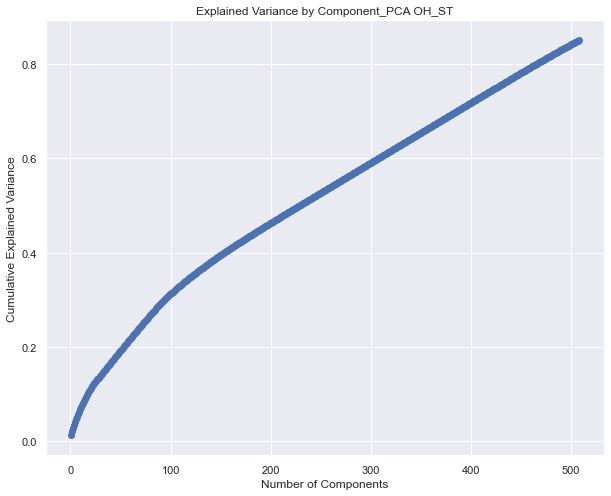

In [41]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component_PCA OH_ST')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,509), Final_PCA.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

#### PCA - OneHot Encoded Non-Standardization

In [42]:
# Create Dataframe of Principle Components of PCA
PCA_OH = pd.DataFrame(data = cluster_df2)
PCA_OH.shape

(101817, 6)

In [43]:
# View the first few rows of dataframe
PCA_OH.head()

0              1              2              3              4  \
0 -2.265412e+06 -247952.811324 -271383.058276 -231550.062111 -109047.305904   
1 -2.244068e+06 -242410.650724 -306301.813533 -177815.684088  -89978.112461   
2 -2.213267e+06 -247542.542433 -207597.501233 -155175.542902    1903.055342   
3 -1.270442e+06  647290.472371  728279.929063  489355.792589 -487293.142590   
4 -1.270443e+06  647290.168584  728278.141187  489347.275108 -487305.448681   

             5  
0 -1495.263191  
1 -1384.161794  
2 -1175.222757  
3 -1596.496947  
4 -1718.217326

In [44]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA2.explained_variance_ratio_))

Explained variation per principal component: [9.48024694e-01 3.91529881e-02 1.00872170e-02 1.83361293e-03
 9.01357077e-04 6.60999877e-08]


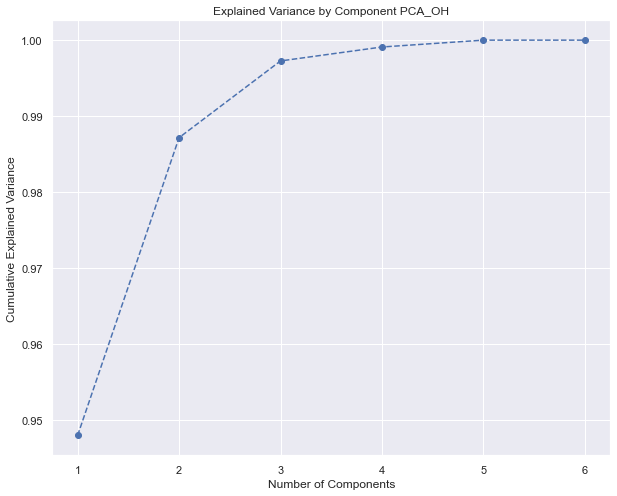

In [46]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA_OH')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,7), Final_PCA2.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

#### PCA - Primary with Standardization

In [47]:
# Create Dataframe of Principle Components of PCA
PCA_PR_ST = pd.DataFrame(data = cluster_df3)
PCA_PR_ST.shape

(101817, 12)

In [48]:
# View the first few rows of dataframe
PCA_PR_ST.head()

0         1         2         3         4         5         6   \
0 -5.793667  2.742100  0.902262  1.157285  0.221065  0.715892 -0.377157   
1 -4.543761  3.831642 -0.324114  0.997647  1.731202  2.951396 -0.456731   
2 -2.521390  2.551074 -1.571003  1.381413  2.231859  3.597990 -0.505324   
3  0.750171  4.705032  0.910090  3.003580  0.731924  6.158499  1.858773   
4 -2.773106  5.001752  1.821097  3.078808  1.142493  4.998889  1.889284   

         7         8         9         10        11  
0  0.742006 -1.499344 -0.311756 -0.544813 -0.483619  
1 -1.432685 -0.252782 -0.674658 -1.725803  0.531167  
2 -0.404118 -0.685695 -0.735198 -2.473038  0.581992  
3  7.357802  4.476687  4.924147  1.983331 -1.925792  
4  8.004752  4.994166  4.399379  1.747463 -1.735266

In [49]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA3.explained_variance_ratio_))

Explained variation per principal component: [0.24334073 0.13027973 0.10509428 0.06261954 0.05950251 0.05180006
 0.04183864 0.03864078 0.03485507 0.03317672 0.03185403 0.02666598]


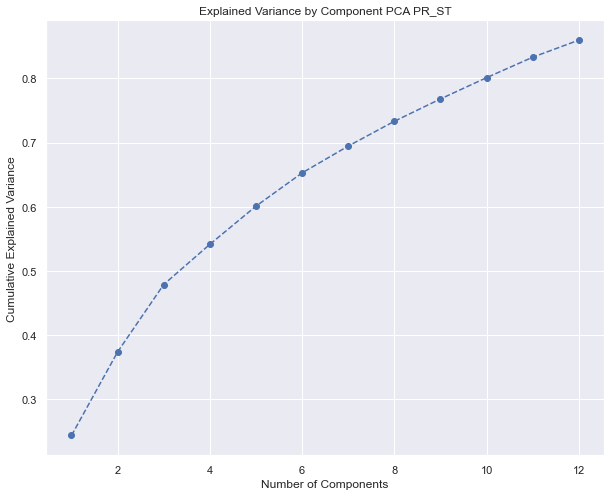

In [50]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA PR_ST')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,13), Final_PCA3.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

#### PCA - Primary with Non-Standardization

In [51]:
# Create Dataframe of Principle Components of PCA
PCA_PR = pd.DataFrame(data = cluster_df4)
PCA_PR.shape

(101817, 6)

In [52]:
# View the first few rows of dataframe
PCA_PR.head()

0              1              2              3              4  \
0 -2.266039e+06 -247941.424132 -271373.782030 -231578.495310 -109051.121541   
1 -2.244696e+06 -242397.397663 -306298.759534 -177847.814193  -89982.674782   
2 -2.213893e+06 -247538.381228 -207598.083335 -155195.872691    1896.071639   
3 -1.271052e+06  647222.079529  728252.040189  489448.403765 -487303.163378   
4 -1.271052e+06  647221.909629  728251.077275  489443.615336 -487309.882196   

            5  
0 -590.787657  
1 -763.885453  
2 -782.276850  
3  594.719902  
4  -89.409477

In [53]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA4.explained_variance_ratio_))

Explained variation per principal component: [9.48013275e-01 3.91611697e-02 1.00908302e-02 1.83349300e-03
 9.01177880e-04 2.30393847e-08]


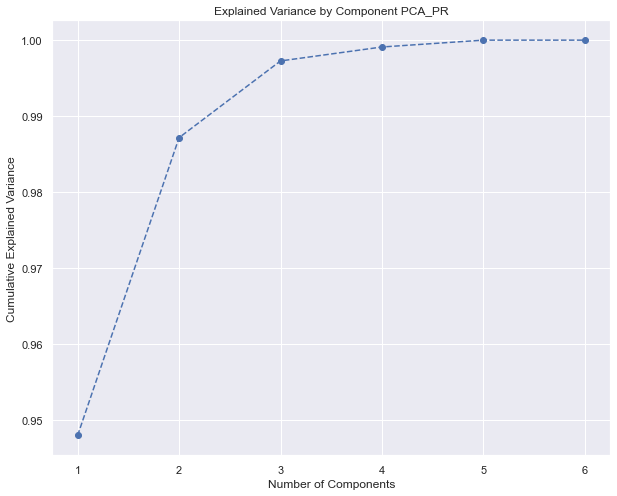

In [55]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA_PR')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,7), Final_PCA4.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

#### Pair Plot for PCA Components:  Primary (PR) Data (No Location)

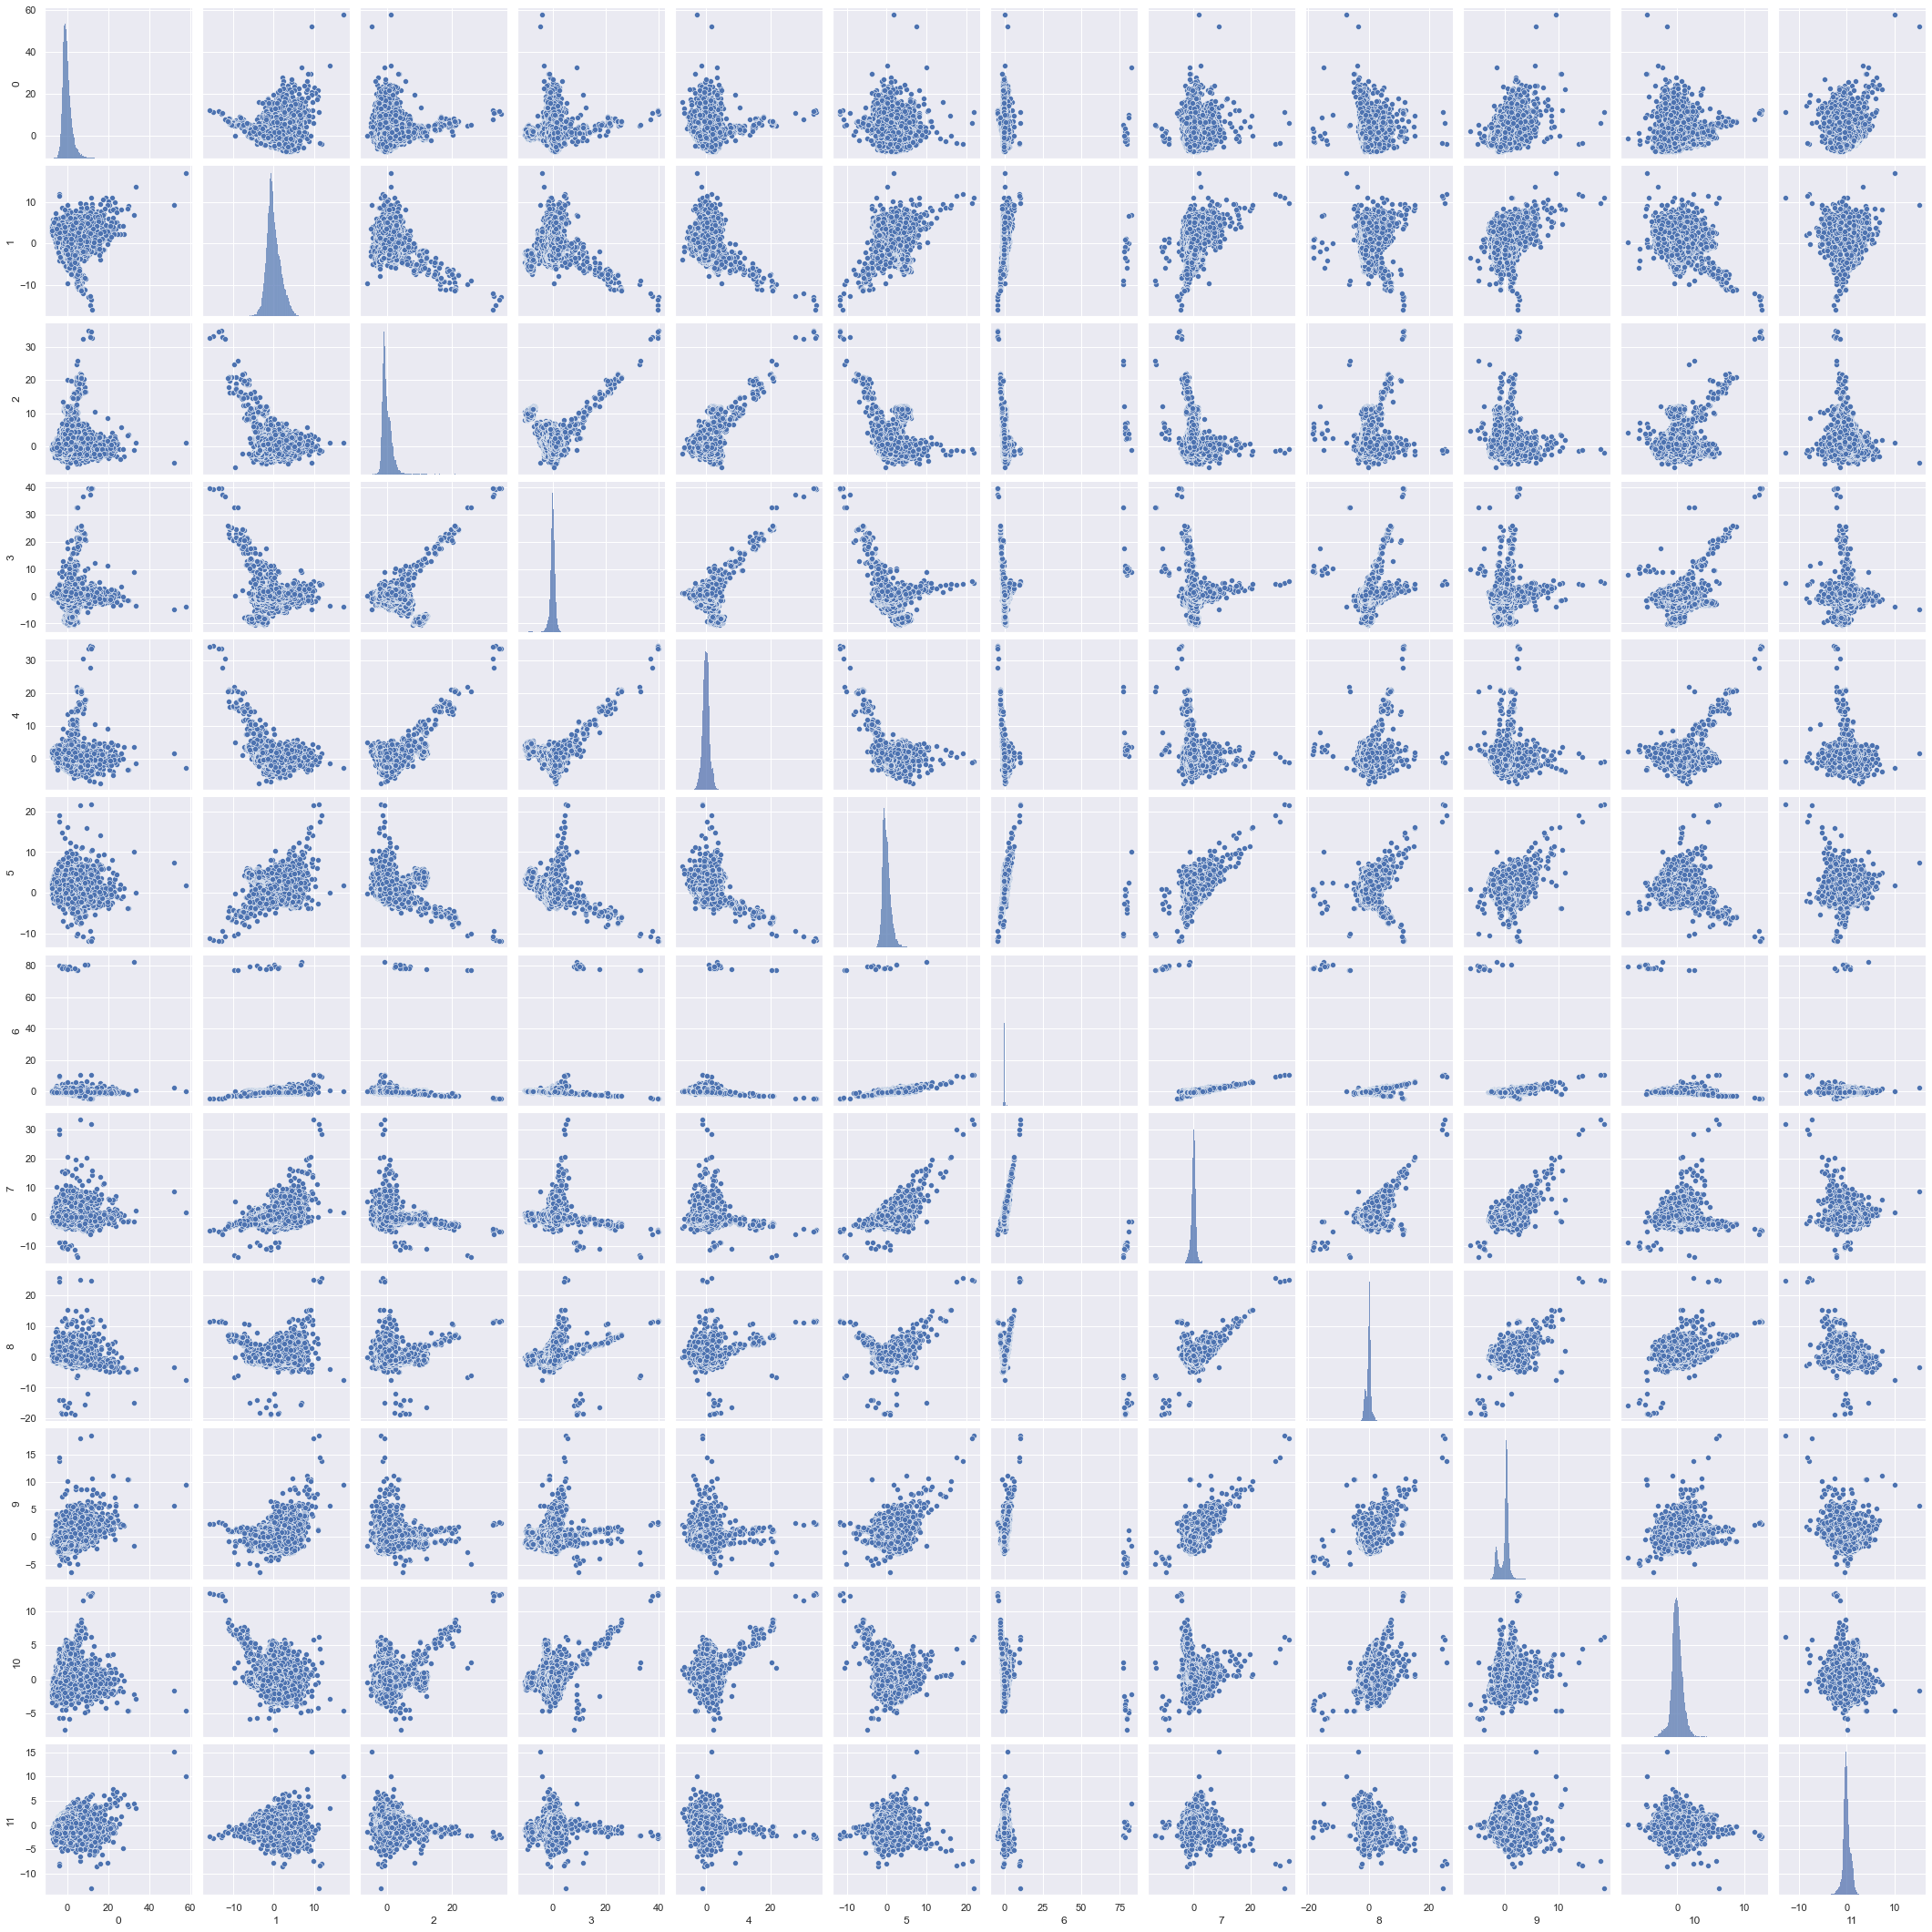

In [56]:
# Plot the PCA Components
sns.pairplot(PCA_PR_ST)

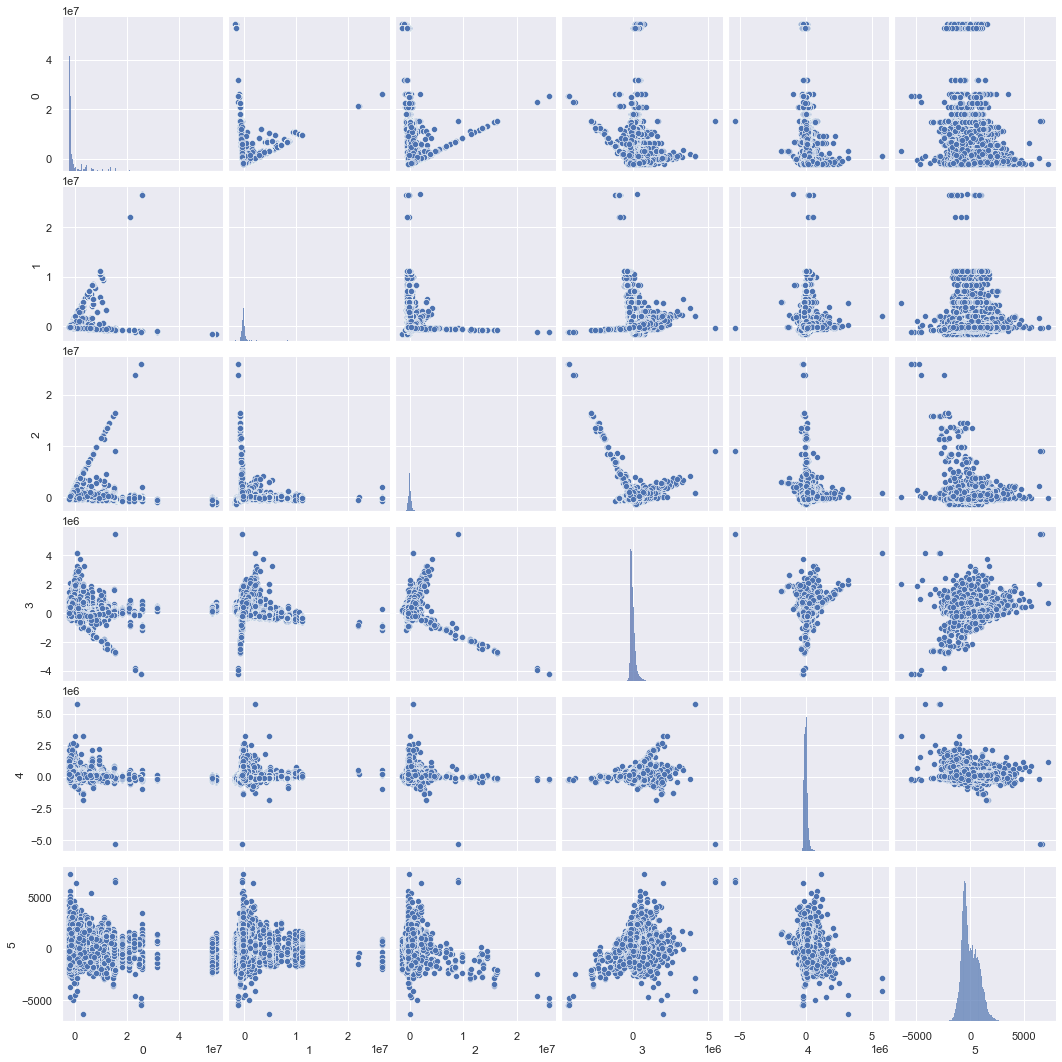

In [57]:
# Plot the PCA Components
sns.pairplot(PCA_PR)

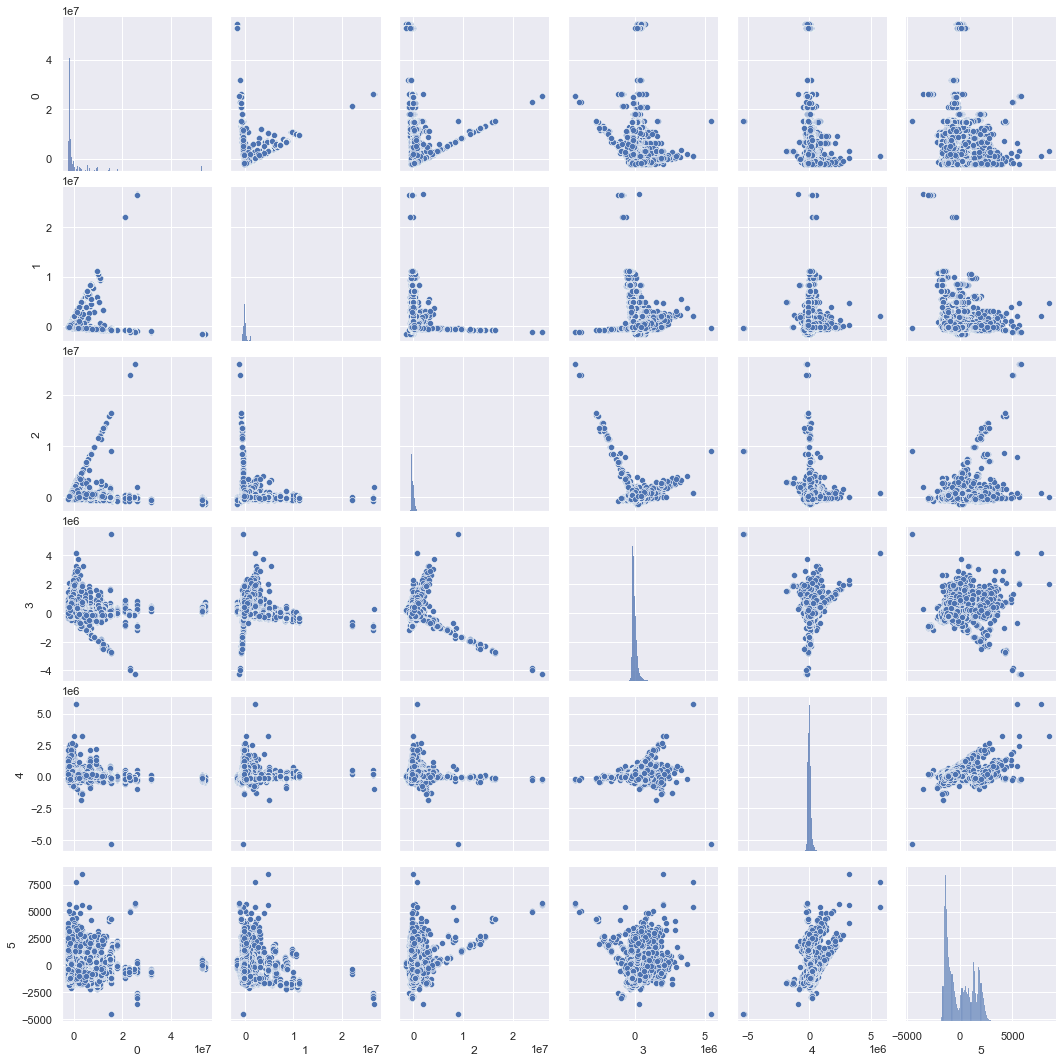

In [59]:
# Plot the PCA Components
sns.pairplot(PCA_OH)

#### Heat-Map of Components to Variables

In [60]:
# Create feature names list
feature_names = df_PR_ST.columns

In [61]:
# View the first 3 PCA Components and the first 10 variables
Final_PCA3.components_[0:2,0:10]

array([[ 0.02180085,  0.25001722,  0.28814607,  0.28604781,  0.24156121,
         0.08740087,  0.35599689,  0.07524616,  0.10782268,  0.26318701],
       [-0.36422279,  0.08498843,  0.09273751,  0.19019539,  0.26852321,
        -0.1871745 , -0.15313222, -0.38839249, -0.32987929, -0.28227449]])

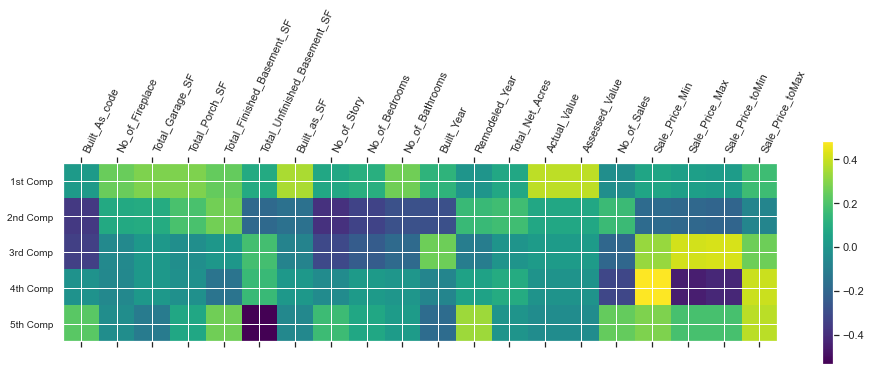

In [62]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[0:5,0:20],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[0:20])),feature_names[0:20],rotation=65,ha='left')

plt.show()# 

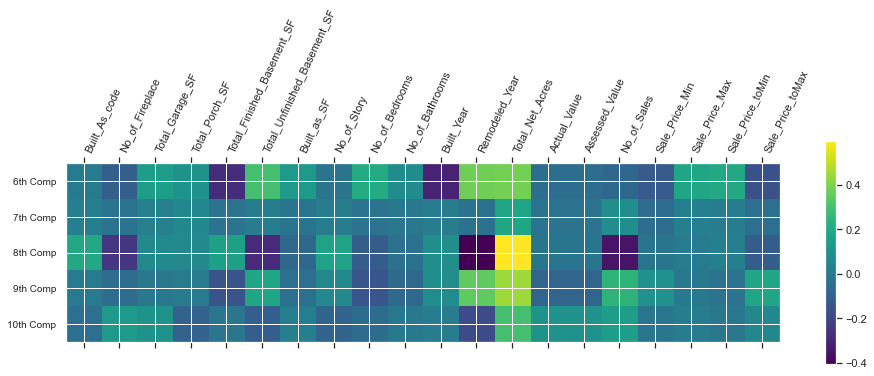

In [63]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[5:10,0:20],cmap='viridis')
plt.yticks([0,1,2,3,4],['6th Comp','7th Comp','8th Comp','9th Comp','10th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[0:20])),feature_names[0:20],rotation=65,ha='left')

plt.show()# 

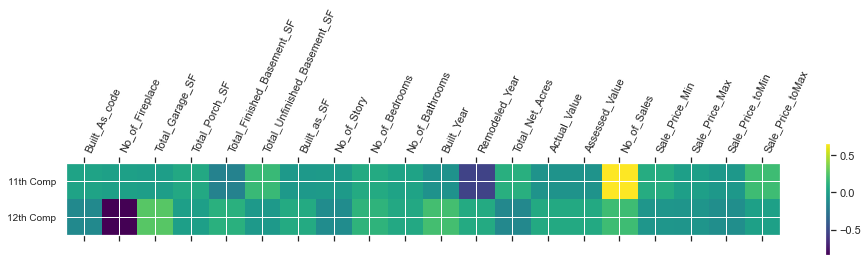

In [64]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[10:13,0:20],cmap='viridis')
plt.yticks([0,1],['11th Comp','12th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[0:20])),feature_names[0:20],rotation=65,ha='left')

plt.show()#

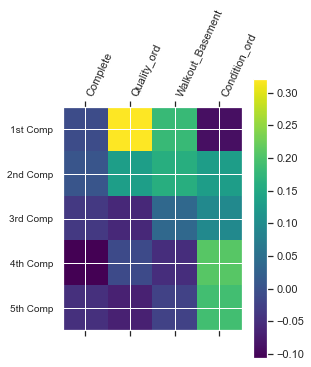

In [65]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[0:5,20:28],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[20:28])),feature_names[20:28],rotation=65,ha='left')

plt.show()# 

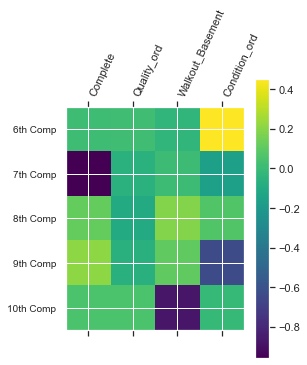

In [66]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[5:10,20:28],cmap='viridis')
plt.yticks([0,1,2,3,4],['6th Comp','7th Comp','8th Comp','9th Comp','10th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[20:28])),feature_names[20:28],rotation=65,ha='left')

plt.show()# 

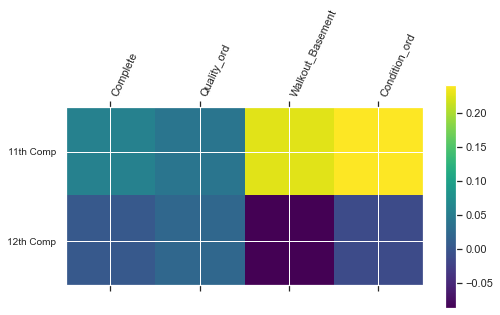

In [67]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[10:13,20:28],cmap='viridis')
plt.yticks([0,1],['11th Comp','12th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[20:28])),feature_names[20:28],rotation=65,ha='left')

plt.show()#

## Unsupervised Cluster Analysis: K-Means

##### Determine the "n" - # of clusters: Elbow Method

In [68]:
# find the appropriate cluster number
sse = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(PCA_PR_ST)
    sse.append(kmeans.inertia_)

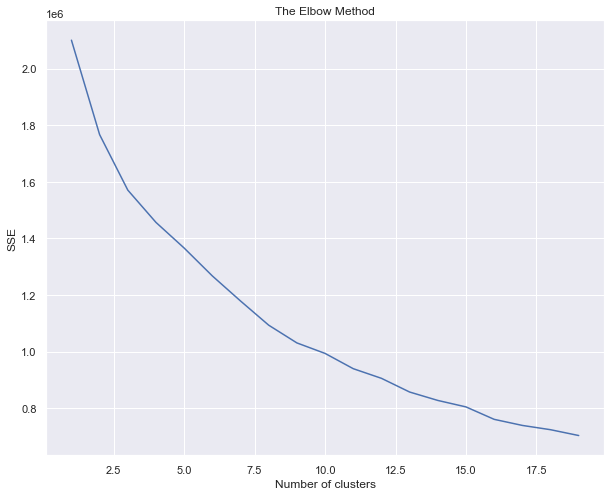

In [69]:
# Plot the sse to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 20), sse)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

##### Determine the "n" - # of clusters: KneeLocator (Kneed Library)

In [70]:
# Use another method with package Kneed
kl = KneeLocator(
    range(1, 20), sse, curve="convex", direction="decreasing"
)

kl.elbow

8

#### K-Means Clustering using PCA Components

In [71]:
# Set KMeans algorithm variables
kmeans_pca = KMeans(
    init="k-means++",
    n_clusters=8,
    random_state=42
)

In [72]:
# fit the data to the model
kmeans_pca.fit_predict(PCA_PR_ST)

array([2, 2, 2, ..., 4, 0, 4])

In [73]:
# The lowest SSE value
kmeans_pca.inertia_

1093137.4008069856

In [74]:
# Final locations of the centroid
kmeans_pca.cluster_centers_

array([[ 1.77952766e+00, -8.79177842e-01, -7.54238886e-01,
         2.01430226e-01, -1.24828038e-01,  1.84150429e-01,
        -5.67681980e-02, -1.32214431e-01, -1.42782271e-02,
        -2.35634330e-01,  2.39362706e-02,  8.03151213e-02],
       [-3.04261222e-01,  1.63897096e+00,  1.72397440e+00,
         9.72974767e-02, -1.00674979e+00, -6.13444239e-01,
        -2.29762037e-02, -2.39498186e-01,  2.22585599e-01,
        -8.44039375e-03, -1.64515417e-01,  2.56059722e-01],
       [-2.09488693e+00,  1.90905331e+00, -2.38591316e-01,
         4.91492752e-01,  6.34354254e-01,  1.16760851e+00,
        -2.01046793e-01, -8.55754869e-02, -7.26898081e-01,
         1.86160105e-02,  2.84658748e-01, -1.62536117e-01],
       [ 3.66642969e+00, -1.40127195e+00,  7.38415746e+00,
         1.32249150e+01,  5.50046113e+00, -1.47586682e+00,
         7.90724492e+01, -8.97149391e+00, -1.47791822e+01,
        -3.48335068e+00, -3.58857816e+00, -2.60522018e-01],
       [ 6.81803721e+00,  2.04926415e+00, -7.3663063

In [75]:
# The number of iterations required to converge
kmeans_pca.n_iter_

23

In [76]:
# View the predicted "Labels" for the first 5 properties
kmeans_pca.labels_[:5]

array([2, 2, 2, 2, 2])

### Analyze Results of K-Means Clustering with PCA

In [77]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_ST
# Components: PCA_PR_ST

df_kmeans_segm = pd.concat([df_PR_ST.reset_index(drop = True), PCA_PR_ST], axis = 1)
# Rename the columns for the PCA Components
df_kmeans_segm.columns.values[-12:] = ['Component_1','Component_2','Component_3','Component_4','Component_5','Component_6'
                                     ,'Component_7','Component_8','Component_9','Component_10','Component_11'
                                     ,'Component_12']

# Add the PCA clustering labels
df_kmeans_segm['Kmeans_PCA_Cluster'] = kmeans_pca.labels_

# Add the names of the clusters
df_kmeans_segm['Cluster'] = df_kmeans_segm['Kmeans_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'
                                                                      ,2:'Third'
                                                                      ,3:'Fourth'
                                                                      ,4:'Fifth'
                                                                      ,5:'Sixth'
                                                                      ,6:'Seventh'
                                                                      ,7:'Eighth'})

df_kmeans_segm.shape

(101817, 38)

In [78]:
# View the first few records of the dataframe "df_kmeans_segm"
df_kmeans_segm.head()

Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0      -1.637710        -1.783217        -2.288214       -0.763319   
1      -1.637710        -1.783217        -0.852277       -0.135524   
2      -0.416482        -1.783217         1.121661        0.026836   
3      -1.637710         0.016278         0.621546        0.319085   
4      -1.637710        -1.783217        -2.288214       -0.975470   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.765852                     -1.069662    -1.752444   
1                   -0.765852                     -1.069662    -1.615763   
2                   -0.107109                     -1.016308    -0.559254   
3                   -0.765852                     -1.069662     0.704125   
4                   -0.765852                     -1.069662    -1.911290   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.456254       -1.584220        -2.556415   -3.282102       -0.269864   
1    -1.456254       -0.384914        -2.556415   -4.061297        3.611945   
2     0.647991       -0.384914        -1.273660   -4.996331        3.592139   
3    -1.456254       -0.384914        -1.273660   -2.347068       -0.269864   
4    -1.456254       -1.584220        -2.556415   -2.347068       -0.269864   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0        -0.151106     -1.400160       -1.400342    -1.327868       -0.227221   
1        -0.169370     -1.165397       -1.165390    -0.253665       -0.362861   
2        -0.130095     -0.647904       -0.648195    -1.327868       -0.127567   
3        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   
4        13.157318     -0.053061       -0.052934    -0.611733       -0.362861   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.493219         -0.396535         -0.716236  0.012139    -2.097128   
1       -0.488244         -0.392808         -0.743438  0.012139    -0.641340   
2       -0.483378         -0.386214         -0.631082  0.012139    -0.641340   
3       -0.137574         -0.381914          2.361136  0.012139     0.814447   
4       -0.137574         -0.381914          2.361136  0.012139    -0.641340   

   Walkout_Basement  Condition_ord  Component_1  Component_2  Component_3  \
0         -0.603731       1.885286    -5.793667     2.742100     0.902262   
1         -0.603731       1.885286    -4.543761     3.831642    -0.324114   
2         -0.603731       1.885286    -2.521390     2.551074    -1.571003   
3         -0.603731       1.885286     0.750171     4.705032     0.910090   
4         -0.603731       1.885286    -2.773106     5.001752     1.821097   

   Component_4  Component_5  Component_6  Component_7  Component_8  \
0     1.157285     0.221065     0.715892    -0.377157     0.742006   
1     0.997647     1.731202     2.951396    -0.456731    -1.432685   
2     1.381413     2.231859     3.597990    -0.505324    -0.404118   
3     3.003580     0.731924     6.158499     1.858773     7.357802   
4     3.078808     1.142493     4.998889     1.889284     8.004752   

   Component_9  Component_10  Component_11  Component_12  Kmeans_PCA_Cluster  \
0    -1.499344     -0.311756     -0.544813     -0.483619                   2   
1    -0.252782     -0.674658     -1.725803      0.531167                   2   
2    -0.685695     -0.735198     -2.473038      0.581992                   2   
3     4.476687      4.924147      1.983331     -1.925792                   2   
4     4.994166      4.399379      1.747463     -1.735266                   2   

  Cluster  
0   Third  
1   Third  
2   Third  
3   Third  
4   Third

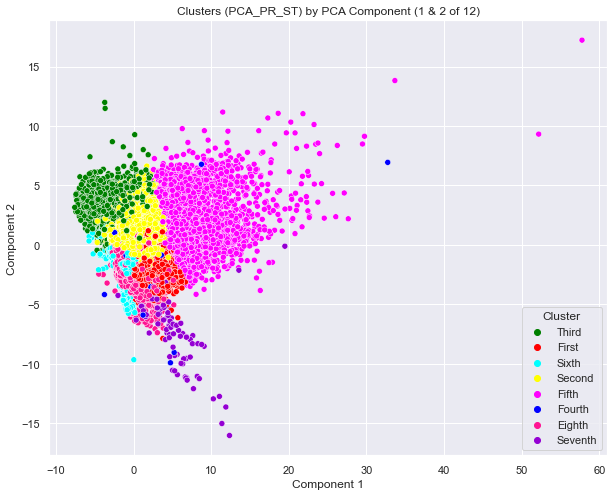

In [81]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters (PCA_PR_ST) by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm['Component_1']
y_axis = df_kmeans_segm['Component_2']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()



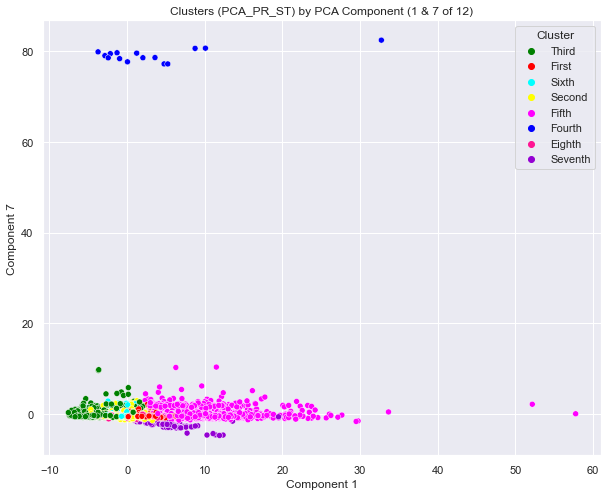

In [83]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters (PCA_PR_ST) by PCA Component (1 & 7 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 7')

# Set the Axis
x_axis = df_kmeans_segm['Component_1']
y_axis = df_kmeans_segm['Component_7']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()


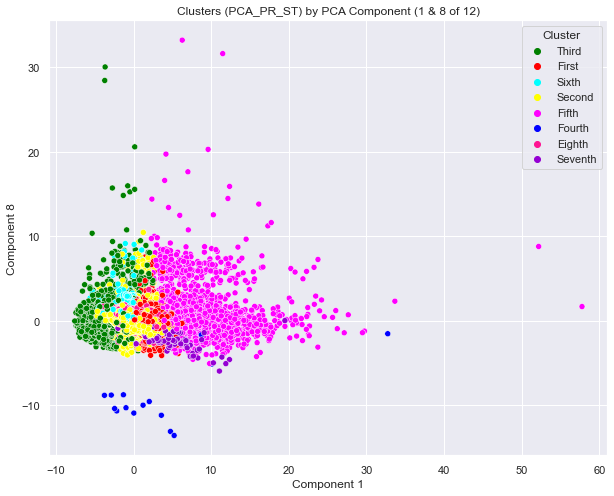

In [84]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters (PCA_PR_ST) by PCA Component (1 & 8 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 8')

# Set the Axis
x_axis = df_kmeans_segm['Component_1']
y_axis = df_kmeans_segm['Component_8']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()


##### Separate and View each Cluster

In [85]:
# Separate out the Clusters

kmeans_pca_cluster1 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'First']
kmeans_pca_cluster2 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Second']
kmeans_pca_cluster3 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Third']
kmeans_pca_cluster4 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Fourth']
kmeans_pca_cluster5 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Fifth']
kmeans_pca_cluster6 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Sixth']
kmeans_pca_cluster7 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Seventh']
kmeans_pca_cluster8 = df_kmeans_segm[df_kmeans_segm['Cluster'] == 'Eighth']

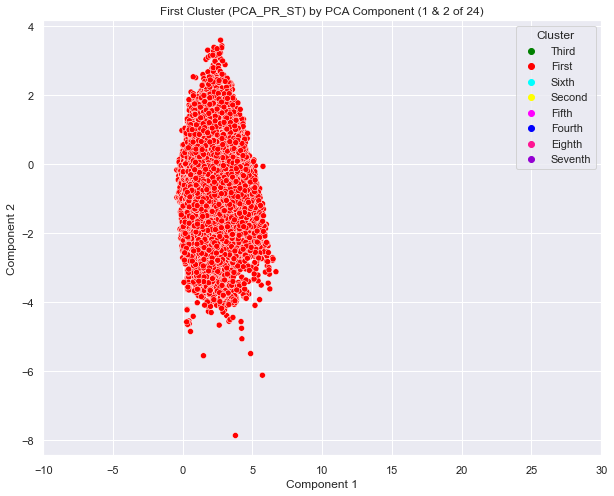

In [87]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster1['Component_1']
y_axis = kmeans_pca_cluster1['Component_2']

# Set Axis Limits
plt.xlim([-10, 60])
plt.xlim([-10, 30])

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

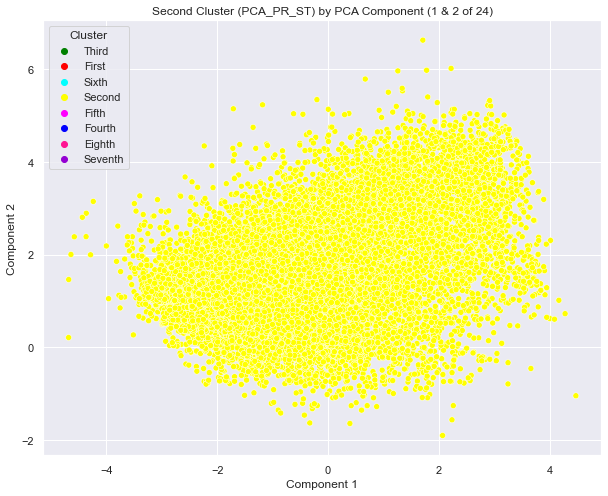

In [88]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster2['Component_1']
y_axis = kmeans_pca_cluster2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

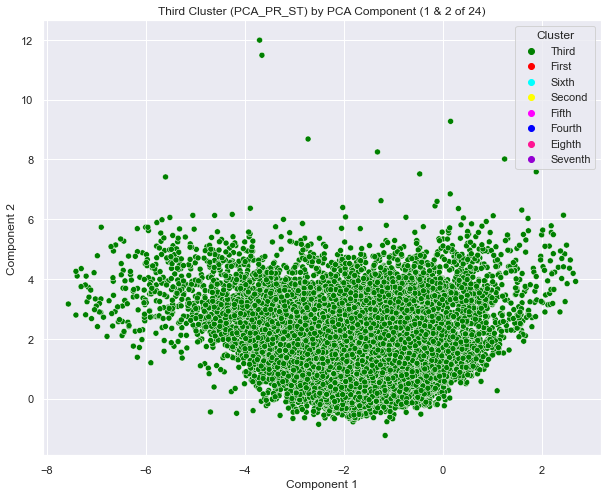

In [89]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster3['Component_1']
y_axis = kmeans_pca_cluster3['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

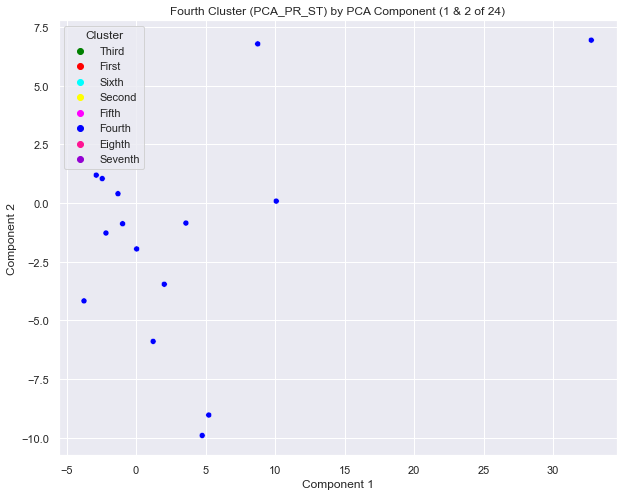

In [90]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster4['Component_1']
y_axis = kmeans_pca_cluster4['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

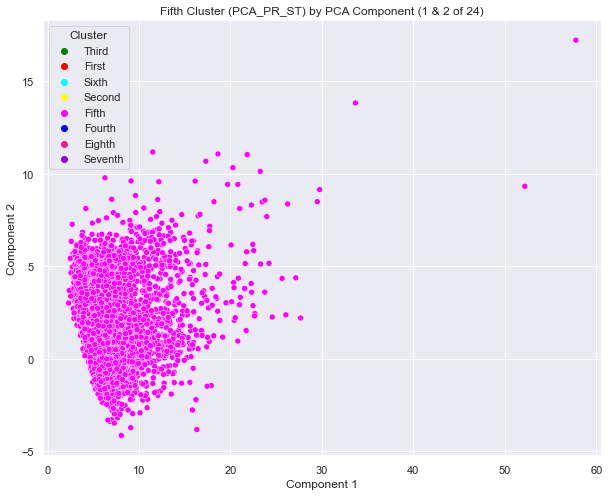

In [91]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fifth Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster5['Component_1']
y_axis = kmeans_pca_cluster5['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

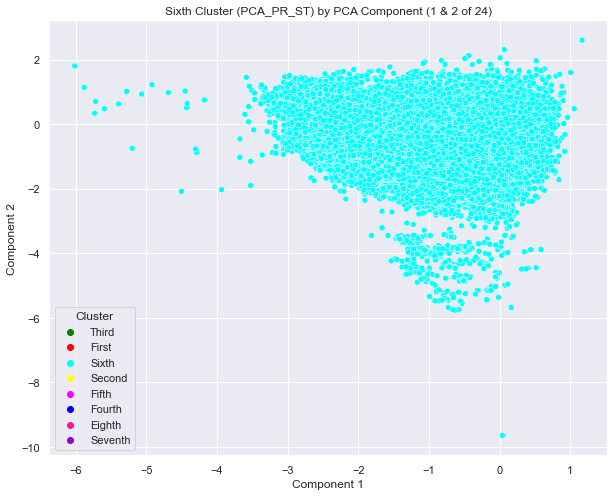

In [92]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Sixth Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster6['Component_1']
y_axis = kmeans_pca_cluster6['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

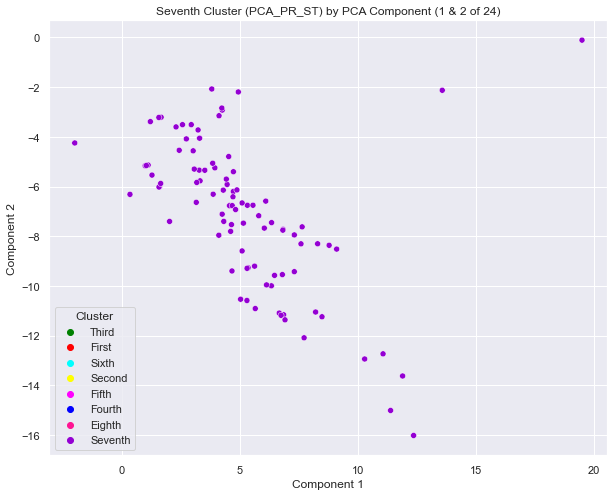

In [93]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Seventh Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster7['Component_1']
y_axis = kmeans_pca_cluster7['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

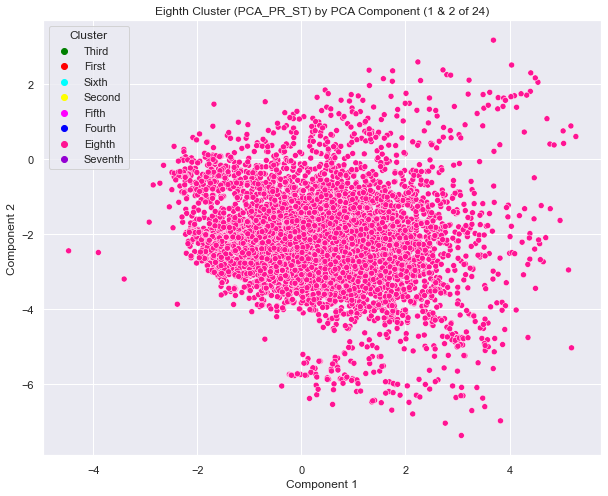

In [94]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Eighth Cluster (PCA_PR_ST) by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster8['Component_1']
y_axis = kmeans_pca_cluster8['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm['Cluster'], palette = color_dict)

plt.show()

### Performance Evaluation

For this analysis we do not have any "ground truth labels".  There are a few evaluation metrics that are used for clustering when ground truth labels are not known.

        - Silhouette Coefficient
        - Calinski-Harabasz Index
        - Davies-Bouldin Index

Reference: https://medium.com/@haataa/how-to-measure-clustering-performances-when-there-are-no-ground-truth-db027e9a871c

##### The Silhouette Coefficient

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters. 

        - Close to -1:incorrect clustering
        - Close to 0: overlapping clusters.
        - Close to 1:highly dense clustering
        


In [95]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels = kmeans_pca.labels_
silhouette1 = metrics.silhouette_score(PCA_PR_ST, labels, metric='euclidean')
silhouette1

0.18401331047113947

##### Calinski-Harabasz Index

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.


In [96]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski1 = metrics.calinski_harabasz_score(PCA_PR_ST, labels)
Calinski1

13405.516595740373

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels.
A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [97]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies1 = davies_bouldin_score(PCA_PR_ST, labels)
Davies1

1.3090874179447884

#### Compare the Different Methods

In [98]:
# Create a dataframe with the 3 performance evaluation methods
Metric = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval = [silhouette1,Calinski1,Davies1]
Performance_Evaluation = pd.DataFrame(Eval,index=Metric,columns=['K-Means_PCA'])
Performance_Evaluation

K-Means_PCA
Silhouette             0.184013
Calinski-Harabasz  13405.516596
Davies-Bouldin         1.309087

In [99]:
#### Write to a file 
Performance_Evaluation.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Performance_Eval.csv')

## Unsupervised Cluster Analysis: K-Means on Data Subset (Build Year >= 2000)

### Filter the data

In [100]:
# View the first few records of the dataframe
df_PR.head()

Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0            1.0              0.0              0.0            98.0   
1            1.0              0.0            379.0           388.0   
2            5.0              0.0            900.0           463.0   
3            1.0              1.0            768.0           598.0   
4            1.0              0.0              0.0             0.0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                         0.0                           0.0        969.0   
1                         0.0                           0.0       1080.0   
2                       456.0                          34.0       1938.0   
3                         0.0                           0.0       2964.0   
4                         0.0                           0.0        840.0   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0          1.0             2.0              1.0      1957.0             0.0   
1          1.0             3.0              1.0      1947.0          1960.0   
2          2.0             3.0              2.0      1935.0          1950.0   
3          1.0             3.0              2.0      1969.0             0.0   
4          1.0             2.0              1.0      1969.0             0.0   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.289991      167167.0         11950.0          1.0         49000.0   
1         0.230005      210908.0         15080.0          4.0             0.0   
2         0.358999      307327.0         21970.0          1.0         85000.0   
3        44.000000      418158.0         29900.0          3.0             0.0   
4        44.000000      418158.0         29900.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0         49000.0           49000.0           49000.0       1.0          2.0   
1         67200.0           62000.0           37500.0       1.0          3.0   
2         85000.0           85000.0           85000.0       1.0          3.0   
3       1350000.0          100000.0         1350000.0       1.0          4.0   
4       1350000.0          100000.0         1350000.0       1.0          3.0   

   Walkout_Basement  Condition_ord  
0               0.0            5.0  
1               0.0            5.0  
2               0.0            5.0  
3               0.0            5.0  
4               0.0            5.0

<BarContainer object of 142 artists>

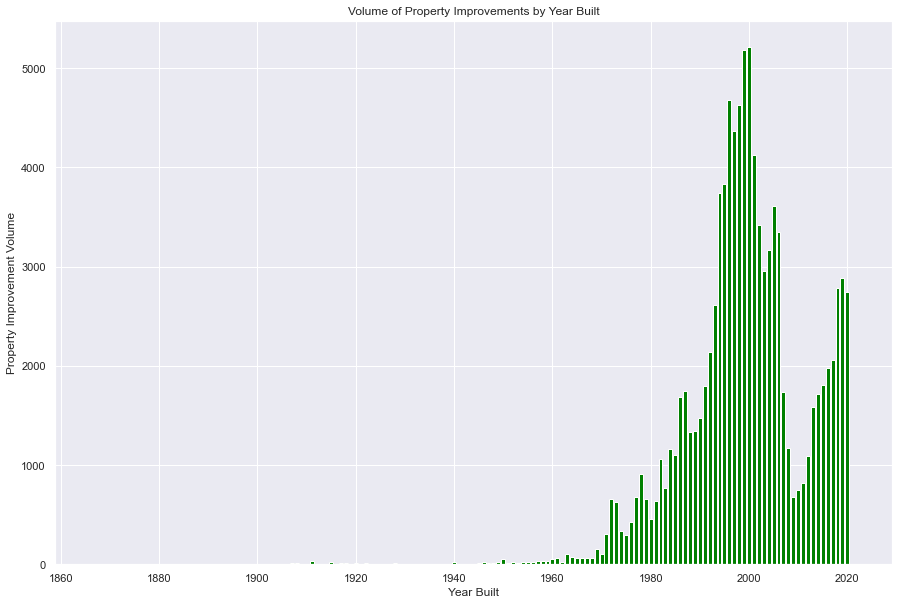

In [101]:
# Visualize number of records per Built Year
# Create Summary for Built Year
builtyr = df_PR['Built_Year'].value_counts().to_frame('count').reset_index()

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')
           
# View the Year Built for properties in douglas county
plt.bar(builtyr['index'], builtyr['count'], color='green')

In [102]:
# Identify Rows
is_2000 = df_PR['Built_Year']>=2000
print(is_2000.head())

0    False
1    False
2    False
3    False
4    False
Name: Built_Year, dtype: bool


In [103]:
# Filter the dataframe to Build Year >= 2000
df_PR_2000 = df_PR[is_2000]
print(df_PR_2000.shape)

(49638, 24)


<BarContainer object of 22 artists>

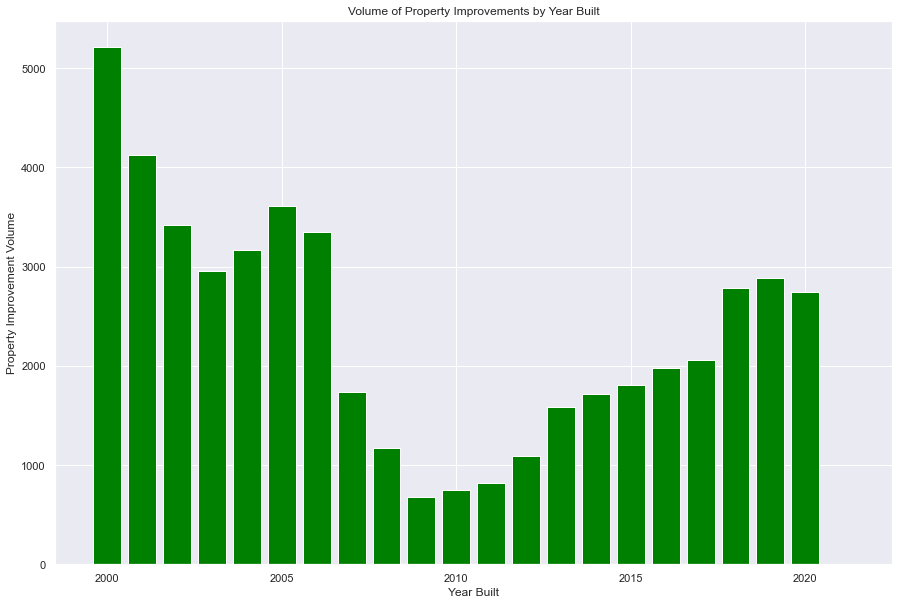

In [104]:
# Visualize number of records per Built Year
# Create Summary for Built Year
builtyr2 = df_PR_2000['Built_Year'].value_counts().to_frame('count').reset_index()

# Set Figure labels and size
plt.figure(figsize=(15,10))
plt.title('Volume of Property Improvements by Year Built')
plt.xlabel('Year Built')
plt.ylabel('Property Improvement Volume')
           
# View the Year Built for properties in douglas county
plt.bar(builtyr2['index'], builtyr2['count'], color='green')

### Standarize the data

In [105]:
# Copy DF for standardization of data
df_PR_2000_stan = df_PR_2000.copy()

In [106]:
# Extract column names
col_vars = df_PR_2000_stan.columns
col_vars

Index(['Built_As_code', 'No_of_Fireplace', 'Total_Garage_SF', 'Total_Porch_SF',
       'Total_Finished_Basement_SF', 'Total_Unfinished_Basement_SF',
       'Built_as_SF', 'No_of_Story', 'No_of_Bedrooms', 'No_of_Bathrooms',
       'Built_Year', 'Remodeled_Year', 'Total_Net_Acres', 'Actual_Value',
       'Assessed_Value', 'No_of_Sales', 'Sale_Price_Min', 'Sale_Price_Max',
       'Sale_Price_toMin', 'Sale_Price_toMax', 'Complete', 'Quality_ord',
       'Walkout_Basement', 'Condition_ord'],
      dtype='object')

In [107]:
##### Scale the data 
scaler = StandardScaler()
df_PR_2000_stan[col_vars]=scaler.fit_transform(df_PR_2000_stan[col_vars])
df_PR_2000_stan.head(5)

Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
14       4.039457        -1.607184        -2.390045       -0.496650   
29       0.462557        -0.065264         1.334913        0.032566   
34      -1.463466        -0.065264        -0.170606       -0.392767   
35      -0.362882        -0.065264         0.517420        0.938112   
36       0.462557        -0.065264        -0.259384        0.052166   

    Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
14                   -0.717463                     -1.259007    -0.980155   
29                    0.745639                     -0.992388     0.002055   
34                   -0.717463                     -1.259007    -0.286109   
35                   -0.717463                      1.377085     2.081743   
36                   -0.717463                      1.286778    -0.606155   

    No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
14    -1.567502       -1.505296        -1.429374    0.206387       -0.130005   
29     0.563923       -0.402418        -0.204429    1.224062       -0.130005   
34    -1.567502       -0.402418        -1.429374   -1.247434       -0.130005   
35     0.563923       -0.402418        -0.204429   -0.375141       -0.130005   
36     0.563923       -0.402418        -0.204429   -1.247434       -0.130005   

    Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  \
14         0.168048     -1.045625       -1.045934     0.033294   
29         0.503015      0.233313        0.233131     1.193796   
34         0.655272     -0.372189       -0.372442    -1.127208   
35         0.697137      0.772547        0.772687    -1.127208   
36         0.700947     -0.295654       -0.295634    -0.353540   

    Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
14       -0.458179       -0.631949         -0.570552         -0.837644   
29       -0.458179       -0.580255         -0.568973         -0.575590   
34       -0.255453       -0.656644         -0.548920         -0.650463   
35       -0.346680       -0.666062         -0.558654         -0.734694   
36       -0.458179       -0.663132         -0.555626         -0.837644   

    Complete  Quality_ord  Walkout_Basement  Condition_ord  
14  0.016185    -0.633965         -0.632540      -0.397782  
29  0.016185    -0.633965          1.580927      -0.397782  
34  0.016185    -0.633965         -0.632540      -0.397782  
35  0.016185     0.755568         -0.632540      -0.397782  
36  0.016185     0.755568          1.580927      -0.397782

### PCA

In [108]:
# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp5 in range(1, df_PR_2000_stan.shape[1]):
    pca5 = PCA(n_components= comp5, random_state=42)
    pca5.fit(df_PR_2000_stan)
    comp_check5 = pca5.explained_variance_ratio_
    final_comp5 = comp5
    if comp_check5.sum() > 0.85:
        break
        
Final_PCA5 = PCA(n_components= final_comp5,random_state=42)
Final_PCA5.fit(df_PR_2000_stan)
cluster_df5=Final_PCA5.transform(df_PR_2000_stan)
num_comps5 = comp_check5.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp5,comp_check5.sum()))

Using 11 components, we can explain 0.8564840631156547% of the variability in the original data.


In [109]:
# Create Dataframe of Principle Components of PCA
PCA_PR_2000 = pd.DataFrame(data = cluster_df5)
PCA_PR_2000.shape

(49638, 11)

In [110]:
# View the first few rows of dataframe
PCA_PR_2000.head()

0         1         2         3         4         5         6   \
0 -3.505318  0.136106 -1.568542  0.531910  1.132135 -1.471487  0.630101   
1  0.856191 -0.212087 -1.030198 -0.055367  0.397453 -1.419313  0.607963   
2 -1.299027 -1.943168 -1.332228  0.898343 -0.152029  0.154177  0.083804   
3  1.660733  0.598166 -0.224827  0.900751 -2.011494  0.184682  0.284956   
4 -0.079317  0.169784 -1.361780  0.551656 -1.211276  0.509067  0.362658   

         7         8         9         10  
0  0.076085 -0.441120 -0.123965 -0.363346  
1  0.137237 -0.374257 -1.436158  0.357916  
2  0.149507 -0.263022  1.267243 -0.989857  
3 -0.169025 -0.301135  1.043190 -0.667729  
4 -0.082488 -1.007322 -1.390646 -1.124425

In [111]:
#View the explained variance ratio (information or variance each principal component holds 
#  after projecting the data to a lower dimensional subspace)
print('Explained variation per principal component: {}'.format(Final_PCA5.explained_variance_ratio_))

Explained variation per principal component: [0.24672637 0.1303858  0.11287842 0.07146596 0.06063301 0.04934367
 0.04205342 0.04093692 0.03759275 0.03270038 0.03176736]


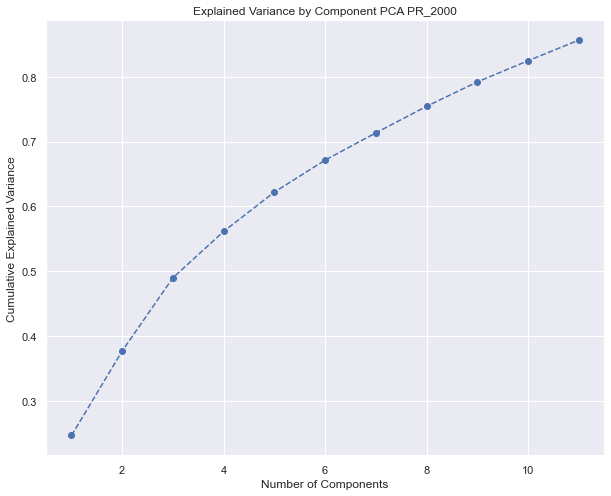

In [112]:
## Plot the Explained Variation

# Set Figure labels and size
plt.figure(figsize=(10,8))
plt.title('Explained Variance by Component PCA PR_2000')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


# Pass parameters to function for plotting
plt.plot(range(1,12), Final_PCA5.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.show()

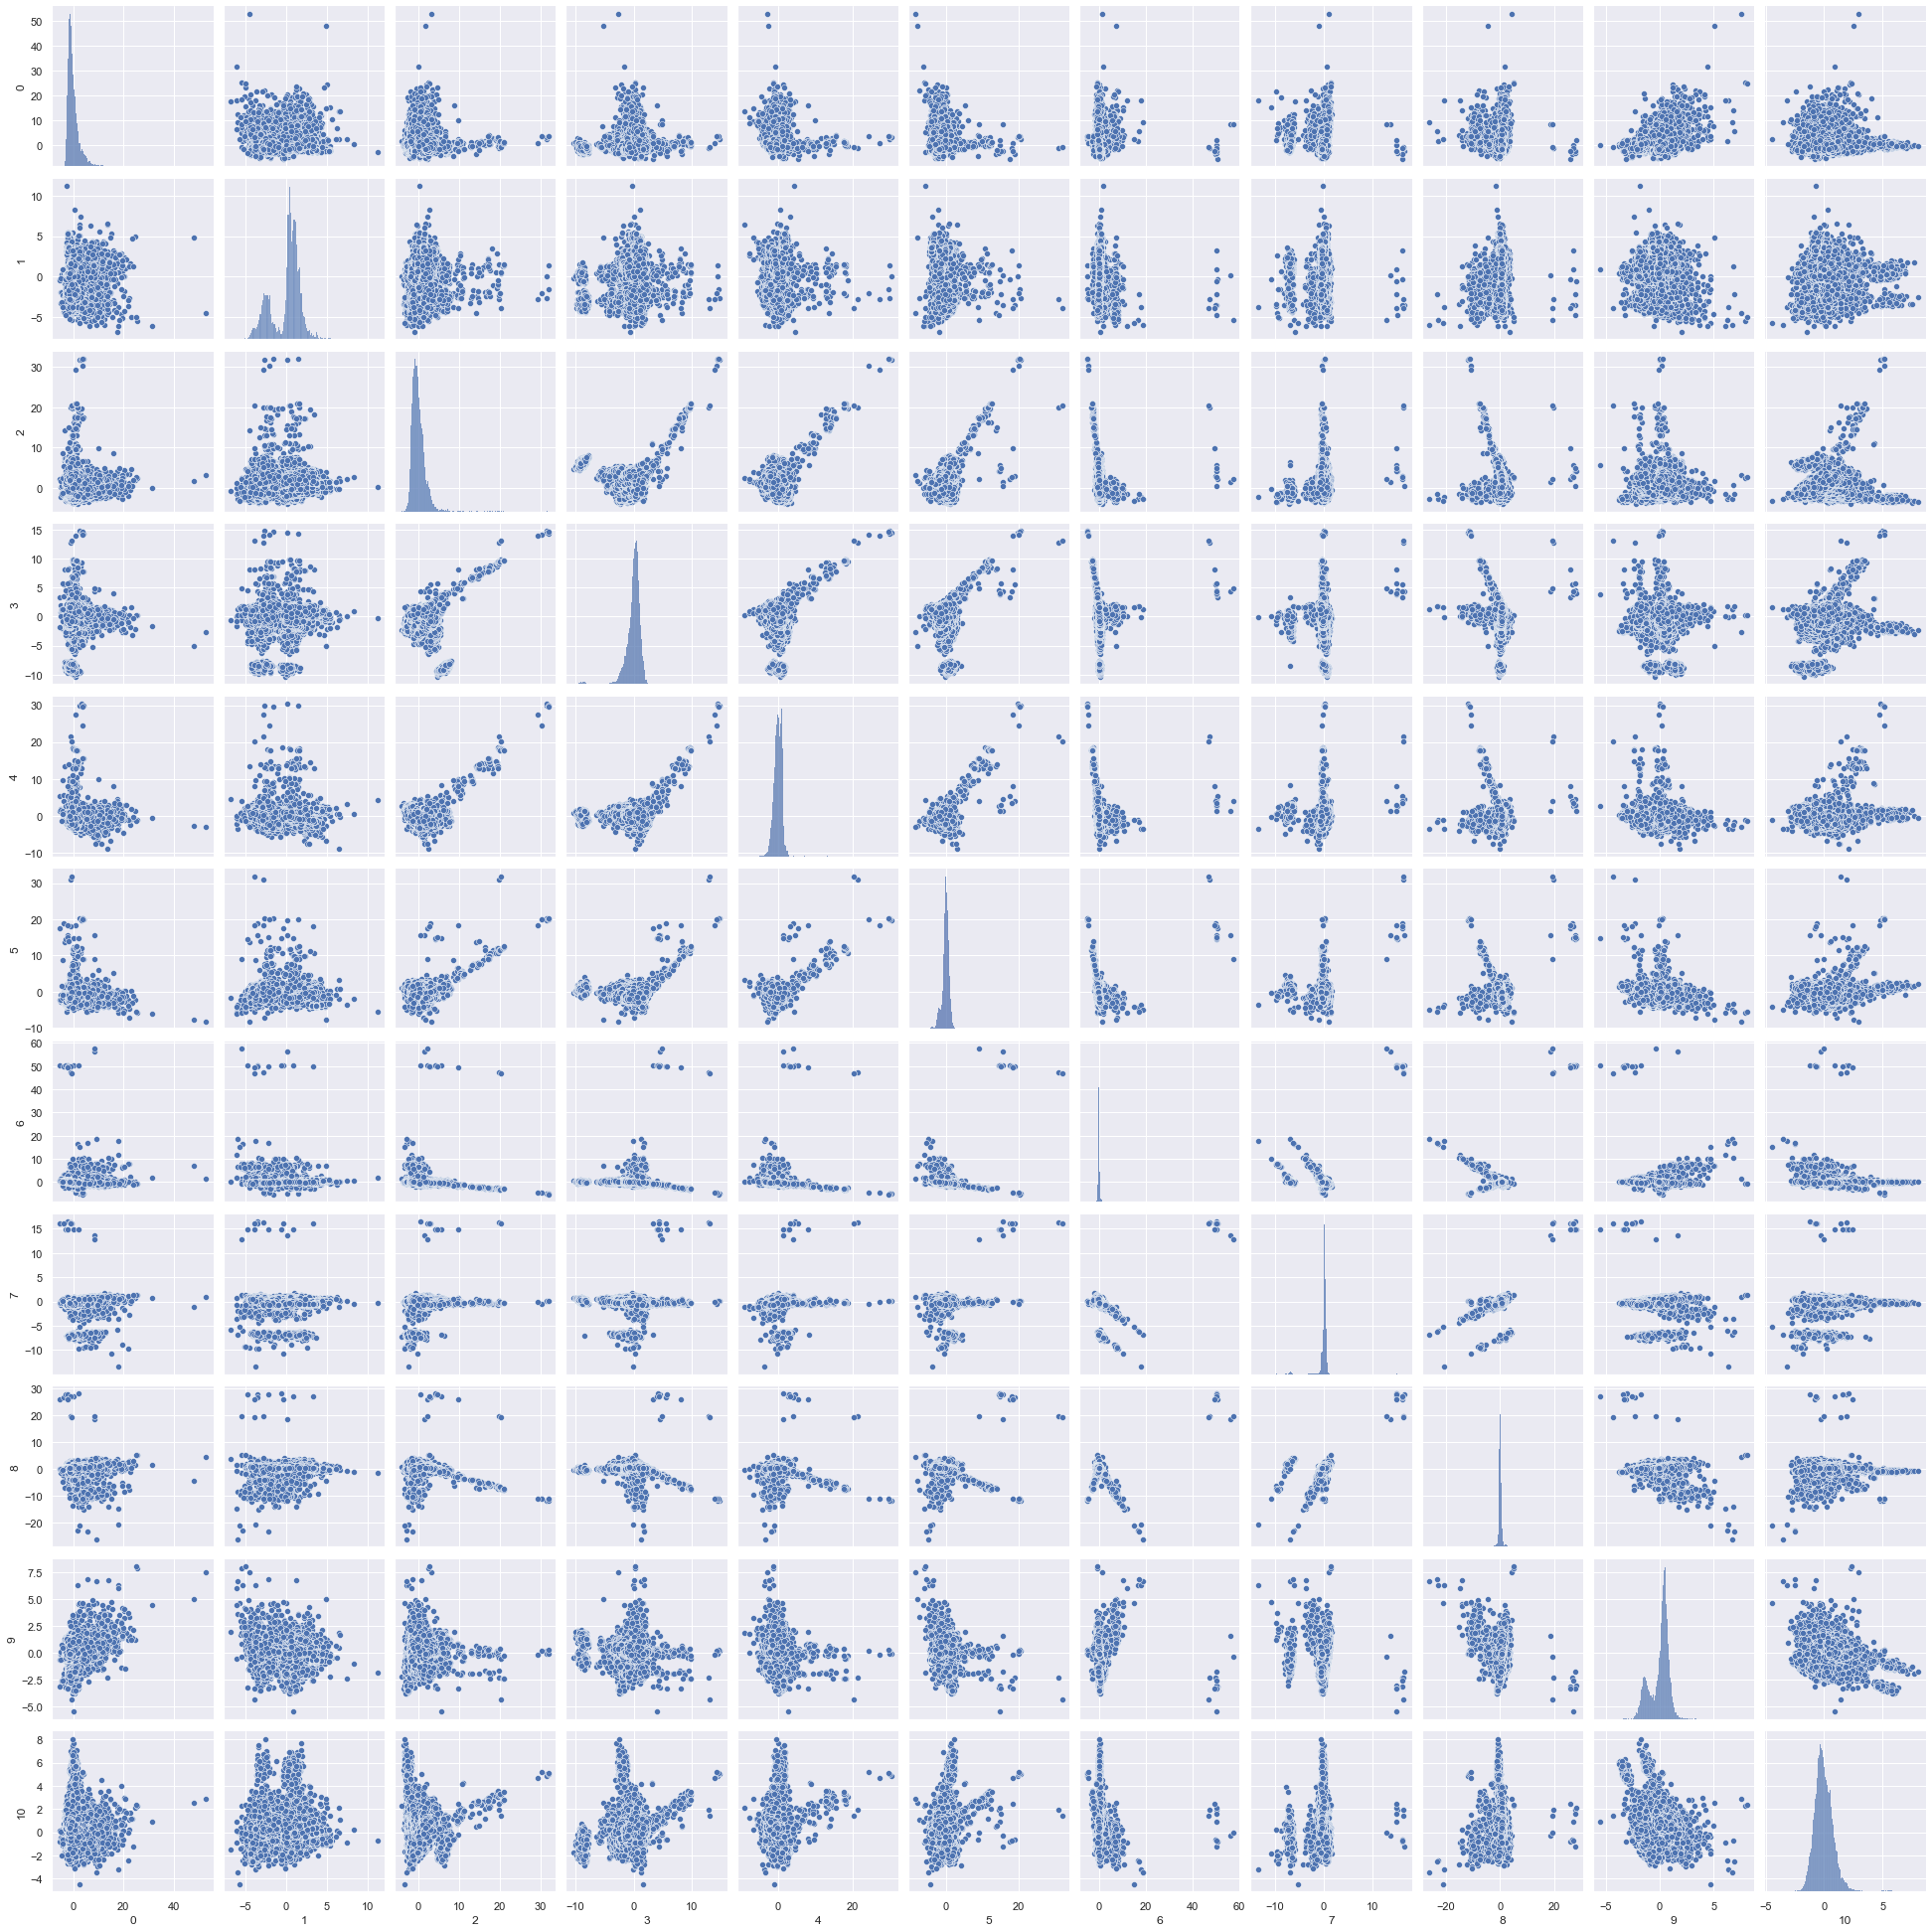

In [113]:
# Plot the PCA Components
sns.pairplot(PCA_PR_2000)

#### Heat-Map of Components to Variables

In [114]:
# Create feature names list
feature_names = df_PR_2000_stan.columns

In [115]:
# View the first 3 PCA Components and the first 10 variables
Final_PCA5.components_[0:2,0:10]

array([[-0.03419396,  0.28098234,  0.31151629,  0.32664651,  0.2740309 ,
         0.02244683,  0.32038993, -0.02175603,  0.03792744,  0.20944049],
       [ 0.48365981, -0.03277238, -0.03079685, -0.05344148, -0.19592722,
         0.03427159,  0.25426196,  0.50691189,  0.45171966,  0.39790203]])

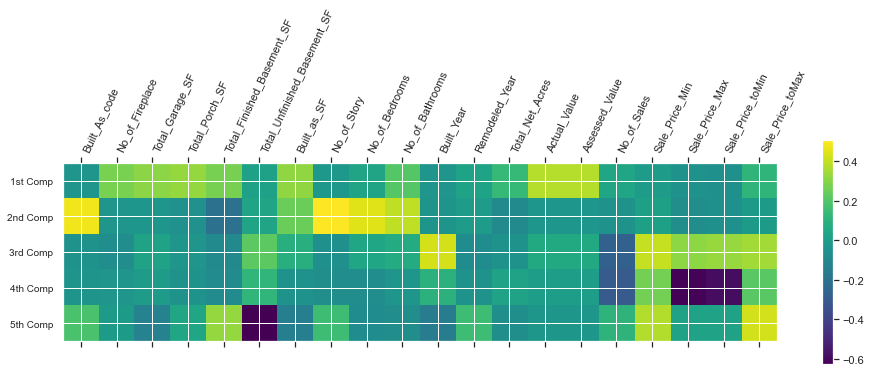

In [116]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA5.components_[0:5,0:20],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[0:20])),feature_names[0:20],rotation=65,ha='left')

plt.show()# 

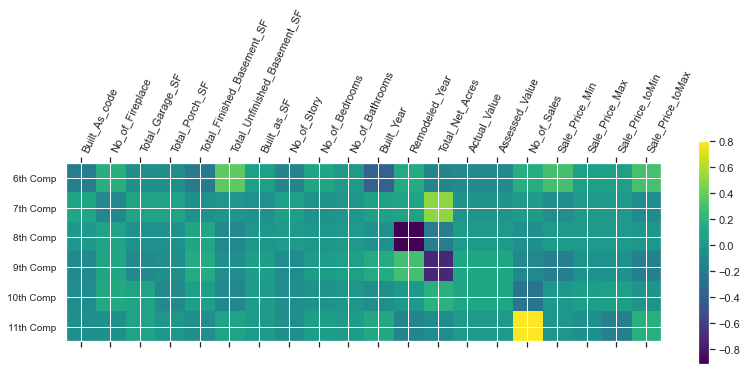

In [117]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA5.components_[5:11,0:20],cmap='viridis')
plt.yticks([0,1,2,3,4,5],['6th Comp','7th Comp','8th Comp','9th Comp','10th Comp','11th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[0:20])),feature_names[0:20],rotation=65,ha='left')

plt.show()# 

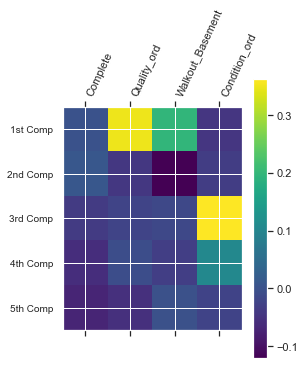

In [118]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA5.components_[0:5,20:28],cmap='viridis')
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[20:28])),feature_names[20:28],rotation=65,ha='left')

plt.show()# 

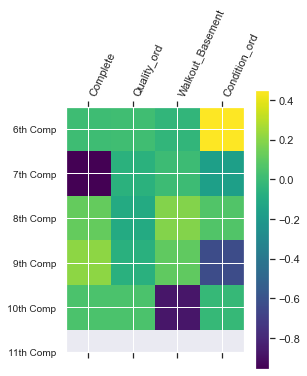

In [119]:
# We can make a heat-plot to see how the features mixed up to create the components
plt.matshow(Final_PCA3.components_[5:10,20:28],cmap='viridis')
plt.yticks([0,1,2,3,4,5],['6th Comp','7th Comp','8th Comp','9th Comp','10th Comp','11th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(feature_names[20:28])),feature_names[20:28],rotation=65,ha='left')

plt.show()# 

#### Unsupervised Cluster Analysis: K-Means

##### Determine the "n" - # of clusters: Elbow Method

In [120]:
# find the appropriate cluster number
sse2 = []
for i in range(1, 20):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans2.fit(PCA_PR_2000)
    sse2.append(kmeans2.inertia_)

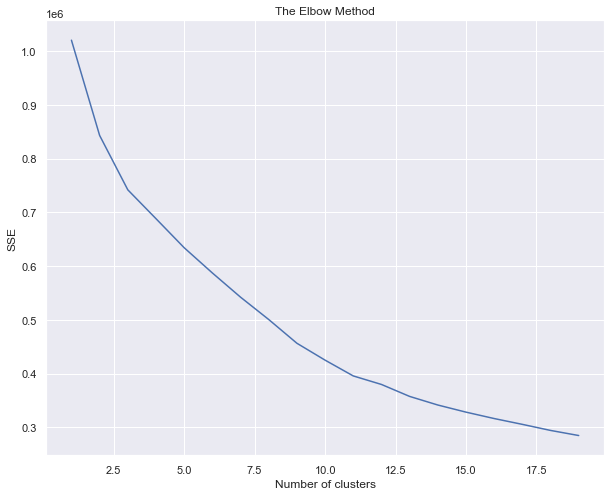

In [121]:
# Plot the sse to find the elbow
plt.figure(figsize=(10, 8))
plt.plot(range(1, 20), sse2)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

##### Determine the "n" - # of clusters: KneeLocator (Kneed Library)

In [122]:
# Use another method with package Kneed
kl_2 = KneeLocator(
    range(1, 20), sse2, curve="convex", direction="decreasing"
)

kl_2.elbow

9

#### K-Means Clustering using PCA Components

In [123]:
# Set KMeans algorithm variables
kmeans_pca2 = KMeans(
    init="k-means++",
    n_clusters=8,
    random_state=42
)

In [124]:
# fit the data to the model
kmeans_pca2.fit_predict(PCA_PR_2000)

array([2, 2, 4, ..., 1, 1, 3])

In [125]:
# The lowest SSE value
kmeans_pca2.inertia_

500726.4243622643

In [126]:
# Final locations of the centroid
kmeans_pca2.cluster_centers_

array([[ 1.27182287e+00,  1.44098088e+00, -2.06032929e-02,
        -2.40722255e-02, -2.80392078e-01,  3.64974228e-01,
        -1.42514205e-01,  4.58921719e-02,  6.18372617e-02,
        -6.41005507e-02, -1.08350772e-01],
       [-1.22555194e+00,  1.11949830e+00,  2.20691100e+00,
         4.72302298e-01,  5.73258140e-02, -1.72085539e+00,
         3.28508975e-01, -3.73037136e-01,  1.81334670e-01,
        -4.02156160e-01,  4.57693694e-01],
       [-1.24223417e+00,  6.01420921e-01, -7.17326598e-01,
        -1.49561741e-01,  2.97771944e-01,  8.74513006e-02,
         4.05250338e-02,  6.60876583e-02, -1.27231462e-01,
         5.95639788e-02, -7.77033476e-02],
       [ 6.46695913e+00, -9.18616322e-01, -2.64323674e-01,
        -6.44182249e-02,  2.57210770e-01, -4.44309843e-01,
         2.11839043e-01, -3.51993200e-02, -1.66377438e-01,
         1.60775360e-01,  2.38038641e-02],
       [-4.99393274e-01, -2.53423466e+00,  1.88373451e-01,
         3.92995269e-01, -4.67342762e-01,  1.47537817e-01,
  

In [127]:
# The number of iterations required to converge
kmeans_pca2.n_iter_

32

In [128]:
# View the predicted "Labels" for the first 5 properties
kmeans_pca2.labels_[:5]

array([2, 2, 4, 0, 2])

### Analyze Results of K-Means Clustering with PCA

In [129]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_2000_stan
# Components: PCA_PR_2000

df_kmeans_segm2 = pd.concat([df_PR_2000_stan.reset_index(drop = True), PCA_PR_2000], axis = 1)
# Rename the columns for the PCA Components
df_kmeans_segm2.columns.values[-11:] = ['Component_1','Component_2','Component_3','Component_4','Component_5','Component_6'
                                     ,'Component_7','Component_8','Component_9','Component_10','Component_11']

# Add the PCA clustering labels
df_kmeans_segm2['Kmeans_PCA_Cluster'] = kmeans_pca2.labels_

# Add the names of the clusters
df_kmeans_segm2['Cluster'] = df_kmeans_segm2['Kmeans_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'
                                                                      ,2:'Third'
                                                                      ,3:'Fourth'
                                                                      ,4:'Fifth'
                                                                      ,5:'Sixth'
                                                                      ,6:'Seventh'
                                                                      ,7:'Eighth'})

df_kmeans_segm2.shape

(49638, 37)

In [130]:
# View the first few records of the dataframe "df_kmeans_segm"
df_kmeans_segm2.head()

Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0       4.039457        -1.607184        -2.390045       -0.496650   
1       0.462557        -0.065264         1.334913        0.032566   
2      -1.463466        -0.065264        -0.170606       -0.392767   
3      -0.362882        -0.065264         0.517420        0.938112   
4       0.462557        -0.065264        -0.259384        0.052166   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                   -0.717463                     -1.259007    -0.980155   
1                    0.745639                     -0.992388     0.002055   
2                   -0.717463                     -1.259007    -0.286109   
3                   -0.717463                      1.377085     2.081743   
4                   -0.717463                      1.286778    -0.606155   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0    -1.567502       -1.505296        -1.429374    0.206387       -0.130005   
1     0.563923       -0.402418        -0.204429    1.224062       -0.130005   
2    -1.567502       -0.402418        -1.429374   -1.247434       -0.130005   
3     0.563923       -0.402418        -0.204429   -0.375141       -0.130005   
4     0.563923       -0.402418        -0.204429   -1.247434       -0.130005   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         0.168048     -1.045625       -1.045934     0.033294       -0.458179   
1         0.503015      0.233313        0.233131     1.193796       -0.458179   
2         0.655272     -0.372189       -0.372442    -1.127208       -0.255453   
3         0.697137      0.772547        0.772687    -1.127208       -0.346680   
4         0.700947     -0.295654       -0.295634    -0.353540       -0.458179   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0       -0.631949         -0.570552         -0.837644  0.016185    -0.633965   
1       -0.580255         -0.568973         -0.575590  0.016185    -0.633965   
2       -0.656644         -0.548920         -0.650463  0.016185    -0.633965   
3       -0.666062         -0.558654         -0.734694  0.016185     0.755568   
4       -0.663132         -0.555626         -0.837644  0.016185     0.755568   

   Walkout_Basement  Condition_ord  Component_1  Component_2  Component_3  \
0         -0.632540      -0.397782    -3.505318     0.136106    -1.568542   
1          1.580927      -0.397782     0.856191    -0.212087    -1.030198   
2         -0.632540      -0.397782    -1.299027    -1.943168    -1.332228   
3         -0.632540      -0.397782     1.660733     0.598166    -0.224827   
4          1.580927      -0.397782    -0.079317     0.169784    -1.361780   

   Component_4  Component_5  Component_6  Component_7  Component_8  \
0     0.531910     1.132135    -1.471487     0.630101     0.076085   
1    -0.055367     0.397453    -1.419313     0.607963     0.137237   
2     0.898343    -0.152029     0.154177     0.083804     0.149507   
3     0.900751    -2.011494     0.184682     0.284956    -0.169025   
4     0.551656    -1.211276     0.509067     0.362658    -0.082488   

   Component_9  Component_10  Component_11  Kmeans_PCA_Cluster Cluster  
0    -0.441120     -0.123965     -0.363346                   2   Third  
1    -0.374257     -1.436158      0.357916                   2   Third  
2    -0.263022      1.267243     -0.989857                   4   Fifth  
3    -0.301135      1.043190     -0.667729                   0   First  
4    -1.007322     -1.390646     -1.124425                   2   Third

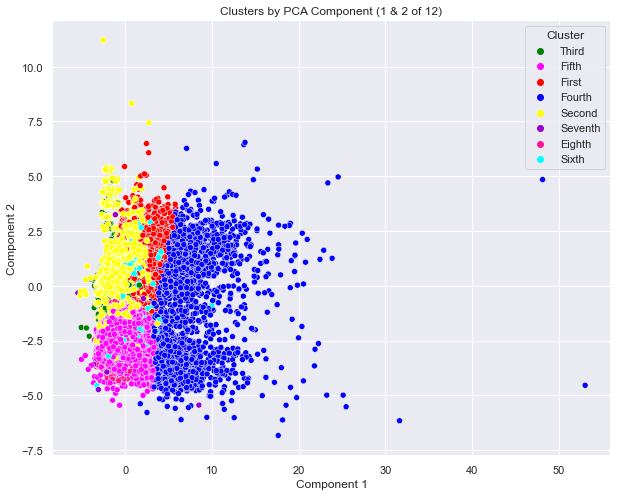

In [131]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_kmeans_segm2['Component_1']
y_axis = df_kmeans_segm2['Component_2']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()



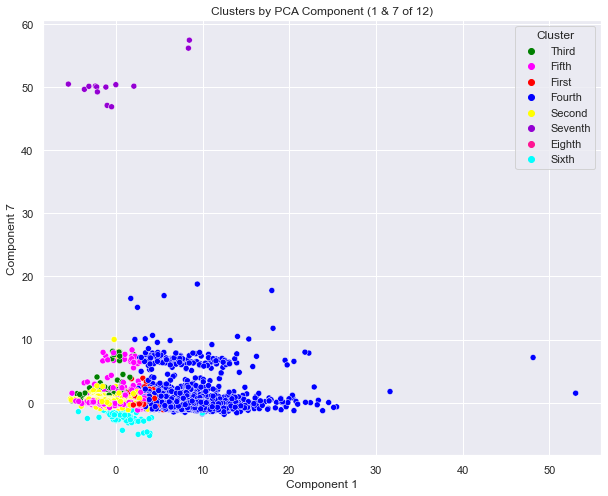

In [132]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 7 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 7')

# Set the Axis
x_axis = df_kmeans_segm2['Component_1']
y_axis = df_kmeans_segm2['Component_7']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()


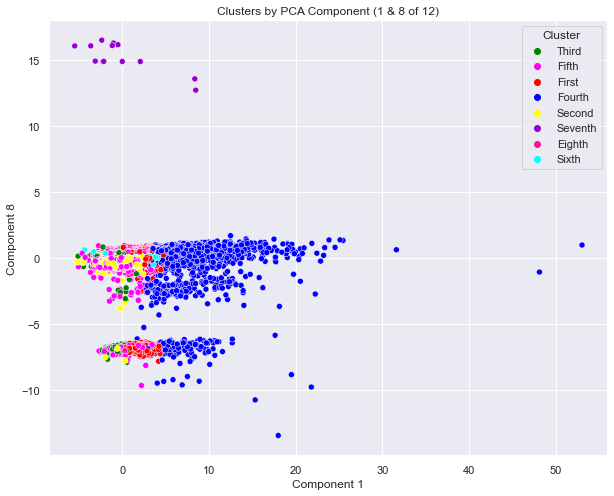

In [133]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Clusters by PCA Component (1 & 8 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 8')

# Set the Axis
x_axis = df_kmeans_segm2['Component_1']
y_axis = df_kmeans_segm2['Component_8']

# Set a color dictionary
color_dict = dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue',
                  'Fifth': 'magenta',
                  'Sixth': 'cyan',
                  'Seventh': 'darkviolet',
                  'Eighth': 'deeppink'})

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()


##### Separate and View each Cluster

In [134]:
# Separate out the Clusters

kmeans_pca_cluster1_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'First']
kmeans_pca_cluster2_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Second']
kmeans_pca_cluster3_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Third']
kmeans_pca_cluster4_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Fourth']
kmeans_pca_cluster5_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Fifth']
kmeans_pca_cluster6_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Sixth']
kmeans_pca_cluster7_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Seventh']
kmeans_pca_cluster8_2 = df_kmeans_segm2[df_kmeans_segm2['Cluster'] == 'Eighth']

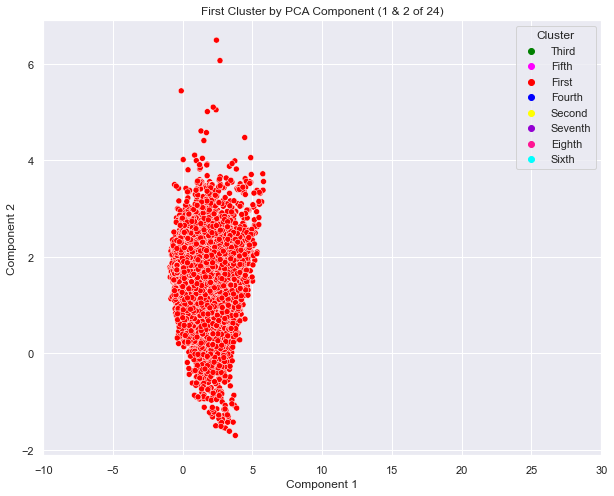

In [135]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster1_2['Component_1']
y_axis = kmeans_pca_cluster1_2['Component_2']

# Set Axis Limits
plt.xlim([-10, 60])
plt.xlim([-10, 30])

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

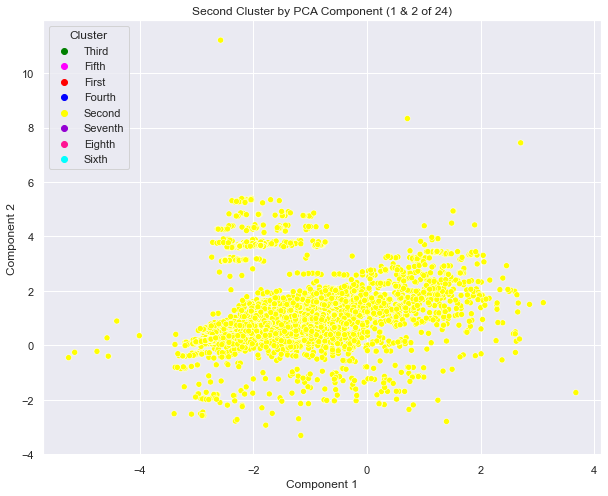

In [136]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster2_2['Component_1']
y_axis = kmeans_pca_cluster2_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

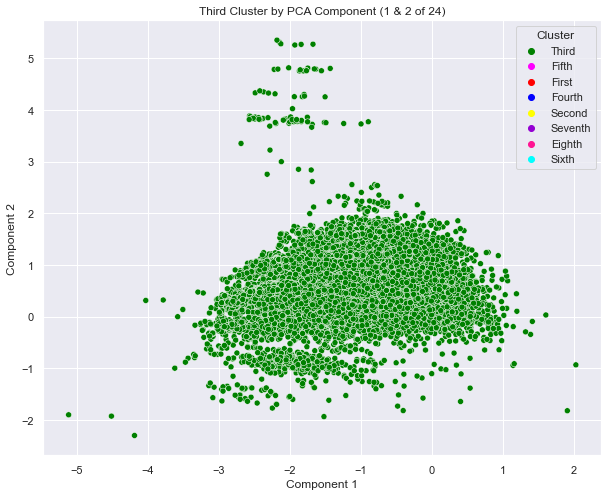

In [137]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster3_2['Component_1']
y_axis = kmeans_pca_cluster3_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

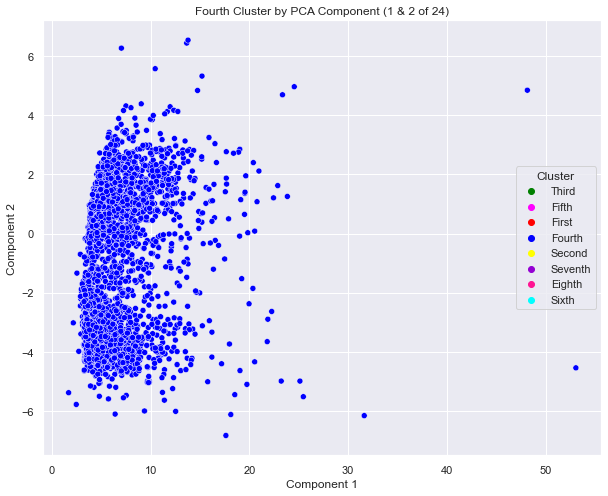

In [138]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster4_2['Component_1']
y_axis = kmeans_pca_cluster4_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

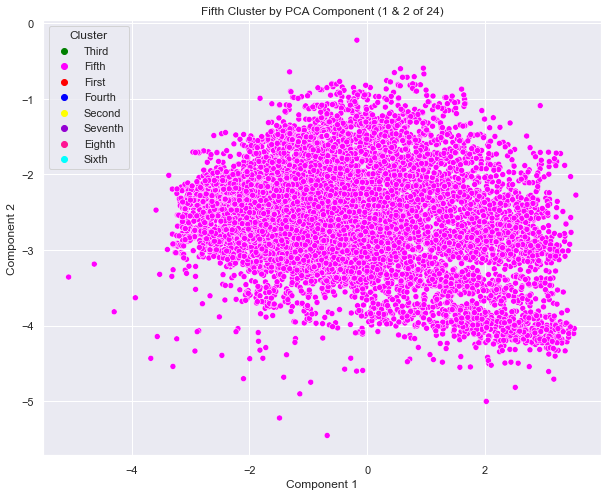

In [139]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fifth Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster5_2['Component_1']
y_axis = kmeans_pca_cluster5_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

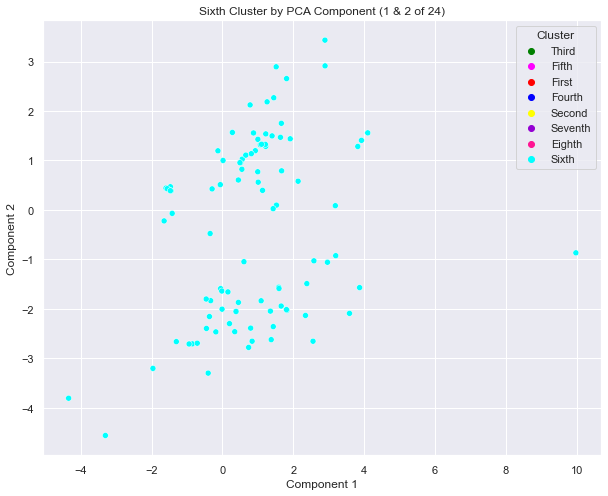

In [140]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Sixth Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster6_2['Component_1']
y_axis = kmeans_pca_cluster6_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

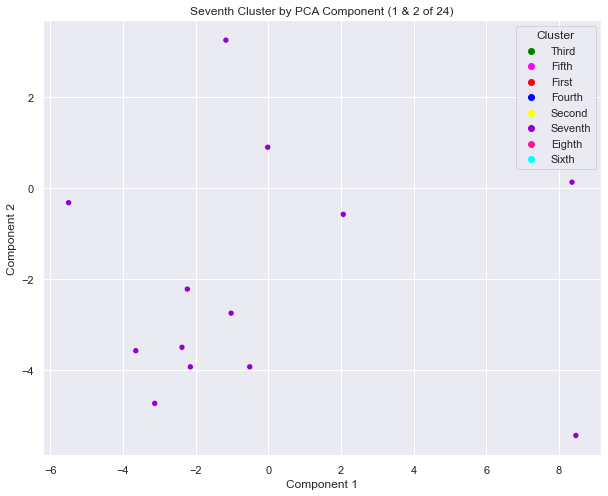

In [141]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Seventh Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster7_2['Component_1']
y_axis = kmeans_pca_cluster7_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

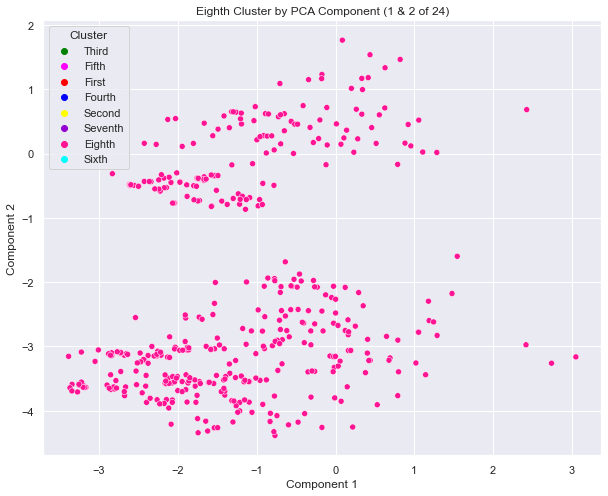

In [142]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Eighth Cluster by PCA Component (1 & 2 of 24)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = kmeans_pca_cluster8_2['Component_1']
y_axis = kmeans_pca_cluster8_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_kmeans_segm2['Cluster'], palette = color_dict)

plt.show()

#### Performance Evaluation


##### The Silhouette Coefficient

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters. 

        - Close to -1:incorrect clustering
        - Close to 0: overlapping clusters.
        - Close to 1:highly dense clustering
        


In [143]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels = kmeans_pca2.labels_
silhouette1_2 = metrics.silhouette_score(PCA_PR_2000, labels, metric='euclidean')
silhouette1_2

0.2041001736186076

##### Calinski-Harabasz Index

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.


In [144]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski1_2 = metrics.calinski_harabasz_score(PCA_PR_2000, labels)
Calinski1_2

7357.440099507737

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels.
A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [145]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies1_2 = davies_bouldin_score(PCA_PR_2000, labels)
Davies1_2

1.1277137119003093

#### Compare the Different Methods

In [146]:
# Create a dataframe with the 3 performance evaluation methods
Metric2 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval2 = [silhouette1_2,Calinski1_2,Davies1_2]
Performance_Evaluation2 = pd.DataFrame(Eval2,index=Metric2,columns=['K-Means_PCA'])
Performance_Evaluation2

K-Means_PCA
Silhouette            0.204100
Calinski-Harabasz  7357.440100
Davies-Bouldin        1.127714

In [147]:
#### Write to a file 
Performance_Evaluation2.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Performance_Eval2.csv')

## Hierarchical Clustering
https://medium.datadriveninvestor.com/unsupervised-learning-with-python-k-means-and-hierarchical-clustering-f36ceeec919c
http://www.sthda.com/english/articles/31-principal-component-methods-in-r-practical-guide/117-hcpc-hierarchical-clustering-on-principal-components-essentials/#:~:text=The%20PCA%20step%20can%20be,as%20in%20gene%20expression%20data.

In [148]:
#### Using the dendrogram to find the optimal numbers of clusters.

In [149]:
# Hierarchical clustering for the same dataset - PCA_Df
# creating a dataset for hierarchical clustering
PCA_PR_2000_hier = PCA_PR_2000
PCA_array = PCA_PR_2000_hier.to_numpy()
len(PCA_array)

49638

In [150]:
# View the array
PCA_array

array([[-3.50531822,  0.13610638, -1.56854214, ..., -0.44111995,
        -0.12396481, -0.36334559],
       [ 0.85619096, -0.21208657, -1.03019763, ..., -0.37425668,
        -1.4361578 ,  0.3579158 ],
       [-1.2990273 , -1.94316791, -1.33222796, ..., -0.26302208,
         1.26724272, -0.98985734],
       ...,
       [-1.0396576 ,  1.62601033,  2.2889903 , ...,  0.54242534,
        -0.04896604,  0.55516381],
       [-1.60782864,  0.42690999,  1.83873511, ...,  0.41870022,
        -0.07193473,  0.35920455],
       [ 9.80150816, -5.04505279,  1.35270588, ..., -1.87723319,
         1.72361596, -0.09130503]])

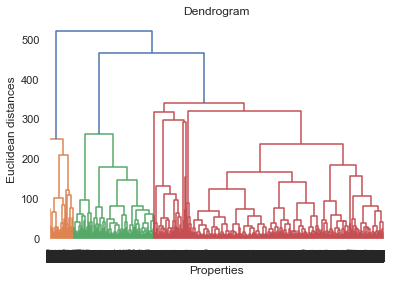

In [151]:
# return the hierarchical clustering using Ward Method encoded as a linkage matrix (ndarray)
# Plot the dendogram  - a method that tries to minimize the variance within each cluster.
dendrogram = sch.dendrogram(sch.linkage(PCA_array, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Properties')
plt.ylabel('Euclidean distances')
plt.show()

#### Fitting the Algorithim

In [152]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

In [153]:
# Apply model to our data set
y_hc=hc.fit_predict(PCA_PR_2000_hier)

In [154]:
#view the predictions
y_hc

array([0, 0, 2, ..., 1, 1, 3], dtype=int64)

In [155]:
# View the length of the array
len(y_hc)

49638

In [156]:
# Create dataframe from array
PR_2000_hier = pd.DataFrame(y_hc, columns = ['HierC_PCA_Cluster'])
PR_2000_hier.shape

(49638, 1)

In [157]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_2000_stan
# Predictions: y_hc

df_hierc_segm = pd.concat([df_kmeans_segm2, PR_2000_hier], axis = 1)

# Add the names of the clusters
df_hierc_segm['Cluster_hc'] = df_hierc_segm['HierC_PCA_Cluster'].map({0:'First'
                                                                      ,1:'Second'
                                                                      ,2:'Third'
                                                                      ,3:'Fourth'})

df_hierc_segm.shape

(49638, 39)

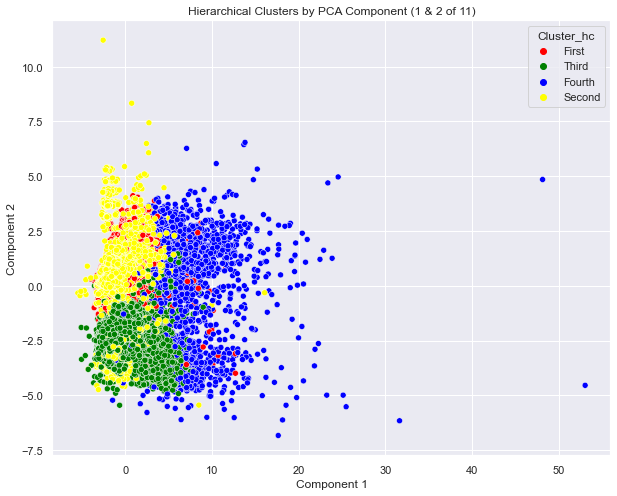

In [158]:
# Visualize the Clusters ( Using 2 components)

# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Hierarchical Clusters by PCA Component (1 & 2 of 11)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = df_hierc_segm['Component_1']
y_axis = df_hierc_segm['Component_2']

# Set a color dictionary
color_dict2= dict({'First':'red',
                  'Second':'yellow',
                  'Third': 'green',
                  'Fourth': 'blue'})

# Plot the scatterplot of clusters
sns.scatterplot(x = x_axis, y = y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

In [159]:
H_cluster = linkage(PCA_PR_2000_hier,'ward')
H_cluster

array([[2.25430000e+04, 2.25500000e+04, 0.00000000e+00, 2.00000000e+00],
       [4.27450000e+04, 4.27480000e+04, 0.00000000e+00, 2.00000000e+00],
       [3.95280000e+04, 3.95290000e+04, 0.00000000e+00, 2.00000000e+00],
       ...,
       [9.92700000e+04, 9.92710000e+04, 3.39557017e+02, 3.40170000e+04],
       [9.92670000e+04, 9.92720000e+04, 4.67085911e+02, 4.59820000e+04],
       [9.92660000e+04, 9.92730000e+04, 5.20678161e+02, 4.96380000e+04]])

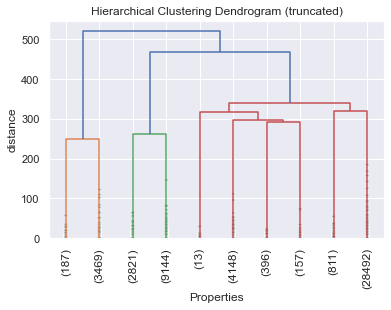

In [160]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Properties')
plt.ylabel('distance')
sch.dendrogram(
    H_cluster, 
    truncate_mode='lastp',  # show only the last p merged clusters
    p=10,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [161]:
# Separate out the Clusters
hierc_pca_cluster_1 = df_hierc_segm[df_hierc_segm['Cluster_hc'] == 'First']
hierc_pca_cluster_2 = df_hierc_segm[df_hierc_segm['Cluster_hc'] == 'Second']
hierc_pca_cluster_3 = df_hierc_segm[df_hierc_segm['Cluster_hc'] == 'Third']
hierc_pca_cluster_4 = df_hierc_segm[df_hierc_segm['Cluster_hc'] == 'Fourth']

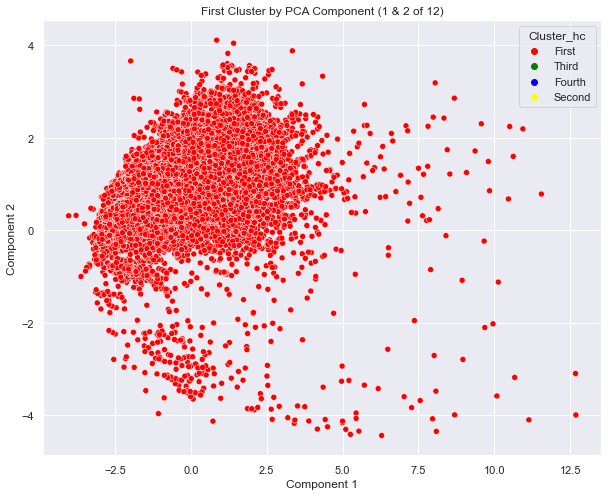

In [162]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = hierc_pca_cluster_1['Component_1']
y_axis = hierc_pca_cluster_1['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

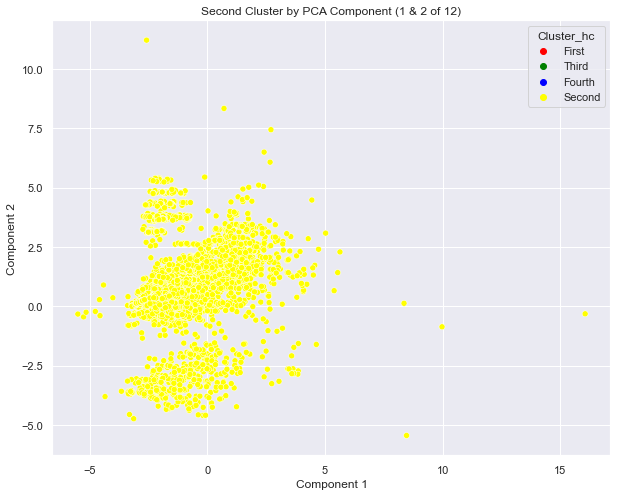

In [163]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = hierc_pca_cluster_2['Component_1']
y_axis = hierc_pca_cluster_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

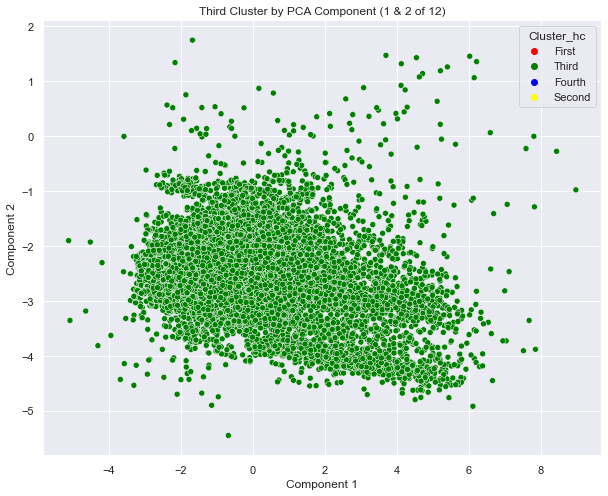

In [164]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = hierc_pca_cluster_3['Component_1']
y_axis = hierc_pca_cluster_3['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

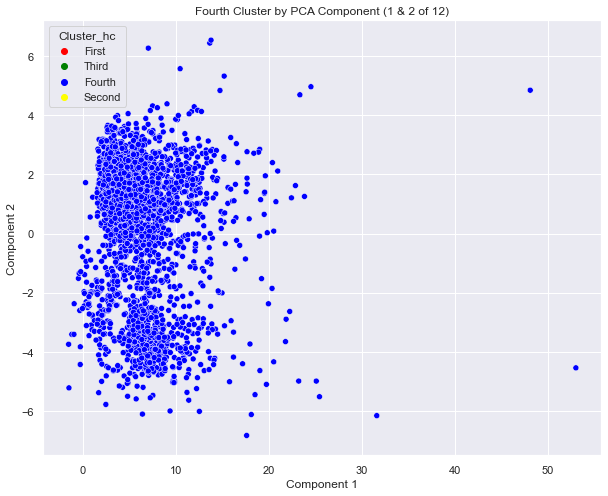

In [165]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = hierc_pca_cluster_4['Component_1']
y_axis = hierc_pca_cluster_4['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = df_hierc_segm['Cluster_hc'], palette = color_dict2)

plt.show()

#### Performance Evaluation


##### The Silhouette Coefficient

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters. 

        - Close to -1:incorrect clustering
        - Close to 0: overlapping clusters.
        - Close to 1:highly dense clustering
        


In [166]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels3 = y_hc
silhouette1_3 = metrics.silhouette_score(PCA_PR_2000_hier, labels3, metric='euclidean')
silhouette1_3

0.24598182450553943

##### Calinski-Harabasz Index

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.


In [167]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski1_3 = metrics.calinski_harabasz_score(PCA_PR_2000_hier, labels3)
Calinski1_3

6964.999812281292

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels.
A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [168]:
# Perform Davies-Bouldin Index Performance Evalution on the kmeans-pca model
Davies1_3 = davies_bouldin_score(PCA_PR_2000_hier, labels3)
Davies1_3

1.6256963019031572

#### Compare the Different Methods

In [169]:
# Create a dataframe with the 3 performance evaluation methods
Metric3 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval3 = [silhouette1_3,Calinski1_3,Davies1_3]
Performance_Evaluation3 = pd.DataFrame(Eval3,index=Metric3,columns=['Hierarchical_Agglomerative_Ward_PCA'])
Performance_Evaluation3

Hierarchical_Agglomerative_Ward_PCA
Silhouette                                    0.245982
Calinski-Harabasz                          6964.999812
Davies-Bouldin                                1.625696

In [170]:
# Concatenate K-Means and Hierc
Performance_Evaluation_Compare = pd.concat([Performance_Evaluation2, Performance_Evaluation3], axis = 1)
Performance_Evaluation_Compare

K-Means_PCA  Hierarchical_Agglomerative_Ward_PCA
Silhouette            0.204100                             0.245982
Calinski-Harabasz  7357.440100                          6964.999812
Davies-Bouldin        1.127714                             1.625696

In [171]:
#### Write to a file 
Performance_Evaluation3.to_csv(r'C:/Users/edkcb/Documents/MSDS696_Practicum2/Data/Performance_Eval3.csv')

## DBSCAN Clustering

https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/

#### Run 1:  eps = 0.5 and min_samples = 25

In [172]:
# cluster the data into five clusters
# Choose min_samples = 25  (12 dimensions x 2 + 1)
dbscan = DBSCAN(algorithm = 'auto', eps=0.5, metric = 'euclidean' , min_samples = 25, n_jobs = None, p = None)
clusters = dbscan.fit_predict(PCA_PR_2000)

In [173]:
# View the cluster assignments
clusters

array([-1, -1, -1, ..., 18, 18, -1], dtype=int64)

In [174]:
# Create dataframe from array
PR_2000_dbscan = pd.DataFrame(clusters, columns = ['DBSCAN_PCA_Cluster'])
PR_2000_dbscan.shape

(49638, 1)

In [175]:
PR_2000_dbscan['DBSCAN_PCA_Cluster'].value_counts()

-1     39242
 0      7906
 18      360
 30      257
 28      208
 37      172
 2       105
 14       96
 5        68
 29       62
 34       58
 11       52
 15       49
 27       47
 24       45
 20       44
 22       42
 6        41
 12       37
 1        36
 3        36
 43       36
 10       35
 31       35
 25       34
 19       33
 41       33
 8        33
 33       31
 21       30
 39       30
 42       28
 36       28
 38       27
 9        27
 13       26
 16       26
 17       25
 32       25
 40       25
 35       25
 7        25
 4        23
 23       22
 26       13
Name: DBSCAN_PCA_Cluster, dtype: int64

Text(0, 0.5, 'Component 2')

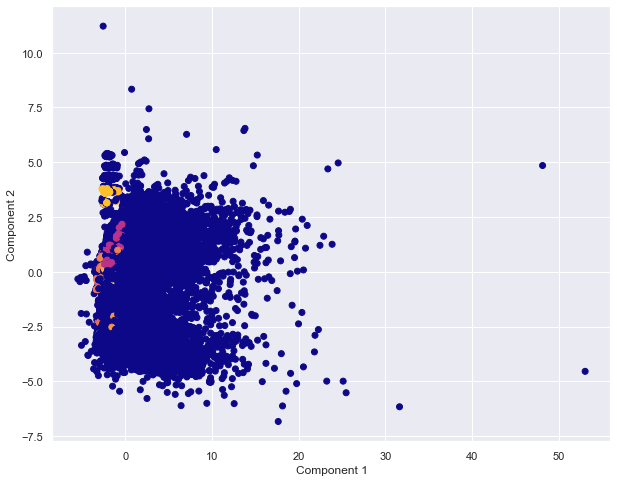

In [176]:
# plot the cluster assignments
# Set the figure size and Labels
plt.figure(figsize=(10, 8))

plt.scatter(PCA_PR_2000[0], PCA_PR_2000[1], c=clusters, cmap="plasma")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [177]:
# Find the nearest neighbors for the K-nearest graph (tuning)
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(PCA_PR_2000)
distances, indices = nbrs.kneighbors(PCA_PR_2000)

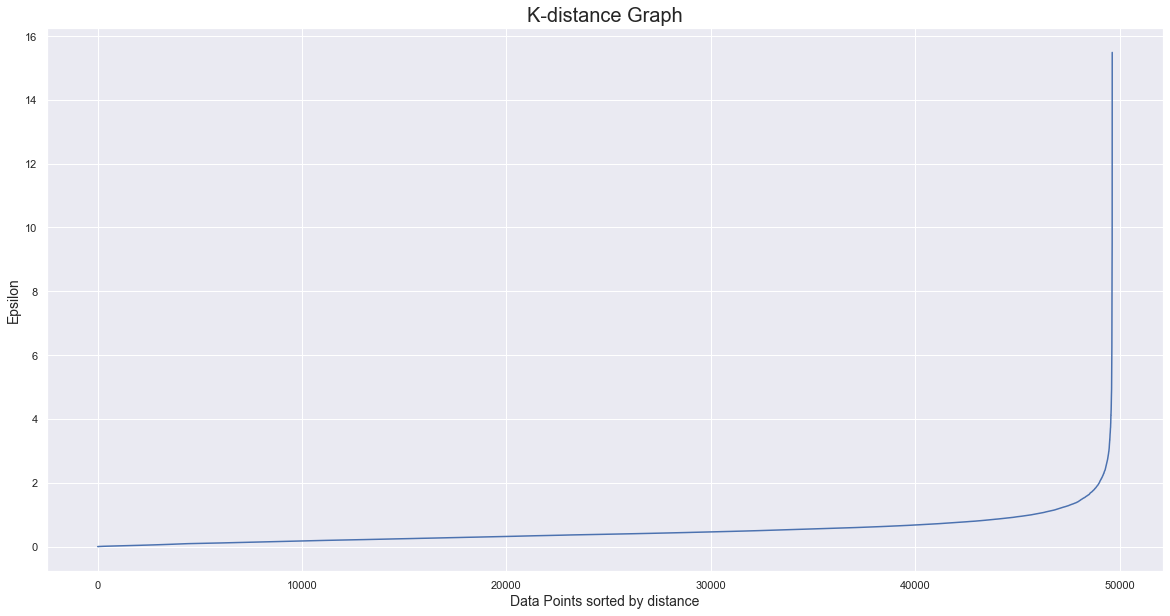

In [178]:
# Plotting K-distance Graph - epsilon should be at the point of maximum curviture
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()


#### Run 2: eps = 2, min_samples = 25

In [179]:
# cluster the data into five clusters
dbscan2 = DBSCAN(algorithm = 'auto', eps=2, metric = 'euclidean' , min_samples = 25, n_jobs = None, p = None)
clusters2 = dbscan2.fit_predict(PCA_PR_2000)

In [180]:
clusters2

array([ 0,  0,  0, ...,  0,  0, -1], dtype=int64)

In [181]:
# Create dataframe from array
PR_2000_dbscan = pd.DataFrame(clusters2, columns = ['DBSCAN_PCA_Cluster_2'])
PR_2000_dbscan.shape

(49638, 1)

In [182]:
PR_2000_dbscan['DBSCAN_PCA_Cluster_2'].value_counts()

 0    46851
-1     1828
 1      563
 4      166
 5       85
 3       78
 6       39
 2       28
Name: DBSCAN_PCA_Cluster_2, dtype: int64

Text(0, 0.5, 'Component 2')

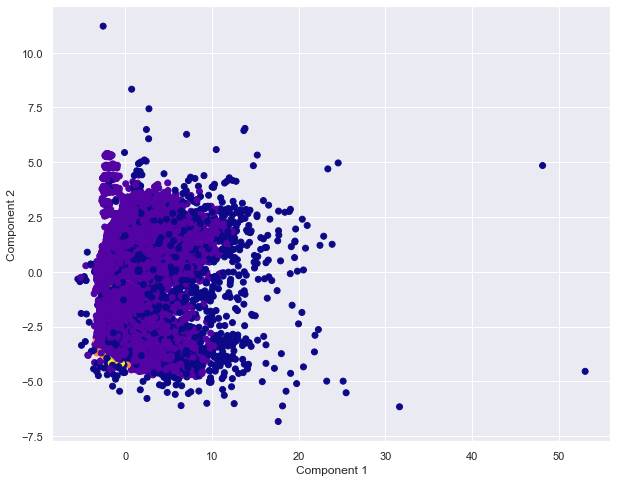

In [183]:
# plot the cluster assignments
# Set the figure size and Labels
plt.figure(figsize=(10, 8))

plt.scatter(PCA_PR_2000[0], PCA_PR_2000[1], c=clusters2, cmap="plasma")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

In [184]:
PR_2000_dbscan.head()

DBSCAN_PCA_Cluster_2
0                     0
1                     0
2                     0
3                     0
4                     0

In [185]:
# Create a new dataframe containing original features and the components
# Original Data: df_PR_2000_stan
# Predictions: y_hc

df_dbscan_segm = pd.concat([df_hierc_segm, PR_2000_dbscan], axis = 1)

# Add the names of the clusters
df_dbscan_segm['Cluster_db'] = df_dbscan_segm['DBSCAN_PCA_Cluster_2'].map({-1:'First'
                                                                      ,0:'Second'
                                                                      ,1:'Third'
                                                                      ,2:'Fourth'
                                                                      ,3:'Fifth'
                                                                      ,4:'Sixth'
                                                                      ,5:'Seventh'
                                                                      ,6:'Eighth'})

df_dbscan_segm.shape

(49638, 41)

In [186]:
# Separate out the Clusters
dbscan_pca_cluster_1 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'First']
dbscan_pca_cluster_2 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Second']
dbscan_pca_cluster_3 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Third']
dbscan_pca_cluster_4 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Fourth']
dbscan_pca_cluster_5=  df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Fifth']
dbscan_pca_cluster_6 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Sixth']
dbscan_pca_cluster_7 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Seventh']
dbscan_pca_cluster_8 = df_dbscan_segm[df_dbscan_segm['Cluster_db'] == 'Eighth']

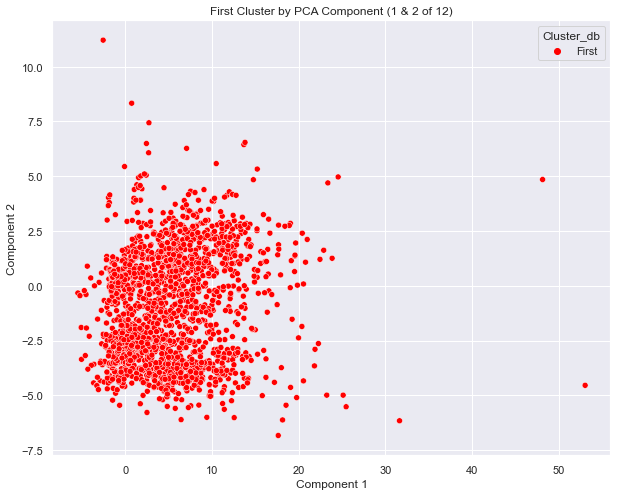

In [187]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('First Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_1['Component_1']
y_axis = dbscan_pca_cluster_1['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_1['Cluster_db'], palette = color_dict)

plt.show()

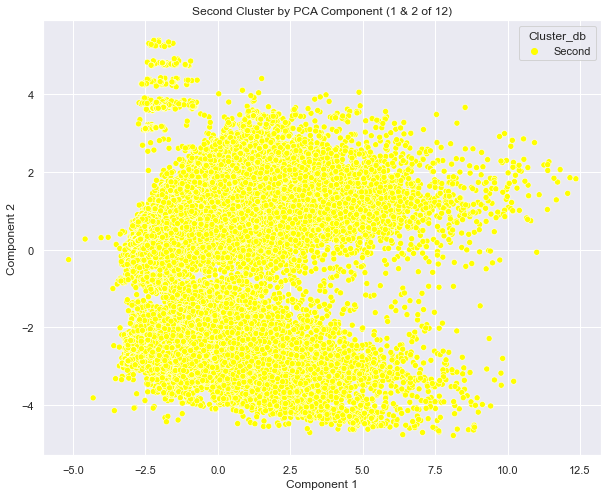

In [188]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Second Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_2['Component_1']
y_axis = dbscan_pca_cluster_2['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_2['Cluster_db'], palette = color_dict)

plt.show()

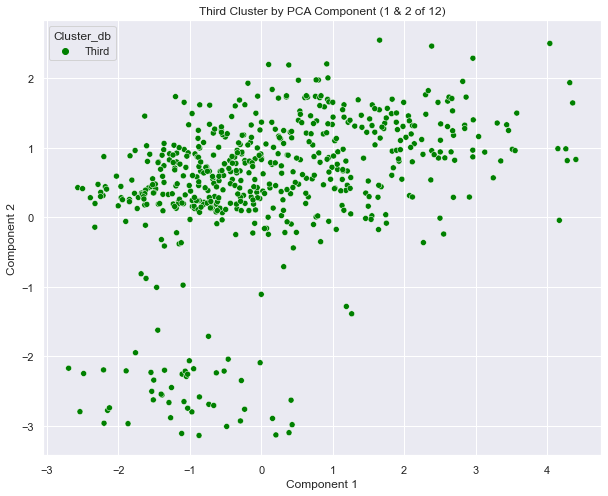

In [189]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Third Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_3['Component_1']
y_axis = dbscan_pca_cluster_3['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_3['Cluster_db'], palette = color_dict)

plt.show()

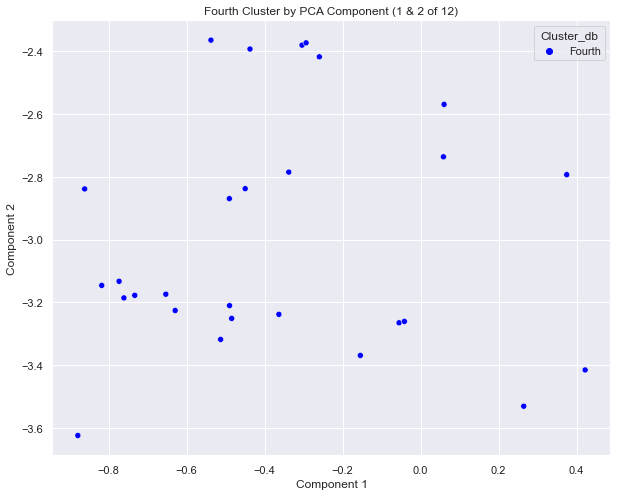

In [190]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fourth Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_4['Component_1']
y_axis = dbscan_pca_cluster_4['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_4['Cluster_db'], palette = color_dict)

plt.show()

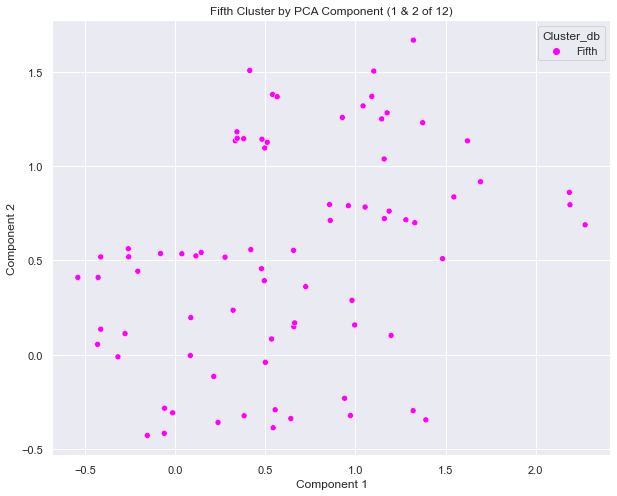

In [191]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Fifth Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_5['Component_1']
y_axis = dbscan_pca_cluster_5['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_5['Cluster_db'], palette = color_dict)

plt.show()

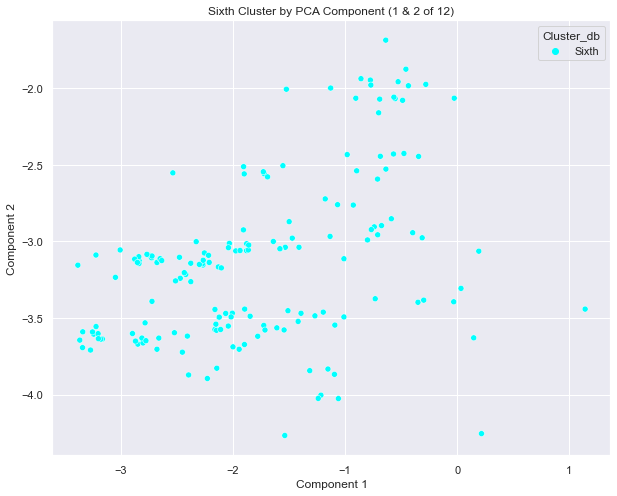

In [192]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Sixth Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_6['Component_1']
y_axis = dbscan_pca_cluster_6['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_6['Cluster_db'], palette = color_dict)

plt.show()

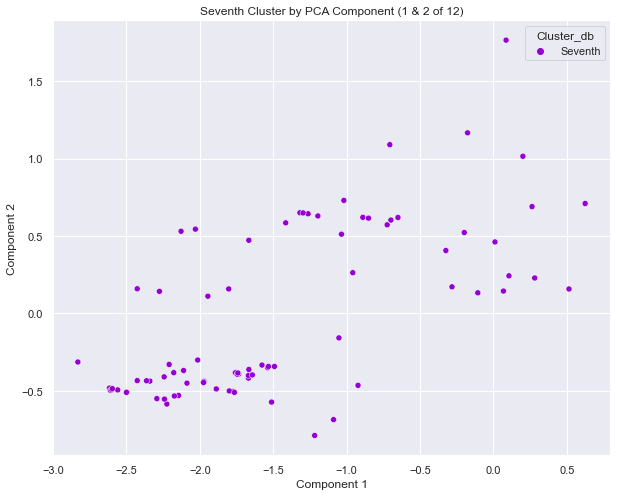

In [193]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Seventh Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_7['Component_1']
y_axis = dbscan_pca_cluster_7['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_7['Cluster_db'], palette = color_dict)

plt.show()

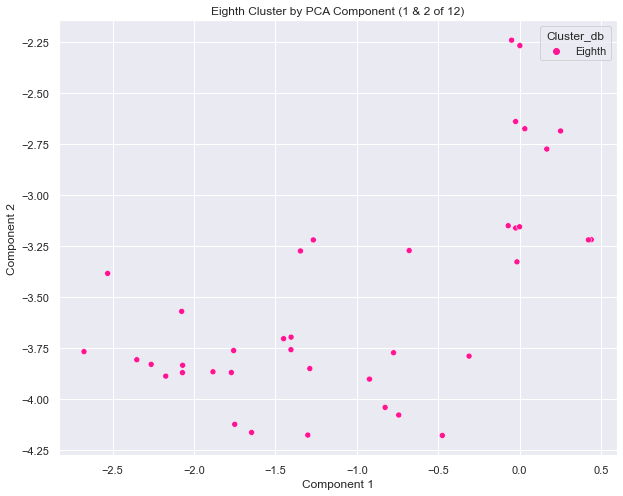

In [194]:
# View the Clusters Individually by first two components
# Set the figure size and Labels
plt.figure(figsize=(10, 8))
plt.title('Eighth Cluster by PCA Component (1 & 2 of 12)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')

# Set the Axis
x_axis = dbscan_pca_cluster_8['Component_1']
y_axis = dbscan_pca_cluster_8['Component_2']

# Plot the scatterplot of clusters
sns.scatterplot(x= x_axis, y= y_axis, hue = dbscan_pca_cluster_8['Cluster_db'], palette = color_dict)

plt.show()

#### Performance Evaluation


##### The Silhouette Coefficient

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Silhouette Coefficient score identifies a model with better defined clusters. 

        - Close to -1:incorrect clustering
        - Close to 0: overlapping clusters.
        - Close to 1:highly dense clustering
        


In [195]:
# Perform Silhouette Coefficent Performance Evalution on the kmeans-pca model
labels4 = clusters2 
silhouette1_4 = metrics.silhouette_score(PCA_PR_2000, labels4, metric='euclidean')
silhouette1_4

0.3653497160197927

##### Calinski-Harabasz Index

I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels. A higher Calinski-Harabasz score identifies a model with better defined clusters.


In [196]:
# Perform Calinski-Harabasz Index Performance Evalution on the kmeans-pca model
Calinski1_4 = metrics.calinski_harabasz_score(PCA_PR_2000, labels4)
Calinski1_4

1156.6773468373717

##### Davies-Bouldin Index
I do not have ground truth labels (are not known), and this method can be used for clustering without ground truth labels.
A lower Davies-Bouldin index identifies a model with better separation between the clusters

In [197]:
# Perform Davies-Bouldin Index Performance Evalution  
# (the lower values the better clustering performance)
Davies1_4 = davies_bouldin_score(PCA_PR_2000, labels4)
Davies1_4

1.4790545908689816

#### Compare the Different Methods

In [198]:
# Create a dataframe with the 3 performance evaluation methods
Metric4 = ['Silhouette','Calinski-Harabasz','Davies-Bouldin']
Eval4 = [silhouette1_4,Calinski1_4,Davies1_4]
Performance_Evaluation4 = pd.DataFrame(Eval4,index=Metric4,columns=['DBSCAN_PCA'])
Performance_Evaluation4

DBSCAN_PCA
Silhouette            0.365350
Calinski-Harabasz  1156.677347
Davies-Bouldin        1.479055

In [199]:
# Concatenate K-Means and Hierc
Performance_Evaluation_Compare2 = pd.concat([Performance_Evaluation_Compare, Performance_Evaluation4], axis = 1)
Performance_Evaluation_Compare2

K-Means_PCA  Hierarchical_Agglomerative_Ward_PCA  \
Silhouette            0.204100                             0.245982   
Calinski-Harabasz  7357.440100                          6964.999812   
Davies-Bouldin        1.127714                             1.625696   

                    DBSCAN_PCA  
Silhouette            0.365350  
Calinski-Harabasz  1156.677347  
Davies-Bouldin        1.479055

 ## Chosing a Clustering Method:
    
 The performance metrics evaluate the comparative performance of models against each other, because we are doing unsupervised clustering and do not have a target variable.
 
     Silhouette:  Closer to 1 the better
         - Best Method:  DBSCAN_PCA 
          
     Calinski-Harabasz:  The larger the score the better
         - Best Method: K-Means_PCA
         
     Davies-Bouldin:  The lower the score the better
         - Best MEthod:  K-Means_PCA
         
The DBSCAN and the K-Means Clustering Algorithims both identified 8 Clusters.  The K-Means Algorithm has the best performance score for for 2 of the 3 methods used, so I am going to choose that method to continue my Analysis and to peform some further clustering analysis based on specific features.

In [200]:
# Create Copy to get index
df_PR_2000_rev = df_PR_2000.copy()

# Create an index Column
df_PR_2000_rev.reset_index(inplace=True)
df_PR_2000_rev.head()

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0     14           21.0              0.0              0.0           229.0   
1     29            8.0              1.0           1007.0           499.0   
2     34            1.0              1.0            600.0           282.0   
3     35            5.0              1.0            786.0           961.0   
4     36            8.0              1.0            576.0           509.0   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                         0.0                           0.0       1848.0   
1                      1152.0                         186.0       2649.0   
2                         0.0                           0.0       2414.0   
3                         0.0                        1839.0       4345.0   
4                         0.0                        1776.0       2153.0   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0          1.0             2.0              2.0      2010.0             0.0   
1          2.0             3.0              3.0      2017.0             0.0   
2          1.0             3.0              2.0      2000.0             0.0   
3          2.0             3.0              3.0      2006.0             0.0   
4          2.0             3.0              3.0      2000.0             0.0   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         1.000000      246222.0         17600.0          4.0             0.0   
1         1.880005      528012.0         37750.0          7.0             0.0   
2         2.280005      394601.0         28210.0          1.0        100000.0   
3         2.389991      646822.0         46250.0          1.0         55000.0   
4         2.400000      411464.0         29420.0          3.0             0.0   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0        218000.0               0.0               0.0       1.0          3.0   
1        465000.0            7300.0          140000.0       1.0          3.0   
2        100000.0          100000.0          100000.0       1.0          3.0   
3         55000.0           55000.0           55000.0       1.0          4.0   
4         69000.0           69000.0               0.0       1.0          4.0   

   Walkout_Basement  Condition_ord  
0               0.0            3.0  
1               1.0            3.0  
2               0.0            3.0  
3               0.0            3.0  
4               1.0            3.0

In [201]:
# Create an index Column
df_PR_2000_rev.reset_index(inplace=True)
df_PR_2000_rev.rename(columns = {'index':'orig_index_#'}, inplace = True)
df_PR_2000_rev.head()

level_0  orig_index_#  Built_As_code  No_of_Fireplace  Total_Garage_SF  \
0        0            14           21.0              0.0              0.0   
1        1            29            8.0              1.0           1007.0   
2        2            34            1.0              1.0            600.0   
3        3            35            5.0              1.0            786.0   
4        4            36            8.0              1.0            576.0   

   Total_Porch_SF  Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  \
0           229.0                         0.0                           0.0   
1           499.0                      1152.0                         186.0   
2           282.0                         0.0                           0.0   
3           961.0                         0.0                        1839.0   
4           509.0                         0.0                        1776.0   

   Built_as_SF  No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  \
0       1848.0          1.0             2.0              2.0      2010.0   
1       2649.0          2.0             3.0              3.0      2017.0   
2       2414.0          1.0             3.0              2.0      2000.0   
3       4345.0          2.0             3.0              3.0      2006.0   
4       2153.0          2.0             3.0              3.0      2000.0   

   Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  \
0             0.0         1.000000      246222.0         17600.0          4.0   
1             0.0         1.880005      528012.0         37750.0          7.0   
2             0.0         2.280005      394601.0         28210.0          1.0   
3             0.0         2.389991      646822.0         46250.0          1.0   
4             0.0         2.400000      411464.0         29420.0          3.0   

   Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  \
0             0.0        218000.0               0.0               0.0   
1             0.0        465000.0            7300.0          140000.0   
2        100000.0        100000.0          100000.0          100000.0   
3         55000.0         55000.0           55000.0           55000.0   
4             0.0         69000.0           69000.0               0.0   

   Complete  Quality_ord  Walkout_Basement  Condition_ord  
0       1.0          3.0               0.0            3.0  
1       1.0          3.0               1.0            3.0  
2       1.0          3.0               0.0            3.0  
3       1.0          4.0               0.0            3.0  
4       1.0          4.0               1.0            3.0

In [202]:
df_PR_2000_rev.reset_index(inplace=True)
df_PR_2000_rev.head()

index  level_0  orig_index_#  Built_As_code  No_of_Fireplace  \
0      0        0            14           21.0              0.0   
1      1        1            29            8.0              1.0   
2      2        2            34            1.0              1.0   
3      3        3            35            5.0              1.0   
4      4        4            36            8.0              1.0   

   Total_Garage_SF  Total_Porch_SF  Total_Finished_Basement_SF  \
0              0.0           229.0                         0.0   
1           1007.0           499.0                      1152.0   
2            600.0           282.0                         0.0   
3            786.0           961.0                         0.0   
4            576.0           509.0                         0.0   

   Total_Unfinished_Basement_SF  Built_as_SF  No_of_Story  No_of_Bedrooms  \
0                           0.0       1848.0          1.0             2.0   
1                         186.0       2649.0          2.0             3.0   
2                           0.0       2414.0          1.0             3.0   
3                        1839.0       4345.0          2.0             3.0   
4                        1776.0       2153.0          2.0             3.0   

   No_of_Bathrooms  Built_Year  Remodeled_Year  Total_Net_Acres  Actual_Value  \
0              2.0      2010.0             0.0         1.000000      246222.0   
1              3.0      2017.0             0.0         1.880005      528012.0   
2              2.0      2000.0             0.0         2.280005      394601.0   
3              3.0      2006.0             0.0         2.389991      646822.0   
4              3.0      2000.0             0.0         2.400000      411464.0   

   Assessed_Value  No_of_Sales  Sale_Price_Min  Sale_Price_Max  \
0         17600.0          4.0             0.0        218000.0   
1         37750.0          7.0             0.0        465000.0   
2         28210.0          1.0        100000.0        100000.0   
3         46250.0          1.0         55000.0         55000.0   
4         29420.0          3.0             0.0         69000.0   

   Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0               0.0               0.0       1.0          3.0   
1            7300.0          140000.0       1.0          3.0   
2          100000.0          100000.0       1.0          3.0   
3           55000.0           55000.0       1.0          4.0   
4           69000.0               0.0       1.0          4.0   

   Walkout_Basement  Condition_ord  
0               0.0            3.0  
1               1.0            3.0  
2               0.0            3.0  
3               0.0            3.0  
4               1.0            3.0

In [203]:
df_PR_2000_rev.shape

(49638, 27)

#### CLUSTER 1

The first cluster of properties - 

    - 10,748 Properties
    - 

In [204]:
kmeans_pca_cluster1_2.shape

(10748, 37)

In [205]:
# Get the Index of the Cluster records
kmeans1 = kmeans_pca_cluster1_2.copy()
kmeans1.reset_index(inplace=True)

In [206]:
# Create an array of index values
kmeans1_index = kmeans1['index']

In [207]:
# Identify the cluster 6 records in the primary df
df_Cluster1 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans1_index)]
df_Cluster1.shape

(10748, 27)

In [208]:
# View the details of the K-Means First Cluster
df_Cluster1.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count  10748.000000  10748.000000   10748.000000   10748.000000   
mean   23104.357741  23104.357741   73191.580294       7.963714   
std    12614.488834  12614.488834   17221.302907       0.903342   
min        3.000000      3.000000      35.000000       1.000000   
25%    12713.500000  12713.500000   64375.500000       8.000000   
50%    23601.500000  23601.500000   75368.500000       8.000000   
75%    34404.750000  34404.750000   86294.750000       8.000000   
max    49631.000000  49631.000000  101800.000000      25.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count     10748.000000     10748.000000    10748.000000   
mean          1.242464       728.399795      562.589226   
std           0.519118       126.308948      348.423195   
min           0.000000         0.000000        0.000000   
25%           1.000000       657.000000      325.000000   
50%           1.000000       703.000000      486.000000   
75%           1.000000       765.000000      726.000000   
max           5.000000      2184.000000     4023.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF   Built_as_SF  \
count                10748.000000                  10748.000000  10748.000000   
mean                   562.788984                   1096.711481   3425.994418   
std                    682.628362                    733.036735    491.483391   
min                      0.000000                      0.000000   2123.000000   
25%                      0.000000                    355.750000   3083.000000   
50%                      0.000000                   1273.000000   3329.000000   
75%                   1220.250000                   1654.000000   3664.000000   
max                   2643.000000                   3777.000000   5880.000000   

        No_of_Story  No_of_Bedrooms  No_of_Bathrooms    Built_Year  \
count  10748.000000    10748.000000     10748.000000  10748.000000   
mean       1.993394        4.104485         3.931662   2007.389003   
std        0.107645        0.627942         0.633283      5.861944   
min        0.000000        1.000000         1.000000   2000.000000   
25%        2.000000        4.000000         4.000000   2002.000000   
50%        2.000000        4.000000         4.000000   2006.000000   
75%        2.000000        4.000000         4.000000   2013.000000   
max        4.000000        8.000000         7.000000   2020.000000   

       Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  \
count    10748.000000     10748.000000  1.074800e+04    10748.000000   
mean        43.651935         0.382342  5.511946e+05    39410.451247   
std        293.258692         0.909506  1.191057e+05     8516.057306   
min          0.000000         0.095000  3.378790e+05    24160.000000   
25%          0.000000         0.175000  4.665602e+05    33360.000000   
50%          0.000000         0.214000  5.187775e+05    37090.000000   
75%          0.000000         0.293000  6.039362e+05    43180.000000   
max       2019.000000        35.003000  1.150994e+06    82300.000000   

        No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count  10748.000000    1.074800e+04    1.074800e+04      1.074800e+04   
mean       3.797865    2.430442e+05    2.613480e+06      1.986025e+06   
std        2.524120    2.787915e+05    3.311745e+06      2.858286e+06   
min        1.000000    0.000000e+00    0.000000e+00      0.000000e+00   
25%        2.000000    0.000000e+00    5.864335e+05      3.278000e+05   
50%        3.000000    2.000000e+04    8.750000e+05      5.897000e+05   
75%        5.000000    4.710000e+05    3.479000e+06      2.584350e+06   
max       26.000000    2.497500e+06    3.900000e+07      2.000000e+07   

       Sale_Price_toMax  Complete   Quality_ord  Walkout_Basement  \
count      1.074800e+04   10748.0  10748.000000      10748.000000   
mean       4.873019e+05       1.0      3.858485          0.373744   
std

In [209]:
kmeans_pca_cluster1_2.shape

(10748, 37)

In [210]:
df_Cluster1['Built_As_code'].unique()

array([ 5.,  8.,  1.,  7.,  2., 21., 25.,  9.])

#### CLUSTER 2

The second cluster of properties - 

    - 4126 Properties
    - 

In [211]:
kmeans_pca_cluster2_2.shape

(4126, 37)

In [212]:
# Get the Index of the Cluster records
kmeans2 = kmeans_pca_cluster2_2.copy()
kmeans2.reset_index(inplace=True)

In [213]:
# Create an array of index values
kmeans2_index = kmeans2['index']

In [214]:
# Identify the cluster 6 records in the primary df
df_Cluster2 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans2_index)]
df_Cluster2.shape

(4126, 27)

In [215]:
# View the details of the K-Means First Cluster
df_Cluster2.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count   4126.000000   4126.000000    4126.000000    4126.000000   
mean   44999.892874  44999.892874   96772.146873       9.424140   
std     5611.869764   5611.869764    8507.592475       5.284896   
min       10.000000     10.000000     122.000000       1.000000   
25%    44137.750000  44137.750000   96202.750000       8.000000   
50%    46266.500000  46266.500000   98351.500000       8.000000   
75%    48003.500000  48003.500000  100115.500000       8.000000   
max    49636.000000  49636.000000  101813.000000      25.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count      4126.000000      4126.000000     4126.000000   
mean          0.526660       566.936258      299.450315   
std           0.510868       146.006740      200.992339   
min           0.000000         0.000000        0.000000   
25%           0.000000       453.000000      144.000000   
50%           1.000000       528.000000      265.000000   
75%           1.000000       677.000000      408.000000   
max           2.000000      2140.000000     2085.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
count                 4126.000000                   4126.000000  4126.000000   
mean                   144.145904                    882.448376  2613.915899   
std                    402.933287                    684.077334   647.194819   
min                      0.000000                      0.000000     1.000000   
25%                      0.000000                    131.500000  2135.000000   
50%                      0.000000                    953.000000  2508.000000   
75%                      0.000000                   1320.000000  2961.000000   
max                   2442.000000                   3420.000000  4750.000000   

       No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count  4126.000000     4126.000000      4126.000000  4126.000000   
mean      2.055502        3.660258         3.374316  2019.069801   
std       0.428186        0.823052         0.670121     1.349109   
min       0.000000        1.000000         1.000000  2003.000000   
25%       2.000000        3.000000         3.000000  2019.000000   
50%       2.000000        4.000000         3.000000  2019.000000   
75%       2.000000        4.000000         4.000000  2020.000000   
max      10.000000        7.000000         6.000000  2020.000000   

       Remodeled_Year  Total_Net_Acres   Actual_Value  Assessed_Value  \
count     4126.000000      4126.000000    4126.000000     4126.000000   
mean         1.956132         0.210703  414524.718371    29638.485216   
std         62.802214         1.216751   99616.961173     7122.597719   
min          0.000000         0.035000       0.000000        0.000000   
25%          0.000000         0.106000  344393.500000    24622.500000   
50%          0.000000         0.140000  389560.000000    27855.000000   
75%          0.000000         0.178000  461735.000000    33017.500000   
max       2020.000000        50.164000  874608.000000    62530.000000   

       No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count  4126.000000    4.126000e+03    4.126000e+03      4.126000e+03   
mean      2.107646    4.819791e+05    4.373286e+06      3.939577e+06   
std       1.097858    3.923592e+05    4.212168e+06      3.967805e+06   
min       1.000000    0.000000e+00    0.000000e+00      0.000000e+00   
25%       1.000000    4.050000e+05    6.674250e+05      5.650000e+05   
50%       2.000000    4.976900e+05    3.276000e+06      2.738900e+06   
75%       2.000000    6.050000e+05    7.320600e+06      6.403800e+06   
max      13.000000    4.393872e+06    3.900000e+07      2.000000e+07   

       Sale_Price_toMax  Complete  Quality_ord  Walkout_Basement  \
count      4.126000e+03    4126.0  4126.000000       4126.000000   
mean       5.676518e+05       1.0     3.102521          0.156810   
std        3.555963e+05       0.0

In [216]:
kmeans_pca_cluster2_2.shape

(4126, 37)

In [217]:
df_Cluster2['Built_As_code'].unique()

array([ 8., 21.,  1.,  7., 25.,  5.,  9.,  2.])

#### CLUSTER 3

The third cluster of properties - 

    - 19,810 Properties
    - 

In [218]:
kmeans_pca_cluster3_2.shape

(19810, 37)

In [219]:
# Get the Index of the Cluster records
kmeans3 = kmeans_pca_cluster3_2.copy()
kmeans3.reset_index(inplace=True)

In [220]:
# Create an array of index values
kmeans3_index = kmeans3['index']

In [221]:
# Identify the cluster 6 records in the primary df
df_Cluster3 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans3_index)]
df_Cluster3.shape

(19810, 27)

In [222]:
# View the details of the K-Means First Cluster
df_Cluster3.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count  19810.000000  19810.000000   19810.000000   19810.000000   
mean   20984.167491  20984.167491   71474.417920       8.046492   
std    12161.071936  12161.071936   15192.143811       1.289218   
min        0.000000      0.000000      14.000000       1.000000   
25%    11011.250000  11011.250000   62664.250000       8.000000   
50%    20153.500000  20153.500000   71887.500000       8.000000   
75%    30327.750000  30327.750000   82194.750000       8.000000   
max    49333.000000  49333.000000  101471.000000      25.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count     19810.000000     19810.000000    19810.000000   
mean          0.871530       535.812418      307.464967   
std           0.403806       122.633022      205.710044   
min           0.000000         0.000000        0.000000   
25%           1.000000       432.000000      152.000000   
50%           1.000000       498.000000      270.000000   
75%           1.000000       642.000000      417.000000   
max           3.000000      1584.000000     2493.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF   Built_as_SF  \
count                19810.000000                  19810.000000  19810.000000   
mean                   282.158708                    666.229177   2307.389349   
std                    436.619345                    498.896933    451.237364   
min                      0.000000                      0.000000    760.000000   
25%                      0.000000                    159.000000   1992.000000   
50%                      0.000000                    703.000000   2299.000000   
75%                    641.000000                   1100.000000   2648.000000   
max                   2055.000000                   2726.000000   4049.000000   

        No_of_Story  No_of_Bedrooms  No_of_Bathrooms    Built_Year  \
count  19810.000000    19810.000000     19810.000000  19810.000000   
mean       1.978950        3.452549         3.045558   2005.901918   
std        0.171735        0.606388         0.293134      5.517101   
min        1.000000        0.000000         0.000000   2000.000000   
25%        2.000000        3.000000         3.000000   2001.000000   
50%        2.000000        3.000000         3.000000   2004.000000   
75%        2.000000        4.000000         3.000000   2010.000000   
max        4.000000        6.000000         5.000000   2020.000000   

       Remodeled_Year  Total_Net_Acres   Actual_Value  Assessed_Value  \
count    19810.000000     19810.000000   19810.000000    19810.000000   
mean        32.940283         0.202214  368709.505300    26362.765775   
std        255.462818         0.923733   55022.780455     3934.147440   
min          0.000000         0.000000   33674.000000     2410.000000   
25%          0.000000         0.123000  330967.500000    23660.000000   
50%          0.000000         0.150000  367354.000000    26270.000000   
75%          0.000000         0.183000  404367.500000    28910.000000   
max       2020.000000        40.000000  642001.000000    45900.000000   

        No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count  19810.000000    19810.000000    1.981000e+04      1.981000e+04   
mean       4.297980   142865.592216    2.830205e+06      2.294121e+06   
std        2.673927   172794.145572    3.216773e+06      3.054598e+06   
min        1.000000        0.000000    0.000000e+00      0.000000e+00   
25%        3.000000        0.000000    4.556500e+05      2.740250e+05   
50%        4.000000        0.000000    1.452600e+06      8.100000e+05   
75%        5.000000   300700.000000    3.905000e+06      3.326000e+06   
max       28.000000   722000.000000    1.650000e+07      1.650000e+07   

       Sale_Price_toMax  Complete   Quality_ord  Walkout_Basement  \
count      1.981000e+04   19810.0  19810.000000      19810.000000   
mean       3.076642e+05       1.0      3.049924          0.1393

In [223]:
kmeans_pca_cluster3_2.shape

(19810, 37)

In [224]:
df_Cluster3['Built_As_code'].unique()

array([21.,  8.,  7.,  5.,  2., 10., 12., 22.,  1.,  9., 25.])

#### CLUSTER 4

The fourth cluster of properties - 

    - 3395 Properties
    - 

In [225]:
kmeans_pca_cluster4_2.shape

(3395, 37)

In [226]:
# Get the Index of the Cluster records
kmeans4 = kmeans_pca_cluster4_2.copy()
kmeans4.reset_index(inplace=True)

In [227]:
# Create an array of index values
kmeans4_index = kmeans4['index']

In [228]:
# Identify the cluster 6 records in the primary df
df_Cluster4 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans4_index)]
df_Cluster4.shape

(3395, 27)

In [229]:
# View the details of the K-Means First Cluster
df_Cluster4.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count   3395.000000   3395.000000    3395.000000    3395.000000   
mean   18065.624742  18065.624742   64205.845950       4.831222   
std    12673.874835  12673.874835   23389.325368       3.559507   
min        9.000000      9.000000     114.000000       1.000000   
25%     5859.500000   5859.500000   56557.500000       1.000000   
50%    18082.000000  18082.000000   69781.000000       8.000000   
75%    28045.000000  28045.000000   79881.500000       8.000000   
max    49637.000000  49637.000000  101816.000000      40.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count      3395.000000      3395.000000     3395.000000   
mean          2.258910      1213.405891     1674.301620   
std           1.061378       598.468527     1075.223572   
min           0.000000         0.000000        0.000000   
25%           1.000000       874.500000     1041.000000   
50%           2.000000      1060.000000     1422.000000   
75%           3.000000      1331.500000     1976.000000   
max           8.000000      7745.000000    13613.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF   Built_as_SF  \
count                 3395.000000                   3395.000000   3395.000000   
mean                  2111.600589                    684.710162   3934.205596   
std                    968.921799                    709.846448   1186.147299   
min                      0.000000                      0.000000    571.000000   
25%                   1704.000000                    265.000000   3108.500000   
50%                   2100.000000                    475.000000   3779.000000   
75%                   2549.000000                    843.000000   4510.000000   
max                  22450.000000                   6964.000000  16807.000000   

       No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count  3395.000000     3395.000000      3395.000000  3395.000000   
mean      1.547275        3.051993         3.889409  2007.384978   
std       0.500784        1.317134         1.313733     5.646632   
min       1.000000        0.000000         0.000000  2000.000000   
25%       1.000000        2.000000         3.000000  2003.000000   
50%       2.000000        3.000000         4.000000  2006.000000   
75%       2.000000        4.000000         5.000000  2010.000000   
max       3.000000        8.000000        18.000000  2020.000000   

       Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  \
count     3395.000000      3395.000000  3.395000e+03     3395.000000   
mean        85.444183         3.699906  1.030964e+06    73713.899853   
std        406.045129         8.217183  4.249997e+05    30387.531639   
min          0.000000         0.156000  2.955490e+05    21130.000000   
25%          0.000000         0.500000  7.908220e+05    56540.000000   
50%          0.000000         0.960000  9.370060e+05    67000.000000   
75%          0.000000         3.000000  1.135208e+06    81170.000000   
max       2020.000000        99.277000  7.560927e+06   540610.000000   

       No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count  3395.000000    3.395000e+03    3.395000e+03      3.395000e+03   
mean      4.890989    1.102074e+05    1.903929e+06      1.044460e+06   
std       2.495032    2.855916e+05    2.379717e+06      2.447333e+06   
min       1.000000    0.000000e+00    0.000000e+00      0.000000e+00   
25%       3.000000    0.000000e+00    8.212000e+05      4.500000e+04   
50%       4.000000    0.000000e+00    1.199000e+06      1.759000e+05   
75%       6.000000    1.080000e+05    1.860720e+06      5.895000e+05   
max      19.000000    5.925000e+06    2.000000e+07      2.000000e+07   

       Sale_Price_toMax  Complete  Quality_ord  Walkout_Basement  \
count      3.395000e+03    3395.0  3395.000000       3395.000000   
mean       8.341531e+05       1.0     5.148159          0.847717   
std        7.298770e+05       0.0

In [230]:
kmeans_pca_cluster4_2.shape

(3395, 37)

In [231]:
df_Cluster4['Built_As_code'].unique()

array([ 8.,  1.,  5., 25., 40.,  7.,  2.,  9.])

#### CLUSTER 5

The fifth cluster of properties - 

    - 11,021 Properties
    - 

In [232]:
kmeans_pca_cluster5_2.shape

(11021, 37)

In [233]:
# Get the Index of the Cluster records
kmeans5 = kmeans_pca_cluster5_2.copy()
kmeans5.reset_index(inplace=True)

In [234]:
# Create an array of index values
kmeans5_index = kmeans5['index']

In [235]:
# Identify the cluster 6 records in the primary df
df_Cluster5 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans5_index)]
df_Cluster5.shape

(11021, 27)

In [236]:
# View the details of the K-Means First Cluster
df_Cluster5.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count  11021.000000  11021.000000   11021.000000   11021.000000   
mean   27155.501134  27155.501134   75707.798657       1.031939   
std    15099.169646  15099.169646   23160.088805       0.458511   
min        2.000000      2.000000      34.000000       1.000000   
25%    14241.000000  14241.000000   65906.000000       1.000000   
50%    30046.000000  30046.000000   81909.000000       1.000000   
75%    40418.000000  40418.000000   92442.000000       1.000000   
max    49627.000000  49627.000000  101787.000000      21.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count     11021.000000     11021.000000    11021.000000   
mean          0.981944       619.146992      425.538427   
std           0.474524       191.138172      294.980972   
min           0.000000         0.000000        0.000000   
25%           1.000000       467.000000      225.000000   
50%           1.000000       621.000000      350.000000   
75%           1.000000       706.000000      552.000000   
max           4.000000      2481.000000     3115.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF   Built_as_SF  \
count                11021.000000                  11021.000000  11021.000000   
mean                   763.806097                   1085.343435   2120.026858   
std                    795.110280                    821.062765    445.968772   
min                      0.000000                      0.000000      0.000000   
25%                      0.000000                    397.000000   1801.000000   
50%                    682.000000                    892.000000   2133.000000   
75%                   1490.000000                   1793.000000   2397.000000   
max                   3050.000000                   4369.000000   4492.000000   

        No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count  11021.000000    11021.000000     11021.000000  11021.00000   
mean       1.002450        2.489659         2.351293   2010.53879   
std        0.059439        0.673254         0.528909      7.08447   
min        0.000000        0.000000         0.000000   2000.00000   
25%        1.000000        2.000000         2.000000   2004.00000   
50%        1.000000        3.000000         2.000000   2012.00000   
75%        1.000000        3.000000         3.000000   2017.00000   
max        2.000000        5.000000         4.084590   2021.00000   

       Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  \
count    11021.000000     11021.000000  1.102100e+04    11021.000000   
mean        21.751202         0.541163  4.512293e+05    32262.863624   
std        208.201159         1.953873  1.275529e+05     9120.083375   
min          0.000000         0.000000  0.000000e+00        0.000000   
25%          0.000000         0.149000  3.619450e+05    25880.000000   
50%          0.000000         0.184000  4.250870e+05    30390.000000   
75%          0.000000         0.260000  5.128800e+05    36670.000000   
max       2020.000000        44.572000  1.466135e+06   104830.000000   

        No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count  11021.000000    1.102100e+04    1.102100e+04      1.102100e+04   
mean       3.739578    2.191208e+05    3.155588e+06      2.456585e+06   
std        2.591911    2.804067e+05    3.890082e+06      3.419646e+06   
min        1.000000    0.000000e+00    0.000000e+00      0.000000e+00   
25%        2.000000    0.000000e+00    5.527000e+05      9.290000e+04   
50%        3.000000    0.000000e+00    1.365000e+06      7.694000e+05   
75%        5.000000    4.376000e+05    4.680000e+06      3.536000e+06   
max       29.000000    3.222000e+06    3.900000e+07      2.000000e+07   

       Sale_Price_toMax  Complete   Quality_ord  Walkout_Basement  \
count      1.102100e+04   11021.0  11021.000000      11021.000000   
mean       4.167351e+05       1.0      3.412757          0.338173   
std        2

In [237]:
df_Cluster5['Built_As_code'].unique()

array([ 1.,  2.,  8.,  7.,  5., 21., 13.])

#### CLUSTER 6

The sixth cluster of properties - 

    - 94 Properties
    - Built Year: 2017 to 2020 (never remodeled)
    - Built As:  1(Ranch 1 Story) and 8(2 Story)
    - Built As_SF:  1488 and 4239
    - All 100% Completed
    - # Times Sold between 1 and 2 times
    - Assessed Value between $0 and $82,880
    - Actual Value between $0 and $1,159,136.00

In [238]:
kmeans_pca_cluster6_2.shape

(94, 37)

In [239]:
# Get the Index of the Cluster records
kmeans6 = kmeans_pca_cluster6_2.copy()
kmeans6.reset_index(inplace=True)

In [240]:
# View the first few records in the Data Frame
kmeans6.head()

index  Built_As_code  No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
0  29434       0.462557         6.102417         2.148707        3.103976   
1  30183      -1.463466        -0.065264         0.066134       -0.469209   
2  30202      -1.463466        -0.065264         0.410147       -0.079158   
3  30203       0.462557        -0.065264         0.251087       -0.245763   
4  30204      -1.463466        -0.065264         1.871277       -0.288884   

   Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
0                    2.538955                     -0.466316     1.570404   
1                    2.232872                     -0.417579     0.322102   
2                    2.259543                     -0.331573     0.421426   
3                    0.909476                     -0.370276     1.401185   
4                    1.571174                     -0.333007    -0.244417   

   No_of_Story  No_of_Bedrooms  No_of_Bathrooms  Built_Year  Remodeled_Year  \
0     0.563923       -1.505296         1.020516    1.224062       -0.130005   
1    -1.567502       -0.402418         1.020516    1.660208       -0.130005   
2    -1.567502       -0.402418        -0.204429    1.514826       -0.130005   
3     0.563923        0.700460         1.020516    1.514826       -0.130005   
4    -1.567502       -0.402418        -1.429374    1.514826       -0.130005   

   Total_Net_Acres  Actual_Value  Assessed_Value  No_of_Sales  Sale_Price_Min  \
0         1.431781      3.097746        3.097855    -1.127208       12.719012   
1        -0.124667      0.407687        0.407693    -1.127208       10.452125   
2        -0.080512      0.722032        0.721905    -1.127208       10.452125   
3        -0.094596      0.401278        0.401345    -1.127208       10.452125   
4         0.032539      0.426726        0.426736    -1.127208       10.452125   

   Sale_Price_Max  Sale_Price_toMin  Sale_Price_toMax  Complete  Quality_ord  \
0        0.682788          0.835503         11.329143  0.016185     3.534636   
1        0.448764          0.593618          9.236078  0.016185    -0.633965   
2        0.448764          0.593618          9.236078  0.016185     0.755568   
3        0.448764          0.593618          9.236078  0.016185    -0.633965   
4        0.448764          0.593618          9.236078  0.016185    -0.633965   

   Walkout_Basement  Condition_ord  Component_1  Component_2  Component_3  \
0          1.580927      -0.397782     9.974536    -0.867254     9.863833   
1         -0.632540       2.489559     1.588231    -1.562101     9.827584   
2         -0.632540       2.489559     2.342476    -2.133314     9.704948   
3         -0.632540       2.489559     1.636818     1.468940     9.818884   
4         -0.632540       2.489559     1.375764    -2.622420     9.653693   

   Component_4  Component_5  Component_6  Component_7  Component_8  \
0     4.780532     9.929954     6.032539    -1.646835     0.802261   
1     4.949881     7.885224     3.705338    -1.569200     0.046152   
2     4.962429     7.811787     3.704641    -1.583244     0.017485   
3     4.699914     7.889094     3.591531    -1.218366    -0.094432   
4     5.096473     7.645781     3.736126    -1.225707    -0.161427   

   Component_9  Component_10  Component_11  Kmeans_PCA_Cluster Cluster  
0    -3.748037      0.771709     -0.160452                   5   Sixth  
1    -1.885521      0.660864      1.732643                   5   Sixth  
2    -1.975792      0.820121      1.723336                   5   Sixth  
3    -2.399933      0.297485      1.646564                   5   Sixth  
4    -2.455646      0.789666      1.779851                   5   Sixth

In [241]:
kmeans6_index = kmeans6['index']
kmeans6_index

0     29434
1     30183
2     30202
3     30203
4     30204
5     30205
6     36179
7     36181
8     36183
9     36189
10    43592
11    43603
12    43616
13    43618
14    44013
15    45390
16    45391
17    45392
18    45393
19    45394
20    46261
21    46265
22    46269
23    46418
24    46419
25    46445
26    46454
27    46460
28    46467
29    47110
30    47114
31    47138
32    47726
33    47727
34    47728
35    47738
36    47768
37    47769
38    47783
39    47946
40    47947
41    47949
42    47964
43    47965
44    48006
45    48008
46    48010
47    48011
48    48141
49    48142
50    48295
51    48296
52    48348
53    48674
54    48675
55    48703
56    48707
57    48708
58    48791
59    48802
60    48821
61    48824
62    48825
63    48826
64    48827
65    48863
66    48927
67    49046
68    49047
69    49054
70    49064
71    49070
72    49200
73    49213
74    49218
75    49219
76    49262
77    49269
78    49272
79    49283
80    49285
81    49289
82    49301
83  

In [242]:
# Identify the cluster 6 records in the primary df
df_Cluster6 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans6_index)]
df_Cluster6.shape

(94, 27)

In [243]:
# View the details of the K-Means First Cluster
df_Cluster6.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count     94.000000     94.000000      94.000000      94.000000   
mean   46278.702128  46278.702128   98368.712766       4.946809   
std     5097.218273   5097.218273    5169.988477       3.489976   
min    29434.000000  29434.000000   81282.000000       1.000000   
25%    46418.250000  46418.250000   98503.250000       1.000000   
50%    48010.500000  48010.500000  100123.500000       8.000000   
75%    49061.500000  49061.500000  101190.500000       8.000000   
max    49498.000000  49498.000000  101639.000000       8.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count        94.000000        94.000000       94.000000   
mean          0.797872       623.819149      314.617021   
std           0.632112       177.405311      265.678159   
min           0.000000       390.000000       35.000000   
25%           0.250000       454.000000      211.000000   
50%           1.000000       663.500000      261.000000   
75%           1.000000       724.000000      351.000000   
max           5.000000      1227.000000     2066.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
count                   94.000000                     94.000000    94.000000   
mean                   461.531915                   1145.329787  2637.351064   
std                    774.382539                    788.156381   686.523010   
min                      0.000000                      0.000000  1488.000000   
25%                      0.000000                    530.250000  2019.000000   
50%                      0.000000                   1041.000000  2622.500000   
75%                   1200.500000                   1732.000000  2911.500000   
max                   2564.000000                   3339.000000  4239.000000   

       No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count    94.000000       94.000000        94.000000    94.000000   
mean      1.510638        3.328429         3.025413  2019.531915   
std       0.563107        1.021521         0.968806     0.743461   
min       0.000000        0.762360         0.151199  2017.000000   
25%       1.000000        3.000000         2.951156  2019.000000   
50%       2.000000        3.000000         3.000000  2020.000000   
75%       2.000000        4.000000         4.000000  2020.000000   
max       2.000000        6.000000         5.000000  2020.000000   

       Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  \
count            94.0        94.000000  9.400000e+01       94.000000   
mean              0.0         0.221862  4.373293e+05    31268.510638   
std               0.0         0.434094  1.378760e+05     9858.156817   
min               0.0         0.055000  0.000000e+00        0.000000   
25%               0.0         0.136000  3.789775e+05    27095.000000   
50%               0.0         0.171000  4.284210e+05    30630.000000   
75%               0.0         0.204000  5.110082e+05    36540.000000   
max               0.0         4.320000  1.159136e+06    82880.000000   

       No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count    94.000000    9.400000e+01    9.400000e+01      9.400000e+01   
mean      1.095745    8.778640e+06    9.112291e+06      9.112291e+06   
std       0.295818    3.618622e+06    3.410093e+06      3.410093e+06   
min       1.000000    0.000000e+00    5.000000e+06      5.000000e+06   
25%       1.000000    6.058500e+06    6.058500e+06      6.058500e+06   
50%       1.000000    8.500000e+06    9.448300e+06      9.448300e+06   
75%       1.000000    1.015000e+07    1.060975e+07      1.060975e+07   
max       2.000000    1.915500e+07    1.915500e+07      1.915500e+07   

       Sale_Price_toMax  Complete  Quality_ord  Walkout_Basement  \
count      9.400000e+01      94.0    94.000000         94.000000   
mean       9.041673e+06       1.0     3.042553          0.191489   
std        3.412245e+06       0.0     0.70

In [244]:
df_Cluster6.head(94)

index  level_0  orig_index_#  Built_As_code  No_of_Fireplace  \
29434  29434    29434         81282            8.0              5.0   
30183  30183    30183         82046            1.0              1.0   
30202  30202    30202         82065            1.0              1.0   
30203  30203    30203         82066            8.0              1.0   
30204  30204    30204         82067            1.0              1.0   
30205  30205    30205         82068            1.0              1.0   
36179  36179    36179         88119            1.0              1.0   
36181  36181    36181         88121            8.0              1.0   
36183  36183    36183         88123            1.0              1.0   
36189  36189    36189         88129            8.0              1.0   
43592  43592    43592         95654            8.0              1.0   
43603  43603    43603         95665            8.0              1.0   
43616  43616    43616         95678            1.0              1.0   
43618  43618    43618         95680            1.0              1.0   
44013  44013    44013         96075            1.0              1.0   
45390  45390    45390         97472            8.0              1.0   
45391  45391    45391         97473            1.0              1.0   
45392  45392    45392         97474            8.0              1.0   
45393  45393    45393         97475            8.0              1.0   
45394  45394    45394         97476            1.0              1.0   
46261  46261    46261         98346            1.0              1.0   
46265  46265    46265         98350            1.0              1.0   
46269  46269    46269         98354            8.0              1.0   
46418  46418    46418         98503            1.0              0.0   
46419  46419    46419         98504            8.0              1.0   
46445  46445    46445         98530            8.0              1.0   
46454  46454    46454         98539            8.0              1.0   
46460  46460    46460         98545            1.0              1.0   
46467  46467    46467         98552            1.0              1.0   
47110  47110    47110         99206            1.0              1.0   
47114  47114    47114         99210            8.0              0.0   
47138  47138    47138         99234            8.0              1.0   
47726  47726    47726         99838            8.0              1.0   
47727  47727    47727         99839            1.0              1.0   
47728  47728    47728         99840            1.0              1.0   
47738  47738    47738         99850            1.0              1.0   
47768  47768    47768         99880            1.0              1.0   
47769  47769    47769         99881            1.0              1.0   
47783  47783    47783         99895            1.0              0.0   
47946  47946    47946        100058            8.0              1.0   
47947  47947    47947        100059            1.0              1.0   
47949  47949    47949        100061            1.0              1.0   
47964  47964    47964        100076            1.0              1.0   
47965  47965    47965        100077            8.0              1.0   
48006  48006    48006        100118            8.0              1.0   
48008  48008    48008        100120            8.0              1.0   
48010  48010    48010        100123            8.0              1.0   
48011  48011    48011        100124            1.0              1.0   
48141  48141    48141        100254            8.0              0.0   
48142  48142    48142        100255            8.0              0.0   
48295  48295    48295        100410            8.0              0.0   
48296  48296    48296        100411            8.0              0.0   
48348  48348    48348        100463            8.0              0.0   
48674  48674    48674        100800            8.0              0.0   
48675  48675    48675        100801            8.0              0.0   
48703  48703    48703        10

In [245]:
df_Cluster6['Built_As_code'].unique()

array([8., 1.])

#### CLUSTER 7

The seventh cluster of properties - 

    - 13 Properties
    - Built Year: 2020 (never remodeled)
    - Built As:  1(Ranch 1 Story), 8(2 Story), 2(Bi Level)
    - Built As_SF: 0 and 4919
    - All 100% Completed
    - # Times Sold between 1 and 4 times
    - Assessed Value between $0 and $138,220
    - Actual Value between $0 and $1,933,129.00


In [246]:
kmeans_pca_cluster7_2.shape

(13, 37)

In [247]:
# Get the Index of the Cluster records
kmeans7 = kmeans_pca_cluster7_2.copy()
kmeans7.reset_index(inplace=True)

In [248]:
# Create an array of index values
kmeans7_index = kmeans7['index']

In [249]:
# Identify the cluster 6 records in the primary df
df_Cluster7 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans7_index)]
df_Cluster7.shape

(13, 27)

In [250]:
# View the details of the K-Means First Cluster
df_Cluster7.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0   orig_index_#  Built_As_code  \
count     13.000000     13.000000      13.000000      13.000000   
mean   44103.230769  44103.230769   94631.076923       4.846154   
std    13441.055329  13441.055329   18927.225296       3.555422   
min     2006.000000   2006.000000   33539.000000       1.000000   
25%    48040.000000  48040.000000  100153.000000       1.000000   
50%    49001.000000  49001.000000  101130.000000       8.000000   
75%    49335.000000  49335.000000  101475.000000       8.000000   
max    49587.000000  49587.000000  101734.000000       8.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count        13.000000        13.000000       13.000000   
mean          1.000000       658.230769      747.538462   
std           0.707107       190.229753     1462.828232   
min           0.000000       420.000000        0.000000   
25%           1.000000       511.000000      138.000000   
50%           1.000000       696.000000      275.000000   
75%           1.000000       726.000000      502.000000   
max           3.000000      1133.000000     5482.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
count                   13.000000                     13.000000    13.000000   
mean                   307.384615                   1730.923077  1918.153846   
std                    781.647250                    722.036987  1901.996926   
min                      0.000000                    442.000000     0.000000   
25%                      0.000000                   1422.000000     0.000000   
50%                      0.000000                   1872.000000  1574.000000   
75%                      0.000000                   2424.000000  3899.000000   
max                   2536.000000                   2618.000000  4919.000000   

       No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count    13.000000       13.000000        13.000000    13.000000   
mean      0.923077        3.057854         3.080853  2018.461538   
std       0.954074        0.958306         1.130773     5.547002   
min       0.000000        1.000000         1.374154  2000.000000   
25%       0.000000        2.775522         2.777112  2020.000000   
50%       1.000000        2.975446         2.975446  2020.000000   
75%       2.000000        3.371713         3.006222  2020.000000   
max       2.000000        5.000000         6.000000  2020.000000   

       Remodeled_Year  Total_Net_Acres  Actual_Value  Assessed_Value  \
count            13.0        13.000000  1.300000e+01       13.000000   
mean              0.0         5.627308  4.928318e+05    35237.692308   
std               0.0        13.270827  5.218833e+05    37314.872628   
min               0.0         0.100000  0.000000e+00        0.000000   
25%               0.0         0.144000  2.545830e+05    18200.000000   
50%               0.0         0.173000  3.199150e+05    22870.000000   
75%               0.0         0.284000  4.029040e+05    28810.000000   
max               0.0        36.040000  1.933129e+06   138220.000000   

       No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count    13.000000    1.300000e+01    1.300000e+01      1.300000e+01   
mean      1.722583    2.394111e+06    3.875158e+06      3.421601e+06   
std       1.054621    4.265721e+06    4.062168e+06      4.229210e+06   
min       1.000000    0.000000e+00    0.000000e+00      0.000000e+00   
25%       1.000000    0.000000e+00    7.298100e+05      0.000000e+00   
50%       1.000000    6.154683e+05    3.676546e+06      1.130900e+06   
75%       2.672384    1.130900e+06    5.428598e+06      5.428598e+06   
max       4.000000    1.174630e+07    1.174630e+07      1.174630e+07   

       Sale_Price_toMax  Complete  Quality_ord  Walkout_Basement  \
count      1.300000e+01      13.0    13.000000         13.000000   
mean       2.510687e+06       0.0     2.076923          0.153846   
std        4.206306e+06       0.0     2.17

In [251]:
kmeans_pca_cluster7_2.shape

(13, 37)

In [252]:
df_Cluster7['Built_As_code'].unique()

array([8., 1., 2.])

#### CLUSTER 8

The eighth cluster of properties - 

    - 431 Properties
    - 

In [253]:
kmeans_pca_cluster8_2.shape

(431, 37)

In [254]:
# Get the Index of the Cluster records
kmeans8 = kmeans_pca_cluster8_2.copy()
kmeans8.reset_index(inplace=True)

In [255]:
# Create an array of index values
kmeans8_index = kmeans8['index']

In [256]:
# Identify the cluster 6 records in the primary df
df_Cluster8 = df_PR_2000_rev[df_PR_2000_rev.index.isin(kmeans8_index)]
df_Cluster8.shape

(431, 27)

In [257]:
# View the details of the K-Means First Cluster
df_Cluster8.describe(include=['object','float64','int64','datetime64[ns]'],datetime_is_numeric=True)

index       level_0  orig_index_#  Built_As_code  \
count    431.000000    431.000000    431.000000     431.000000   
mean   38775.025522  38775.025522  90755.185615       3.419954   
std     4798.474417   4798.474417   4877.359186       3.333058   
min    23715.000000  23715.000000  75485.000000       1.000000   
25%    35267.500000  35267.500000  87162.500000       1.000000   
50%    41434.000000  41434.000000  93463.000000       1.000000   
75%    41589.500000  41589.500000  93623.500000       8.000000   
max    42661.000000  42661.000000  94708.000000       8.000000   

       No_of_Fireplace  Total_Garage_SF  Total_Porch_SF  \
count       431.000000       431.000000      431.000000   
mean          0.853828       648.232019      366.865429   
std           0.561955       140.737020      183.464427   
min           0.000000         0.000000       28.000000   
25%           1.000000       583.000000      249.000000   
50%           1.000000       658.000000      330.000000   
75%           1.000000       690.000000      453.000000   
max           4.000000      1305.000000     1415.000000   

       Total_Finished_Basement_SF  Total_Unfinished_Basement_SF  Built_as_SF  \
count                  431.000000                    431.000000   431.000000   
mean                   402.661253                   1287.589327  2544.262181   
std                    711.408290                    726.808571   461.969845   
min                      0.000000                      0.000000  1597.000000   
25%                      0.000000                    745.000000  2210.500000   
50%                      0.000000                   1219.000000  2484.000000   
75%                    958.000000                   1872.000000  2887.500000   
max                   2864.000000                   4980.000000  3803.000000   

       No_of_Story  No_of_Bedrooms  No_of_Bathrooms   Built_Year  \
count   431.000000      431.000000       431.000000   431.000000   
mean      1.343387        2.925754         2.883991  2017.635731   
std       0.475391        0.764966         0.804348     1.249939   
min       1.000000        1.000000         2.000000  2015.000000   
25%       1.000000        2.000000         2.000000  2017.000000   
50%       1.000000        3.000000         3.000000  2018.000000   
75%       2.000000        3.000000         3.000000  2019.000000   
max       2.000000        5.000000         5.000000  2020.000000   

       Remodeled_Year  Total_Net_Acres   Actual_Value  Assessed_Value  \
count      431.000000       431.000000     431.000000      431.000000   
mean         4.679814         0.277587  460376.932715    32916.821346   
std         97.155471         0.458723   67868.979121     4852.442335   
min          0.000000         0.131000  325509.000000    23270.000000   
25%          0.000000         0.168000  408982.000000    29240.000000   
50%          0.000000         0.191000  452378.000000    32350.000000   
75%          0.000000         0.227000  509978.000000    36465.000000   
max       2017.000000         4.820000  708139.000000    50630.000000   

       No_of_Sales  Sale_Price_Min  Sale_Price_Max  Sale_Price_toMin  \
count   431.000000      431.000000    4.310000e+02      4.310000e+02   
mean      3.890951   329889.693735    3.794969e+07      3.794969e+07   
std       1.124644   300020.783874    4.443307e+06      4.443307e+06   
min       2.000000        0.000000    2.000000e+07      2.000000e+07   
25%       3.000000        0.000000    3.900000e+07      3.900000e+07   
50%       4.000000   480000.000000    3.900000e+07      3.900000e+07   
75%       4.000000   584650.000000    3.900000e+07      3.900000e+07   
max       8.000000   925800.000000    4.000000e+07      4.000000e+07   

       Sale_Price_toMax  Complete  Quality_ord  Walkout_Basement  \
count      4.310000e+02     431.0   431.000000        431.000000   
mean       5.368447e+05       1.0     3.403712          0.313225   
std        2.269979e+05       0.0     0.49

In [258]:
kmeans_pca_cluster8_2.shape

(431, 37)

In [259]:
df_Cluster8['Built_As_code'].unique()

array([8., 1.])